Used Libraries

In [4]:
from scipy import optimize
from math import cos,sin,exp,pi
import numpy as np
import matplotlib.pyplot as plt

Functions

In [5]:
def g1(X):
    return 3*X[0]-cos(X[1]*X[2])-0.5
def g2(X):
    return X[0]**2 - 81*((X[1] + 0.1)**2)+ sin(X[2]) + 1.06
def g3(X):
    return exp(-1*X[0]*X[1]) + 20*X[2] + (10*pi - 3)/3 
def f(X):
    return 0.5*(g1(X)**2+g2(X)**2+g3(X)**2)
def mag(x):
    return np.sqrt(x.dot(x))

1st Derivatives 

In [6]:
def g1x1(X):
    return 3
def g1x2(X):
    return X[2]*sin(X[1]*X[2])
def g1x3(X):
    return X[1]*sin(X[1]*X[2])
def g2x1(X):
    return 2*X[0]
def g2x2(X):
    return -1*162*(X[1]+0.1)
def g2x3(X):
    return cos(X[2])
def g3x1(X):
    return -1*X[1]*exp(-1 * X[0] * X[1])
def g3x2(X):
    return -1*X[0]*exp(-1 * X[0] * X[1])
def g3x3(X):
    return 20
def f_diff(X):
    return np.array([
        g1x1(X)*g1(X)+g2x1(X)*g2(X)-g3x1(X)*g3(X),
        g1x2(X)*g1(X)+g2x2(X)*g2(X)+g3x2(X)*g3(X),
        g1x3(X)*g1(X)+g2x3(X)*g2(X)+g3x3(X)*g3(X)
    ])

2nd Derivatives

In [7]:
def fx1x1(X):
    return   g1x1(X)**2\
            +g2x1(X)**2\
            +g2(X)*(2)\
            +g3(X)*(-1*X[1]*g3x1(X))\
            +g3x1(X)**2
def fx1x2(X):
    return   g1x1(X)*g1x2(X)\
            +g2x1(X)*g2x2(X)\
            +g3(X)*(X[0]*X[1]-1)*exp(-1*X[0]*X[1])\
            +g3x1(X)*g3x2(X)
def fx1x3(X):
    return   g1x1(X)*g1x3(X)\
            +g2x1(X)*g2x3(X)\
            +g3x1(X)*g3x3(X)
def fx2x2(X):
    return  (g1x2(X))**2\
            +g1(X)*(X[2]**2)*cos(X[1]*X[2])\
            +(g2x2(X))**2\
            +g2(X)*(-162)\
            +(g3x2(X))**2\
            +g3(X)*(-1*X[0]*g3x2(X))
def fx2x3(X):
    return  (g1x2(X))*g1x3(X)\
            +g1(X)*(X[1]*X[2]*sin(X[1]*X[2])+X[2]*cos(X[1]*X[2]))\
            +(g2x2(X))*g2x3(X)\
            +(g3x2(X))*g3x3(X)
def fx3x3(X):
    return  (g1x3(X))**2\
            +g1(X)*(X[1]**2)*cos(X[1]*X[2])\
            +(g2x3(X))**2\
            +g2(X)*(-1*sin(X[2]))\
            +g3x3(X)**2
def H(x):
    return np.array([[fx1x1(x),fx1x2(x),fx1x3(x)],
                    [fx1x2(x),fx2x2(x),fx2x3(x)],
                    [fx1x3(x),fx2x3(x),fx3x3(x)]
                    ])

Conventional gradient descent

In [8]:
def optimize(X0,e):
    X=np.array(X0)
    ddata=np.array([mag(f_diff(X))])
    fdata=np.array([f(X)])
    r=f_diff(X)
    while(mag(r)>e):
        r=f_diff(X)
        X=X-r/abs(np.linalg.det(H([1,1,1])))
        #print(mag(f_diff(X)))
        ddata=np.append(ddata,[mag(f_diff(X))], axis=0)
        fdata=np.append(fdata,[f(X)], axis=0)
    print('Soulution: ')
    print(X)
    plt.style.use('_mpl-gallery')
    plt.figure(figsize=(8, 6), dpi=80)
    x = np.arange(ddata.shape[0])
    plt.plot(x, ddata)
    plt.ylabel('1st Deravitive')
    plt.xlabel('Iteration')
    plt.show()
    plt.figure(figsize=(8, 6), dpi=80)
    plt.plot(x, fdata)
    plt.ylabel('Value')
    plt.xlabel('Iteration')
    plt.show()
    return(X)



In [ ]:
optimize([-1,-1,-1],0.01)

Ans ([ 0.49814357, -0.19960583, -0.52882596])

Soulution: 
[ 4.99998887e-01 -7.12299503e-08 -5.23598778e-01]


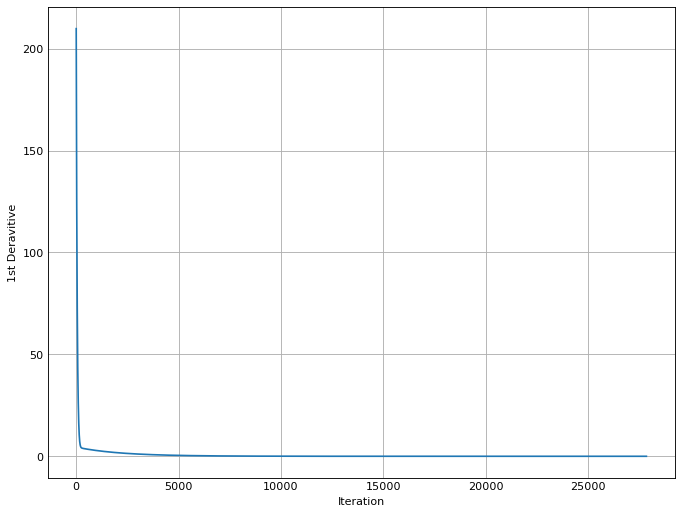

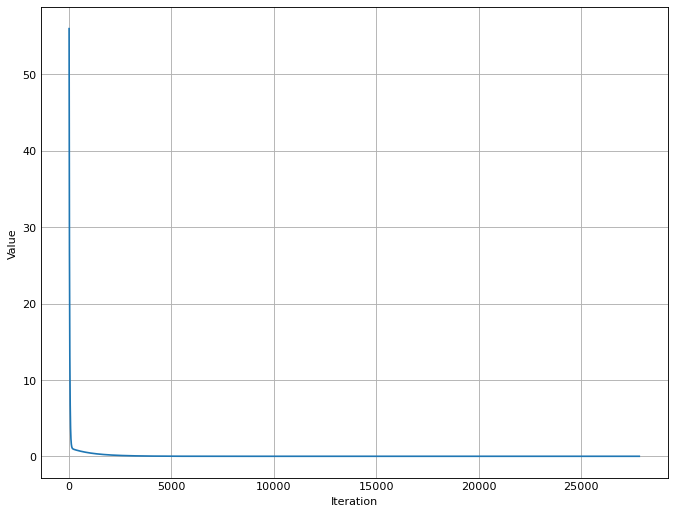

Soulution: 
[ 0.49703466 -0.19953649 -0.52881175]


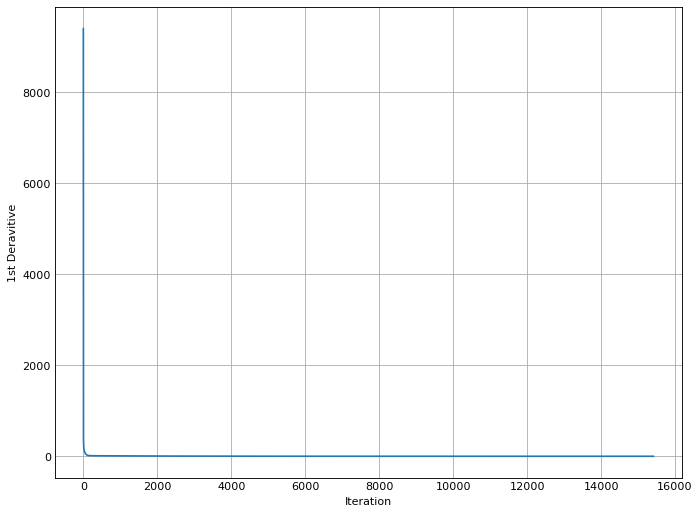

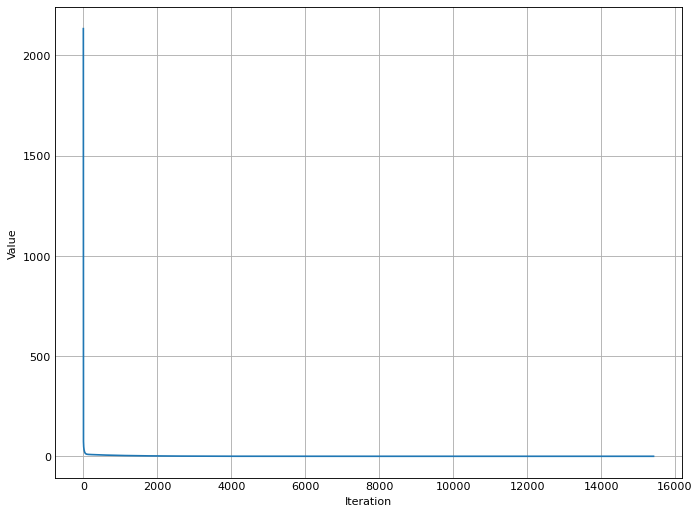

Soulution: 
[ 0.49703462 -0.19953649 -0.52881175]


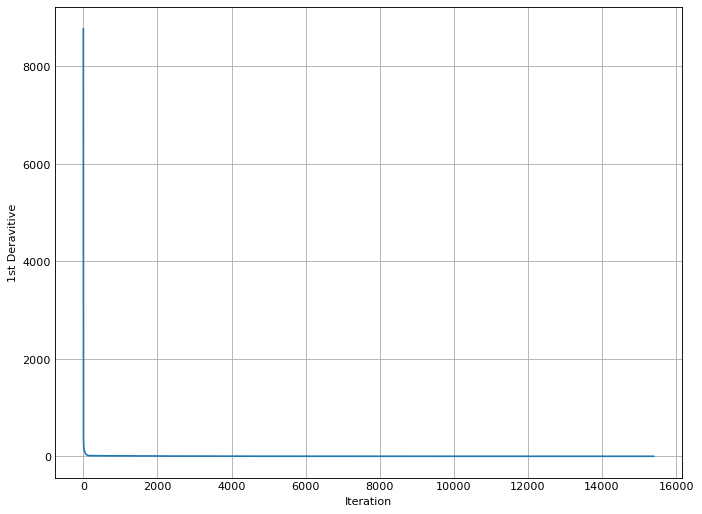

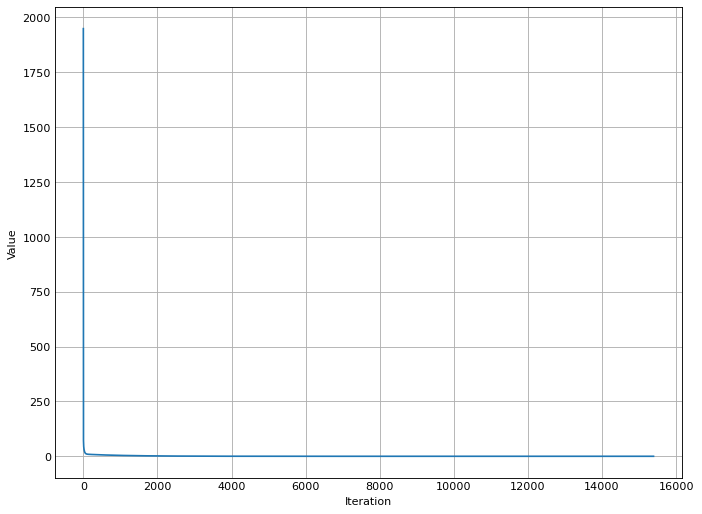

Soulution: 
[ 0.49703432 -0.19953647 -0.52881175]


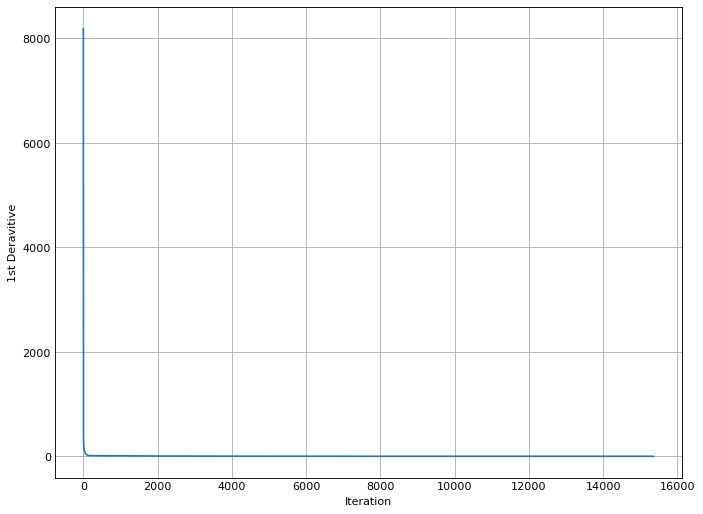

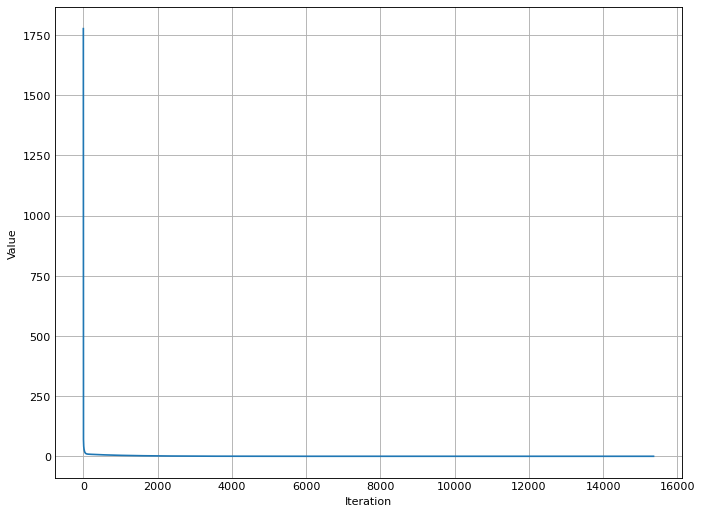

Soulution: 
[ 0.49703425 -0.19953646 -0.52881175]


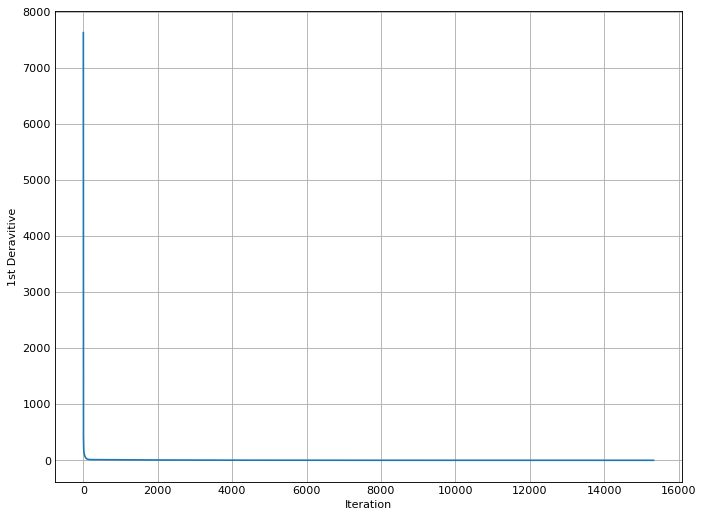

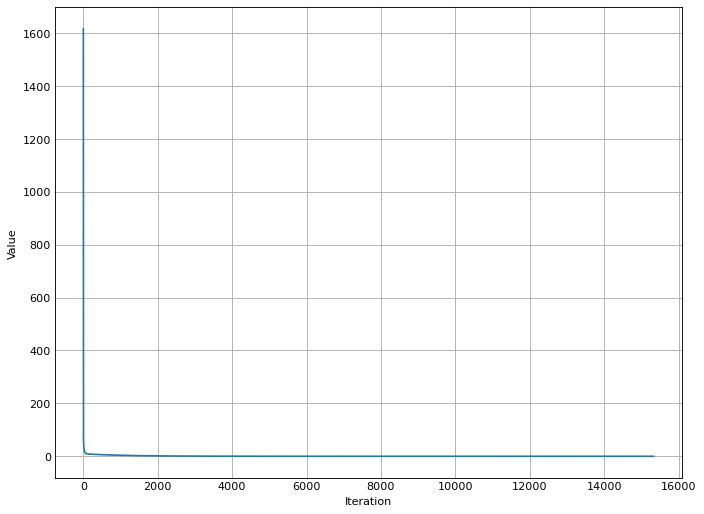

Soulution: 
[ 0.49703444 -0.19953647 -0.52881175]


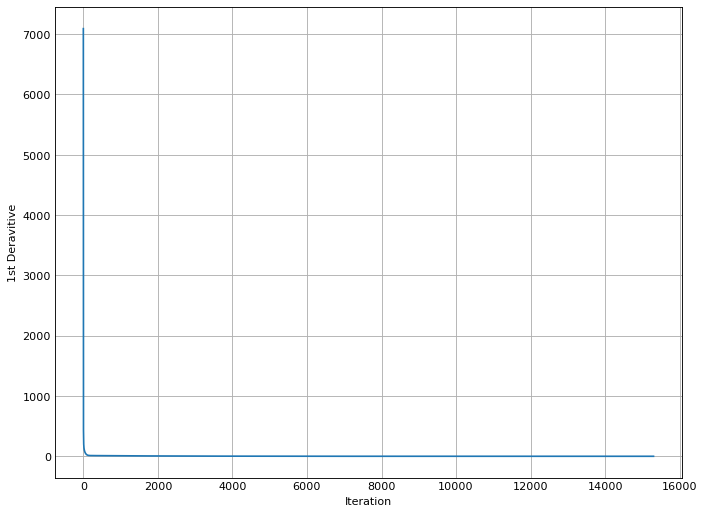

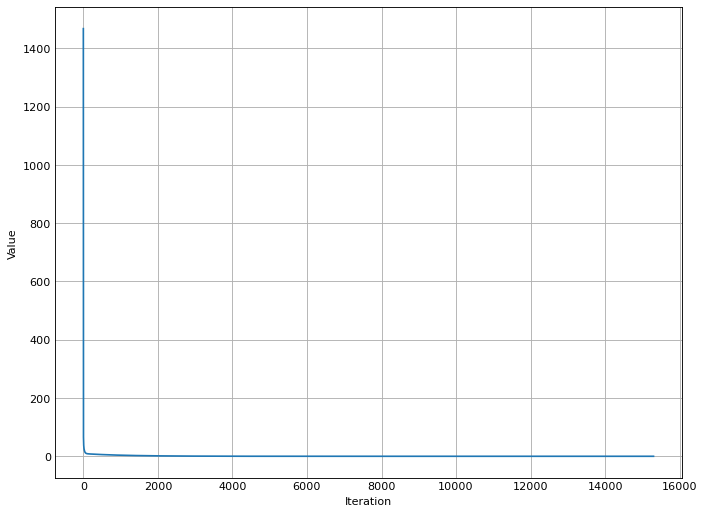

Soulution: 
[ 0.49703436 -0.19953647 -0.52881175]


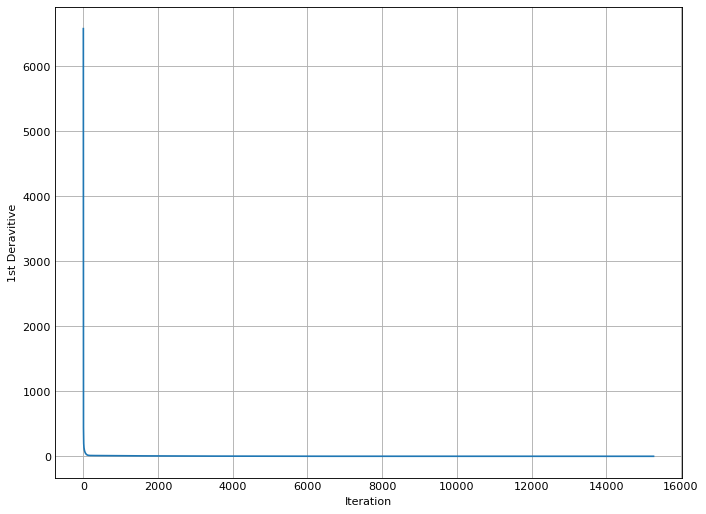

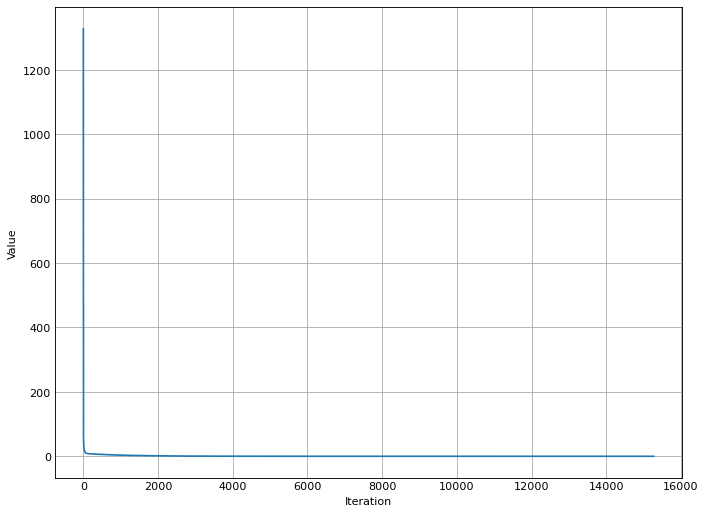

Soulution: 
[ 0.49703454 -0.19953648 -0.52881175]


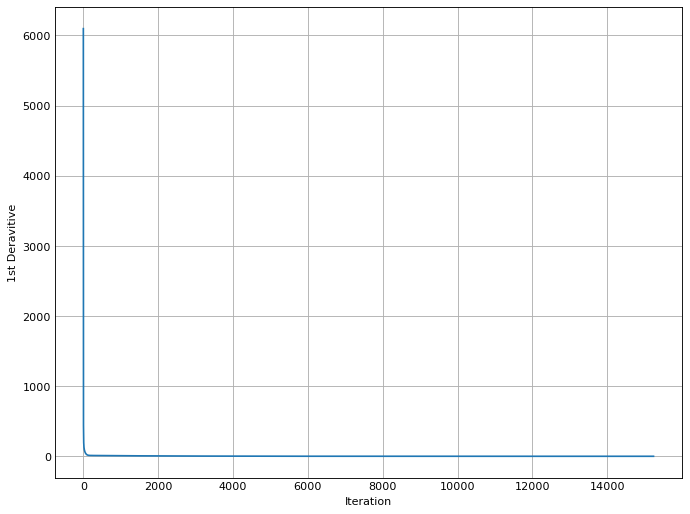

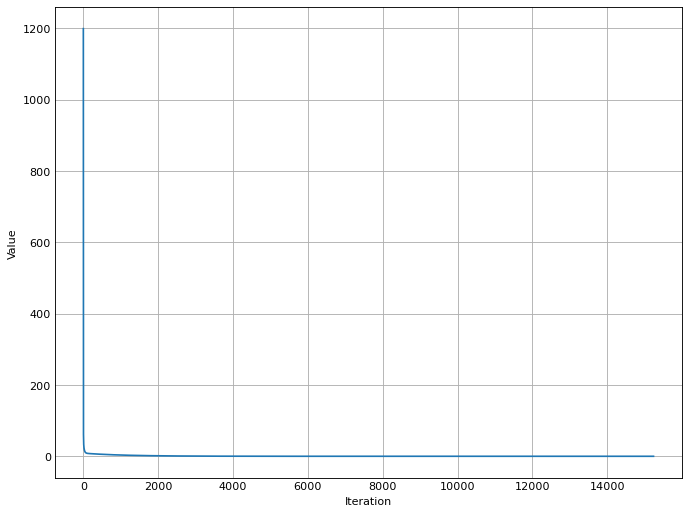

Soulution: 
[ 0.49703446 -0.19953647 -0.52881175]


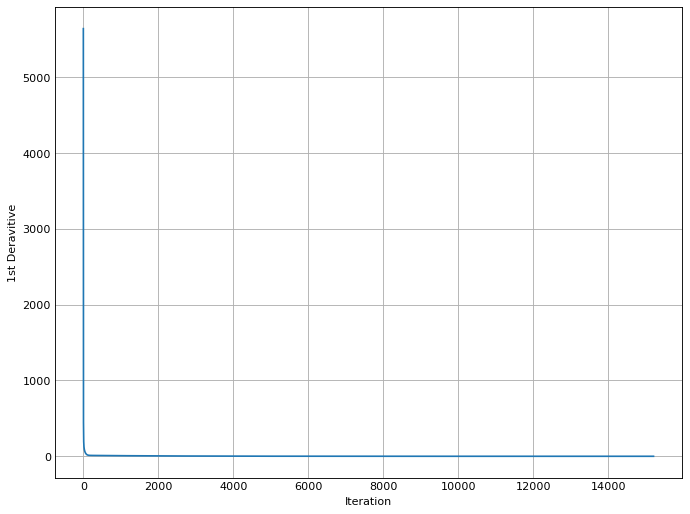

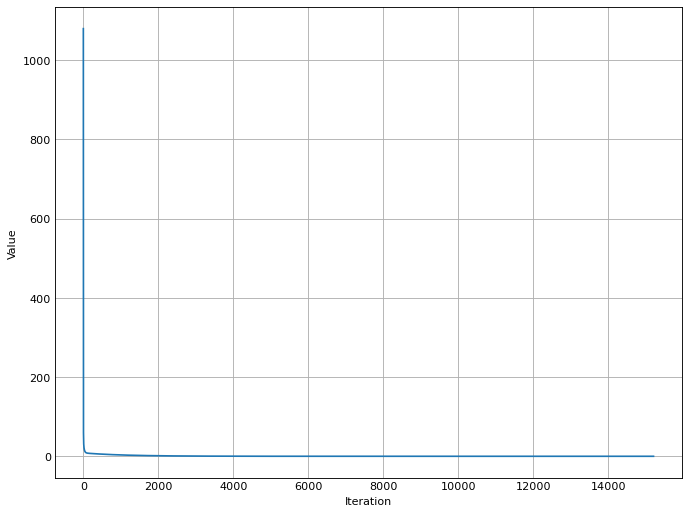

Soulution: 
[ 0.49703464 -0.19953649 -0.52881175]


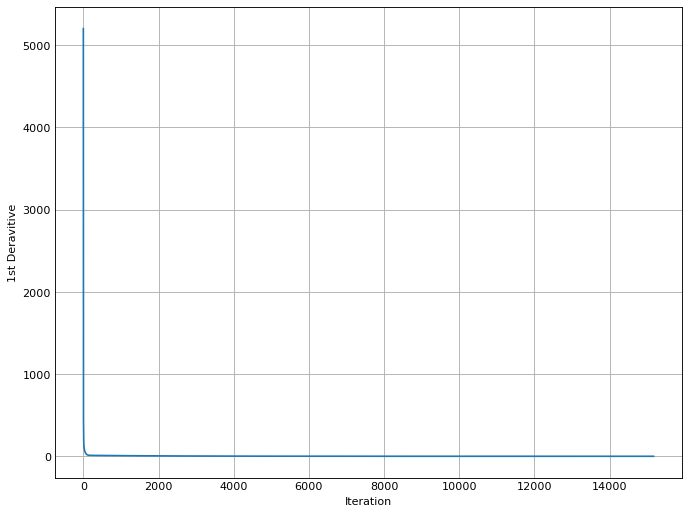

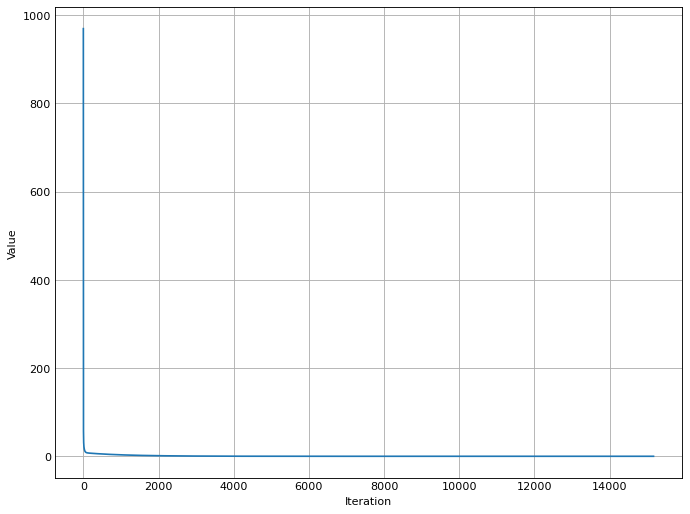

Soulution: 
[ 0.49703458 -0.19953648 -0.52881175]


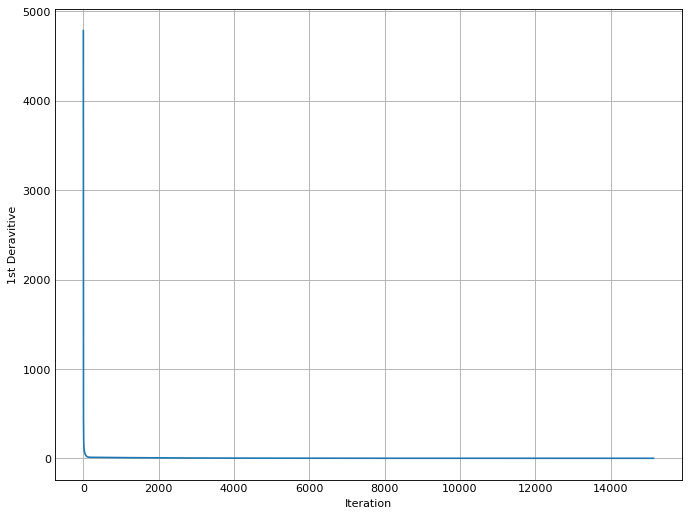

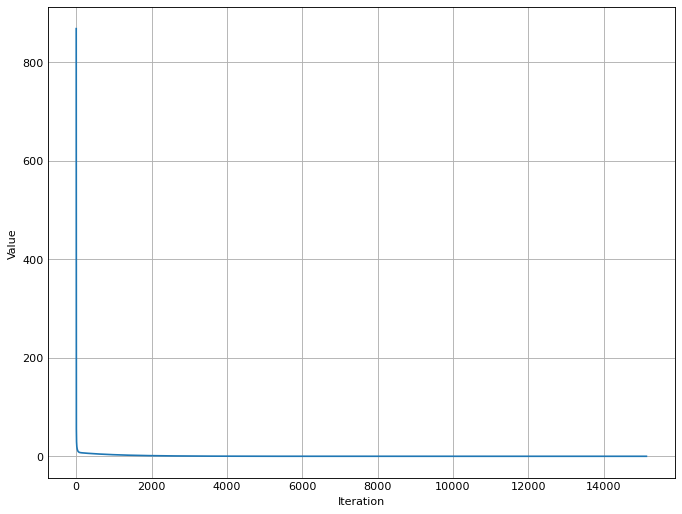

Soulution: 
[ 0.49703428 -0.19953646 -0.52881175]


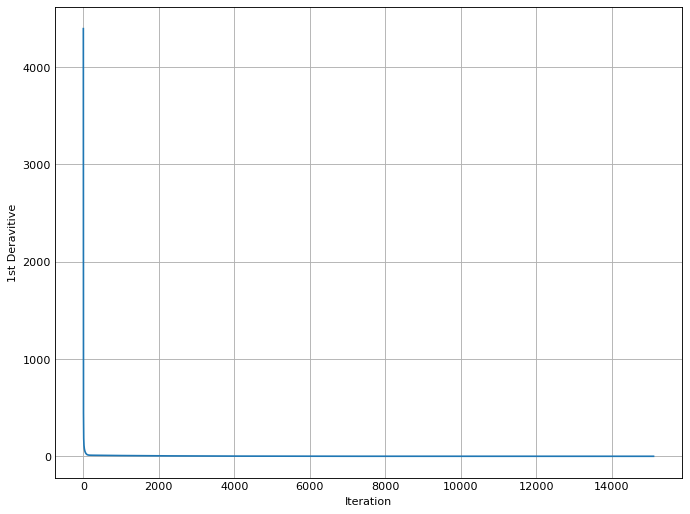

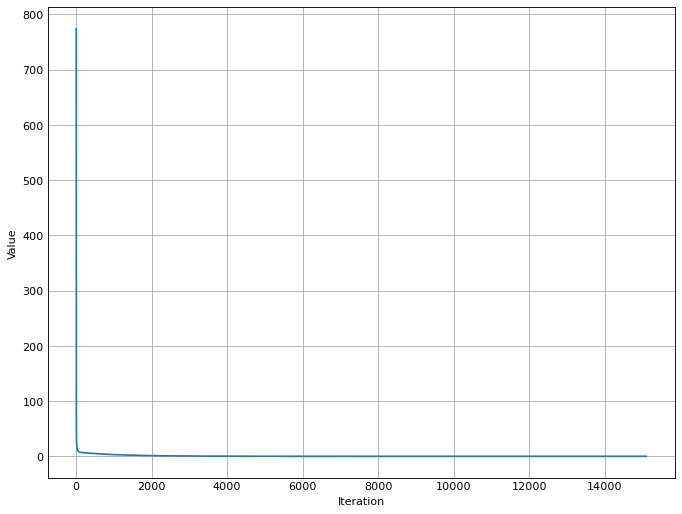

Soulution: 
[ 0.49703427 -0.19953646 -0.52881175]


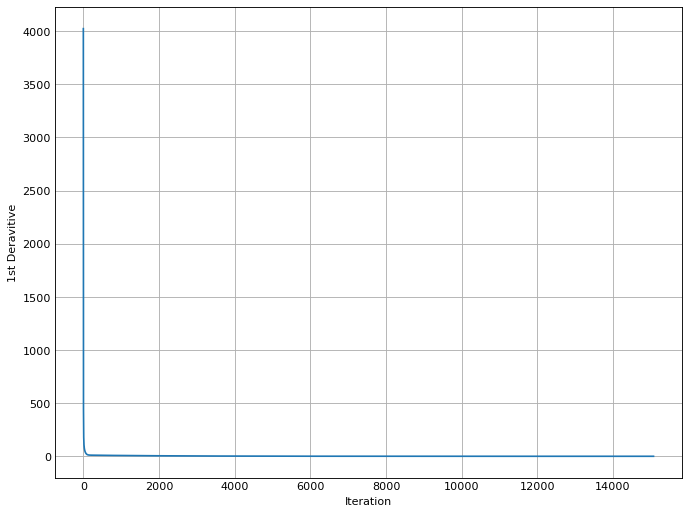

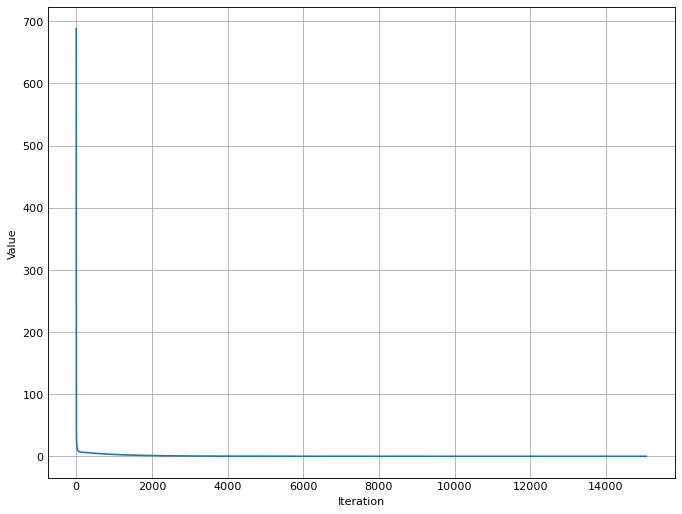

Soulution: 
[ 0.49703455 -0.19953648 -0.52881175]


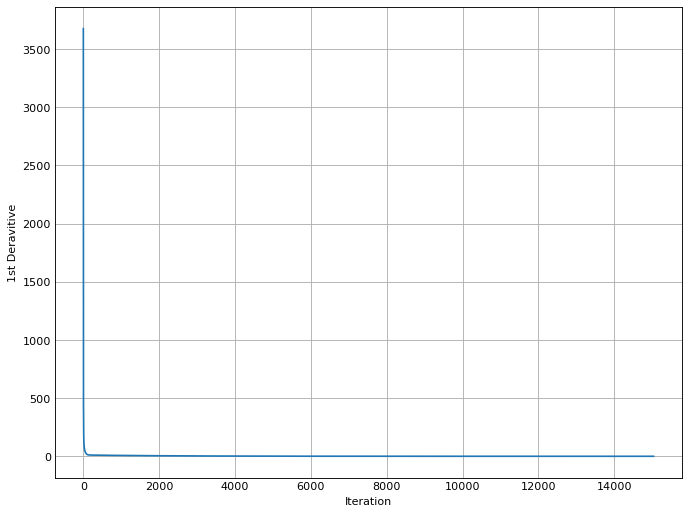

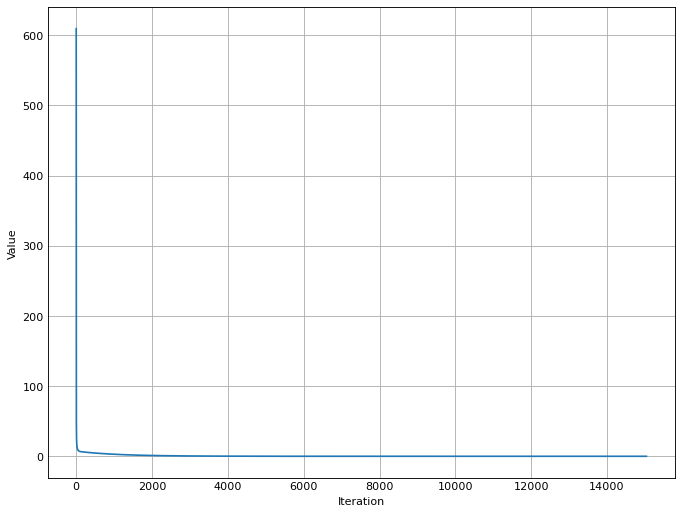

Soulution: 
[ 0.49703461 -0.19953648 -0.52881175]


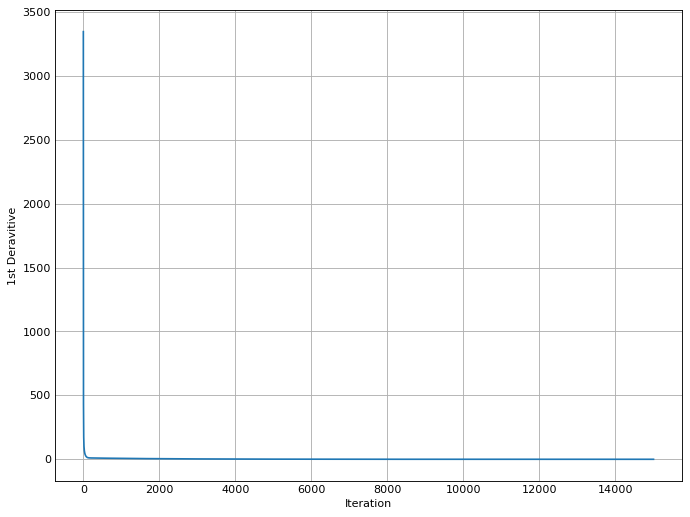

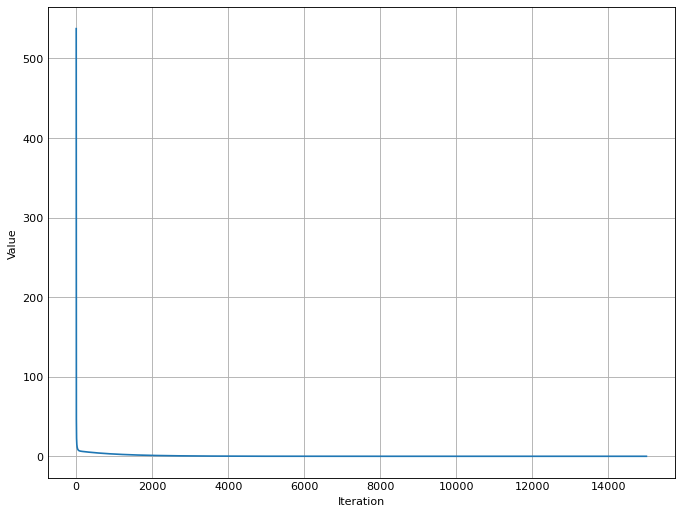

Soulution: 
[ 0.49703447 -0.19953648 -0.52881175]


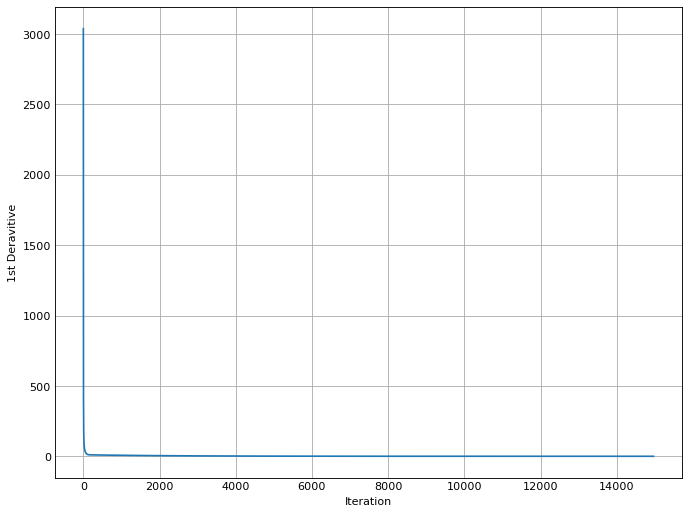

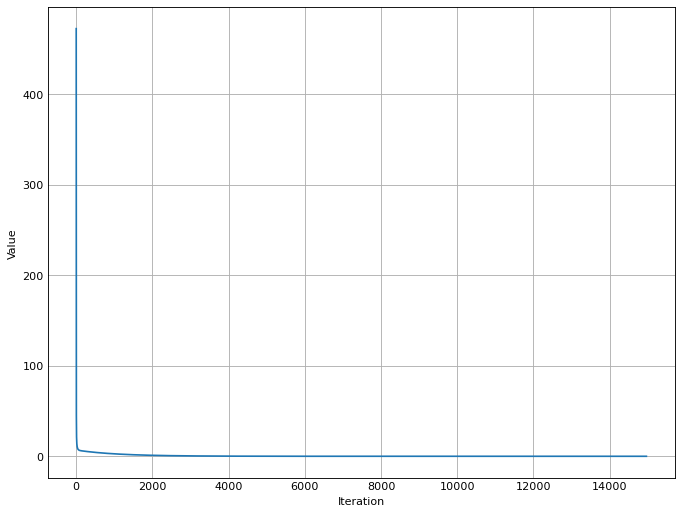

Soulution: 
[ 0.49703465 -0.19953649 -0.52881175]


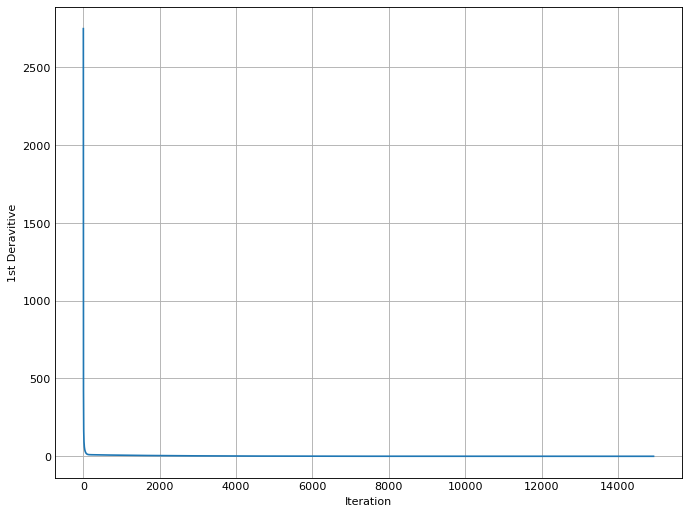

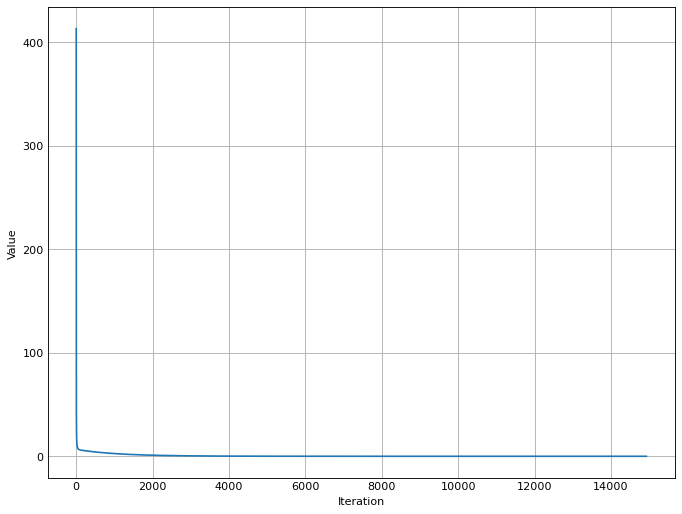

Soulution: 
[ 0.49703464 -0.19953649 -0.52881175]


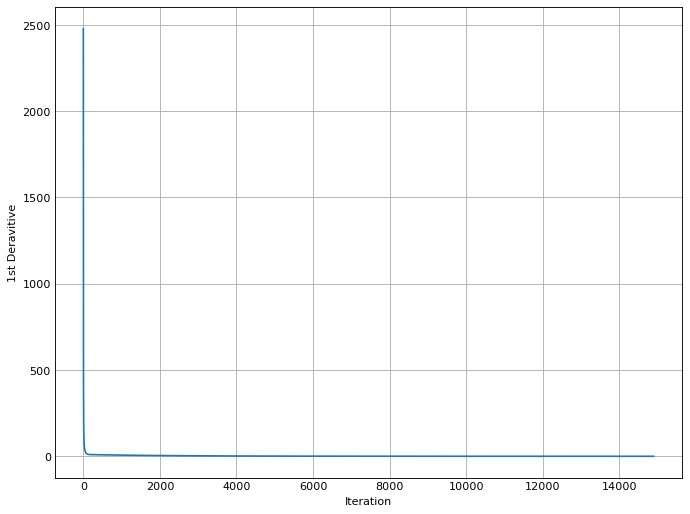

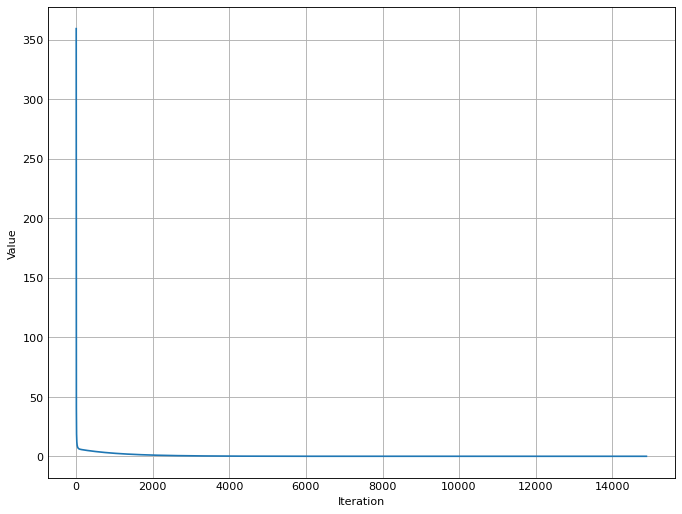

Soulution: 
[ 0.49703446 -0.19953647 -0.52881175]


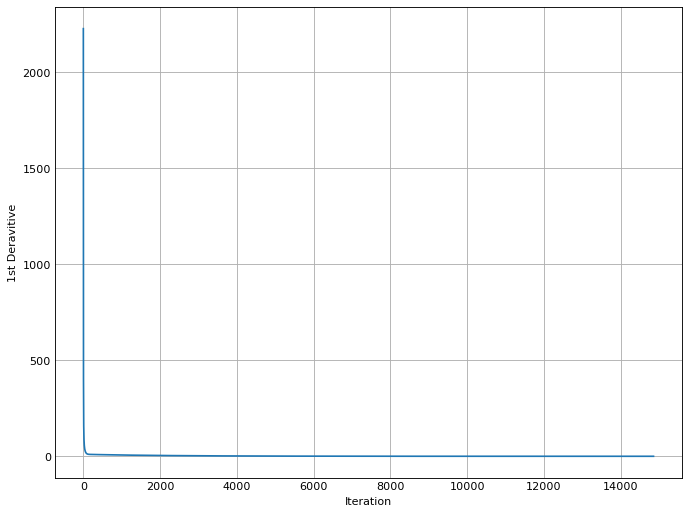

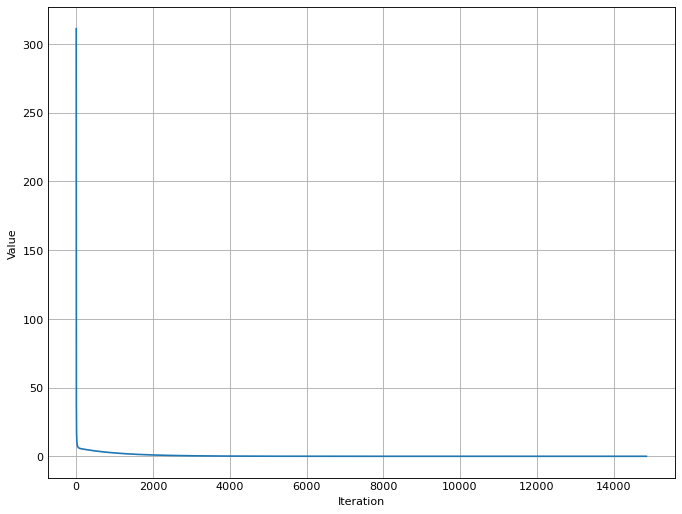

Soulution: 
[ 0.49703462 -0.19953649 -0.52881175]


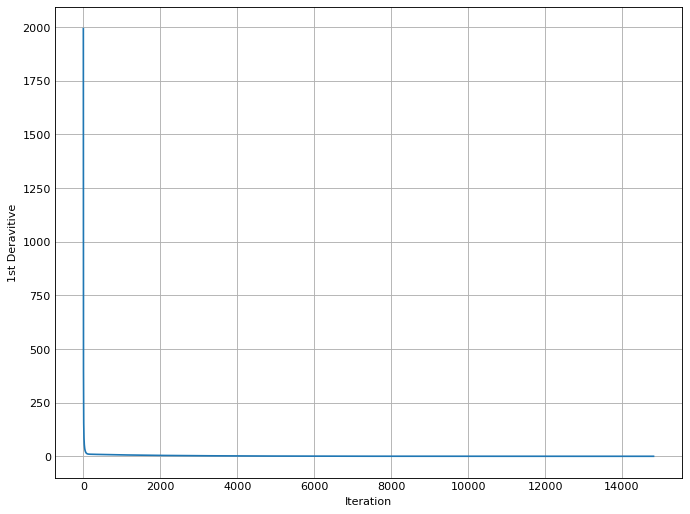

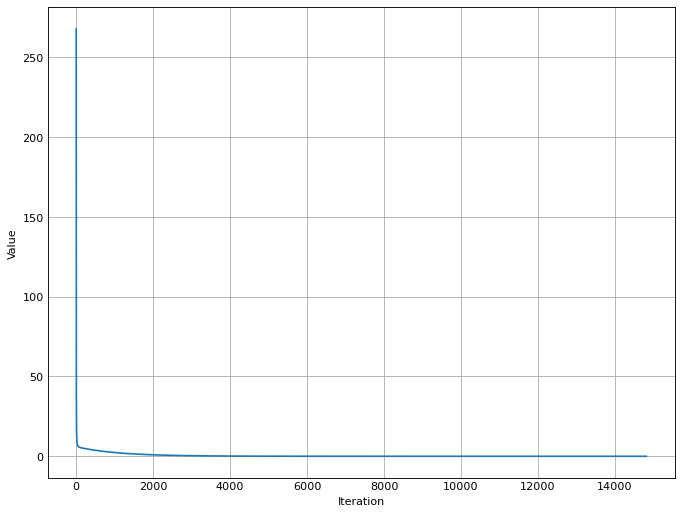

Soulution: 
[ 0.49703464 -0.19953649 -0.52881175]


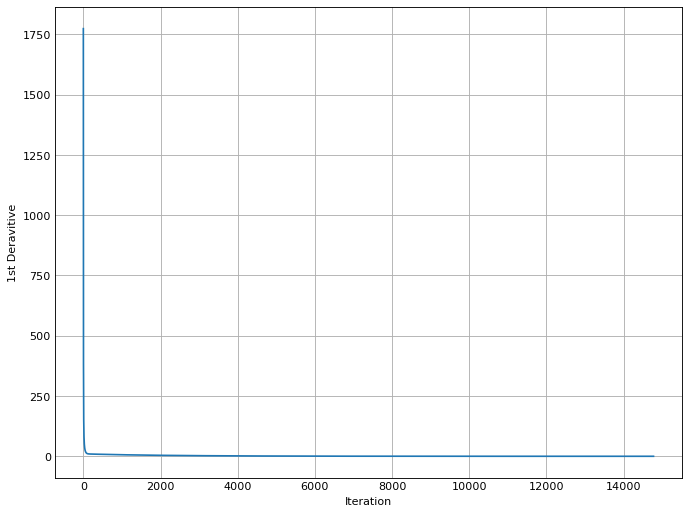

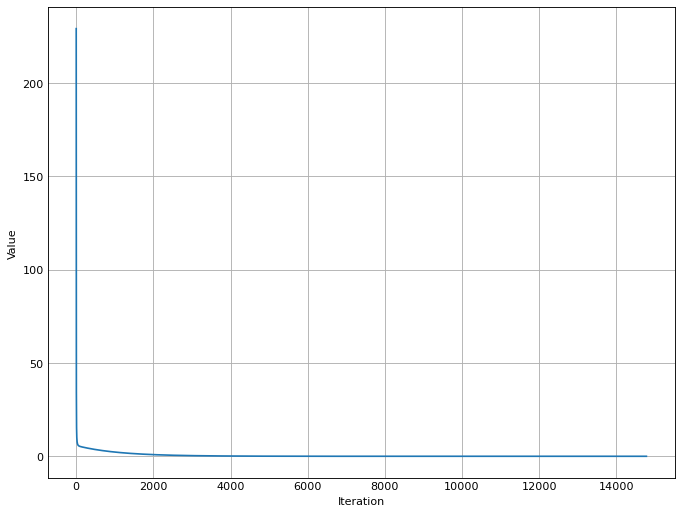

Soulution: 
[ 0.49703451 -0.19953648 -0.52881175]


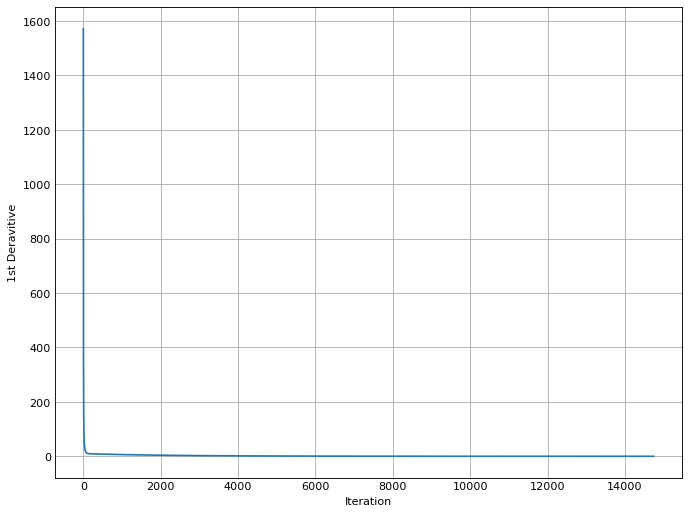

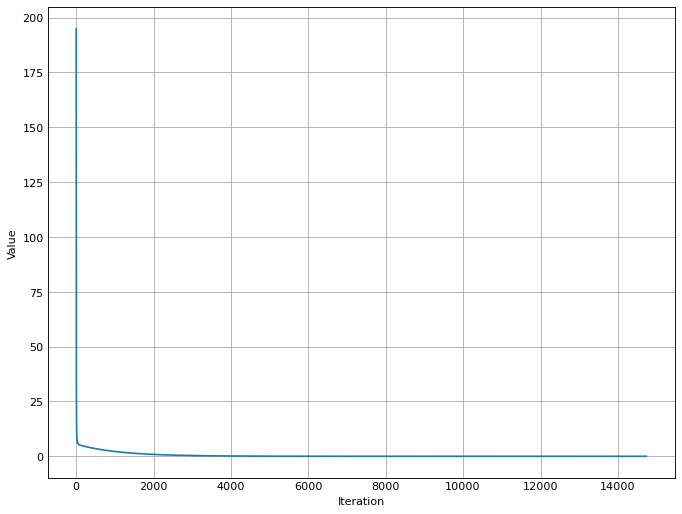

Soulution: 
[ 0.49703426 -0.19953646 -0.52881175]


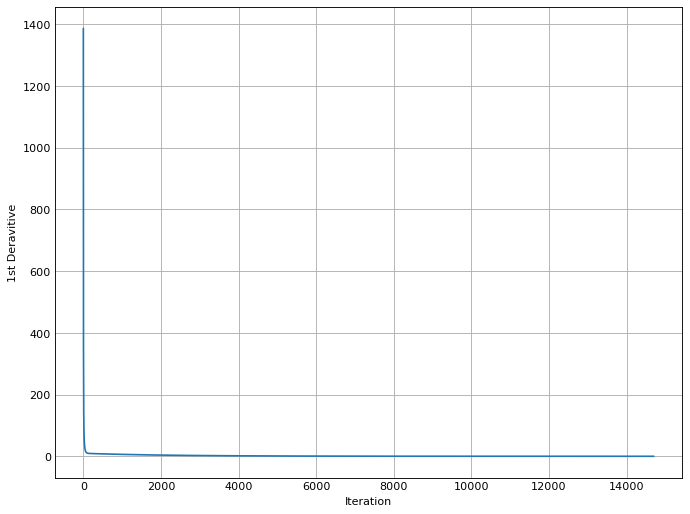

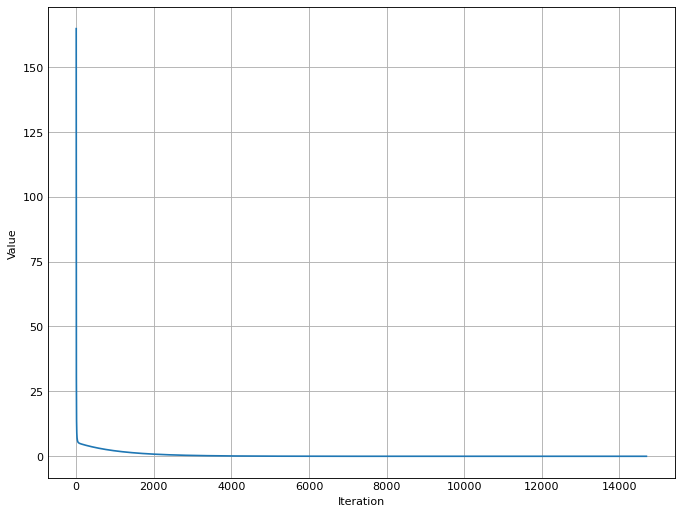

Soulution: 
[ 0.49703441 -0.19953647 -0.52881175]


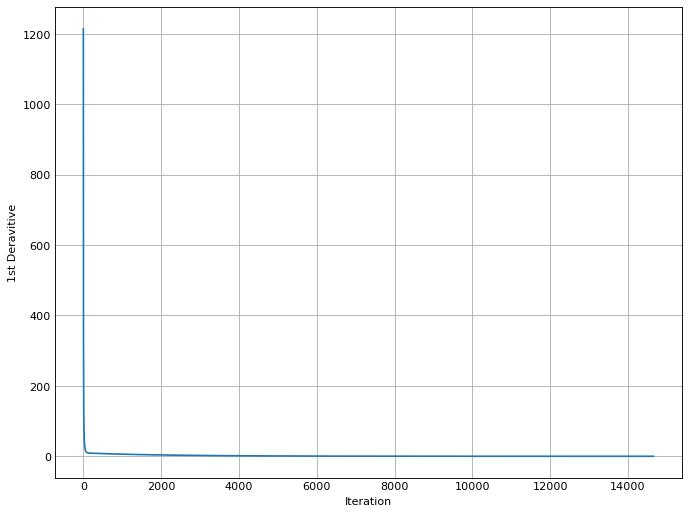

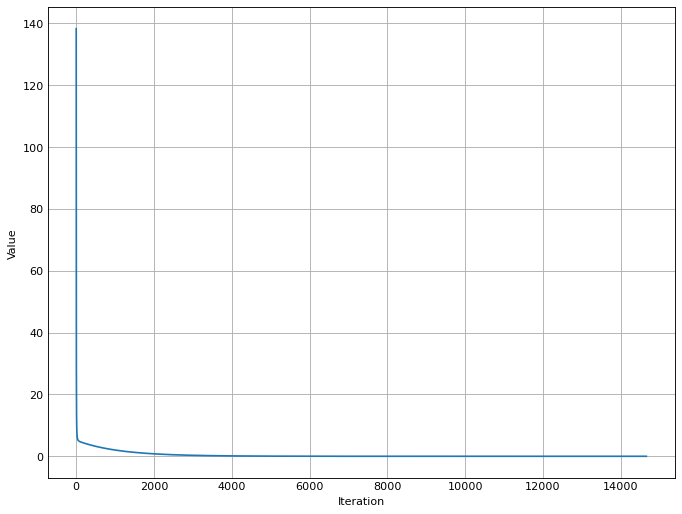

Soulution: 
[ 0.49703446 -0.19953648 -0.52881175]


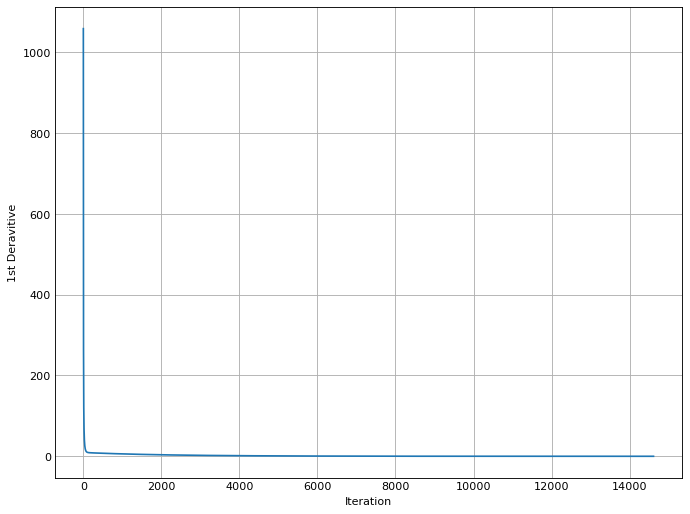

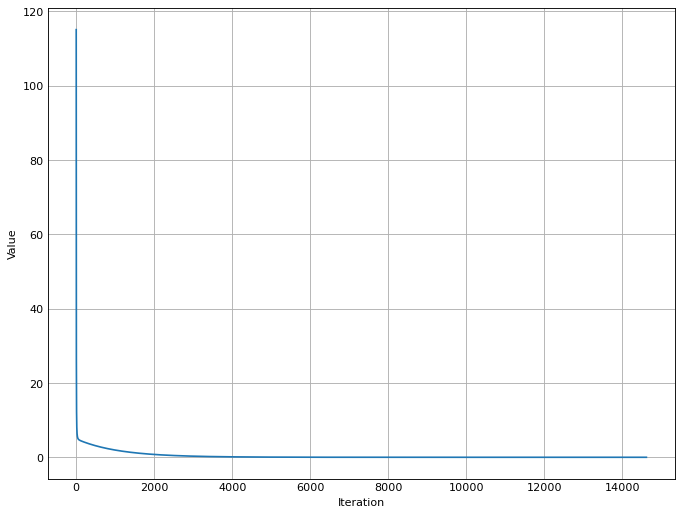

Soulution: 
[ 0.49703443 -0.19953647 -0.52881175]


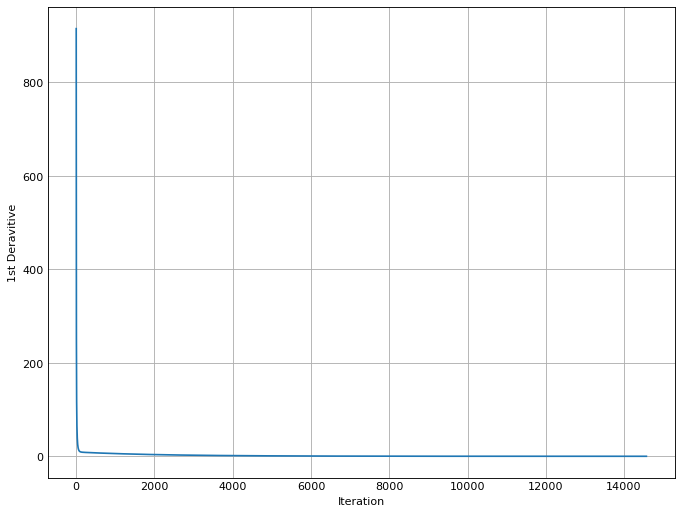

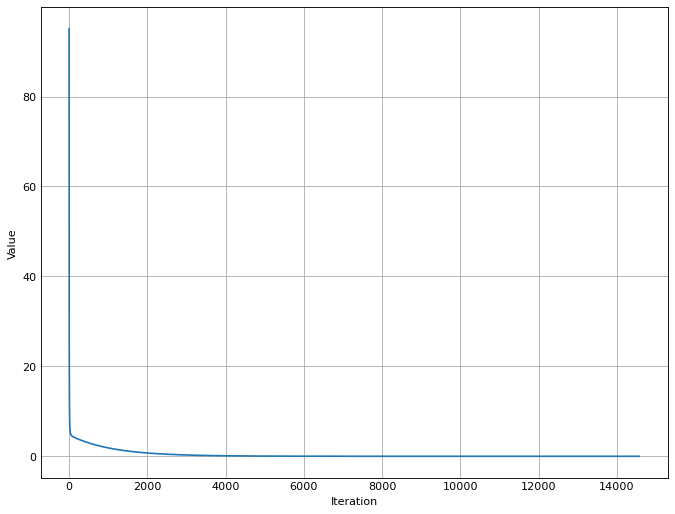

Soulution: 
[ 0.49703434 -0.19953647 -0.52881175]


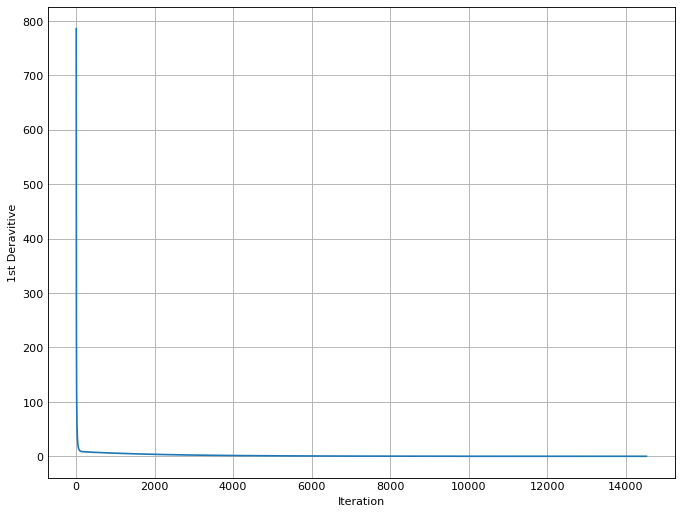

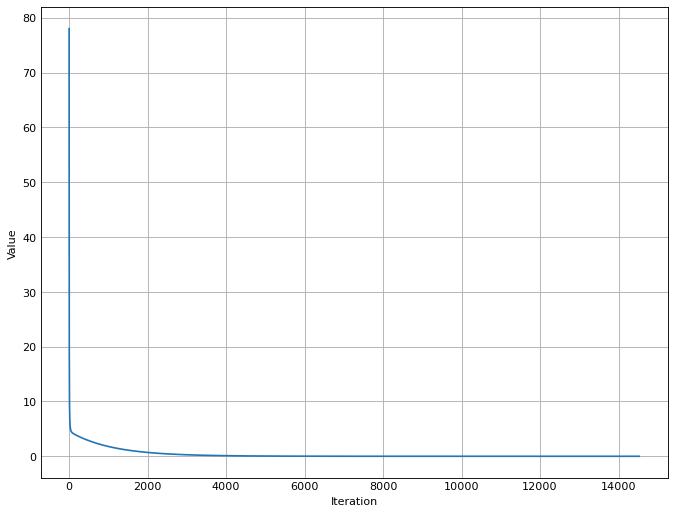

Soulution: 
[ 0.49703472 -0.19953649 -0.52881175]


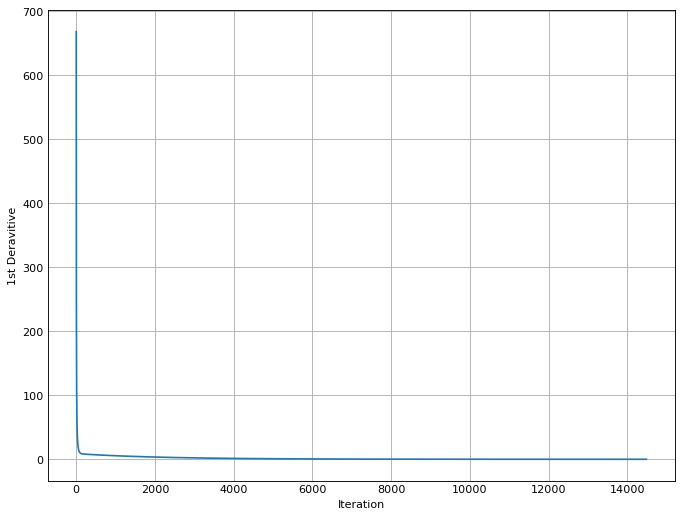

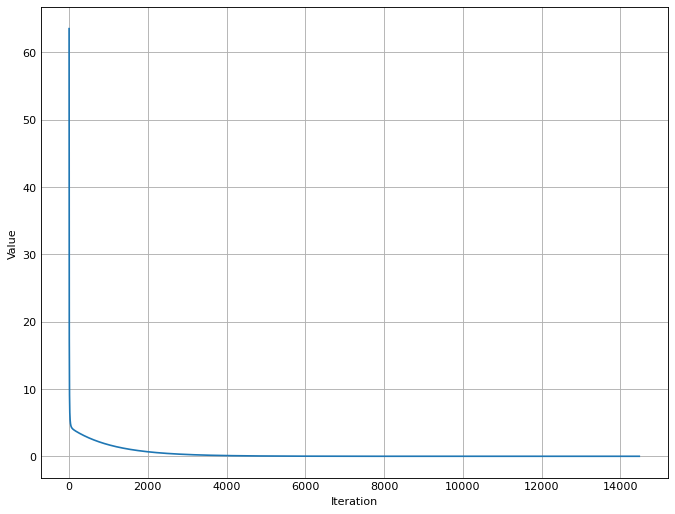

Soulution: 
[ 0.49703454 -0.19953648 -0.52881175]


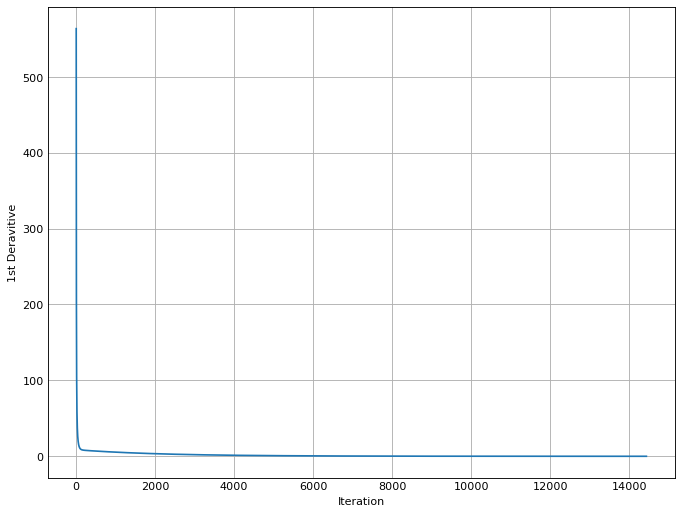

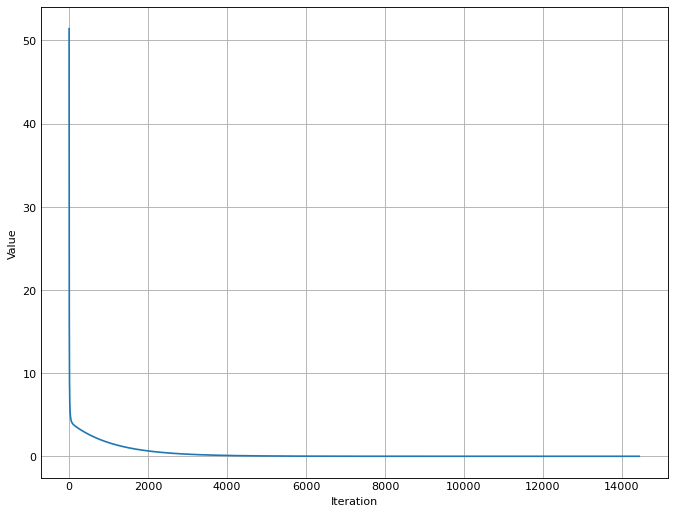

Soulution: 
[ 0.49703436 -0.19953647 -0.52881175]


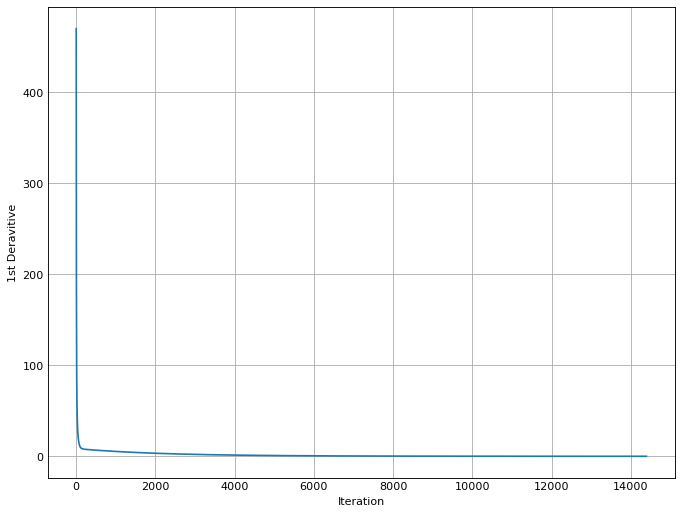

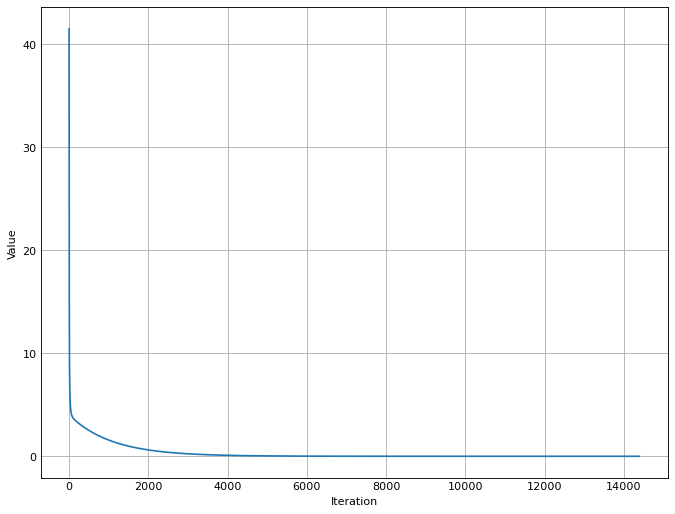

Soulution: 
[ 0.49703471 -0.19953649 -0.52881175]


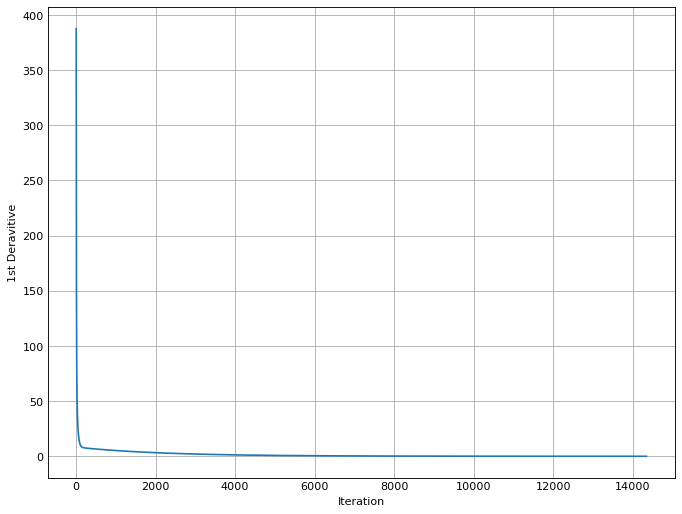

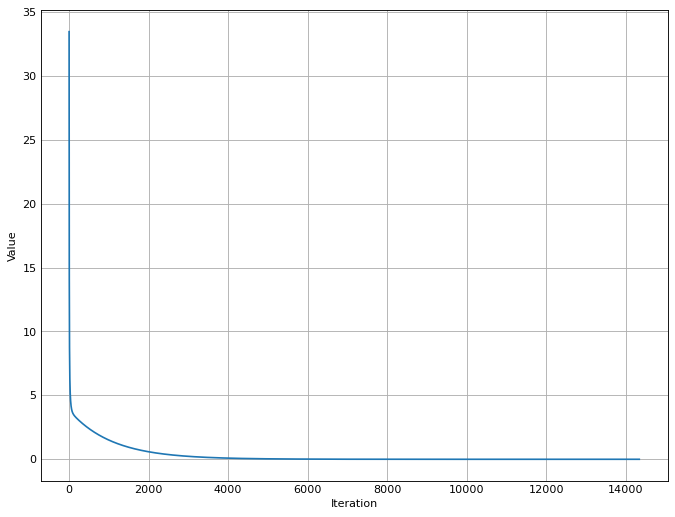

Soulution: 
[ 0.49703456 -0.19953648 -0.52881175]


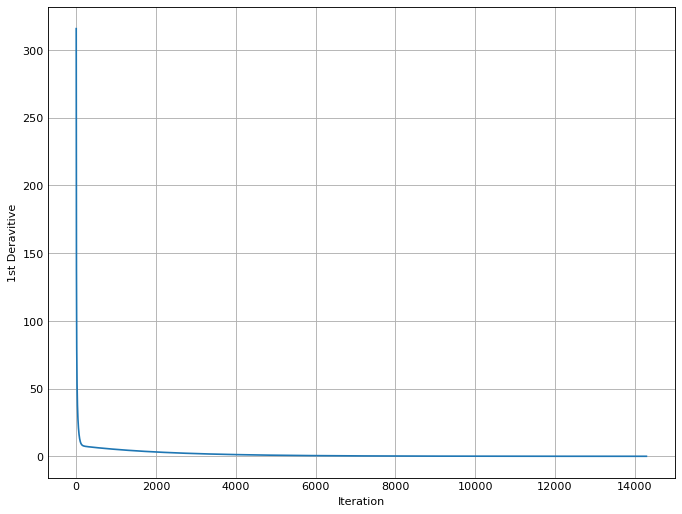

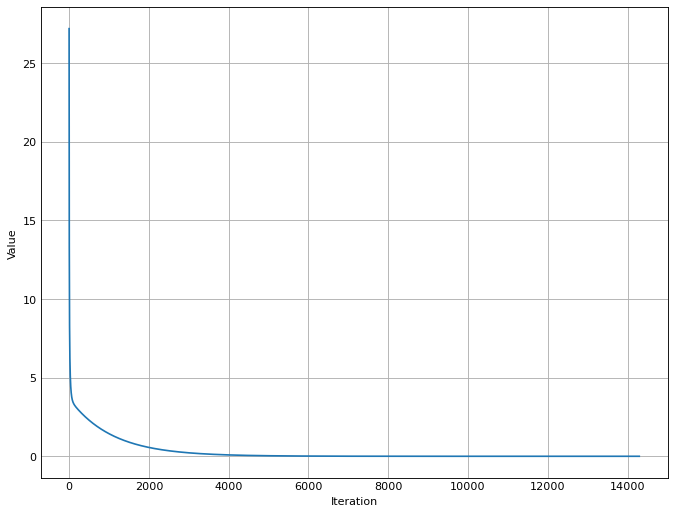

Soulution: 
[ 0.49703448 -0.19953648 -0.52881175]


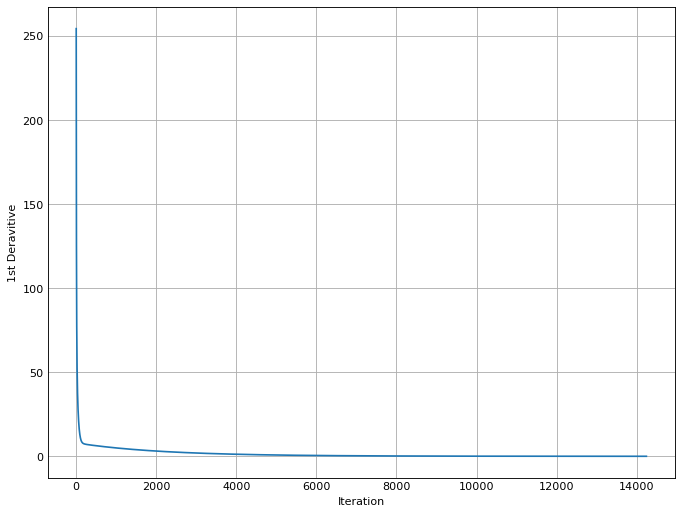

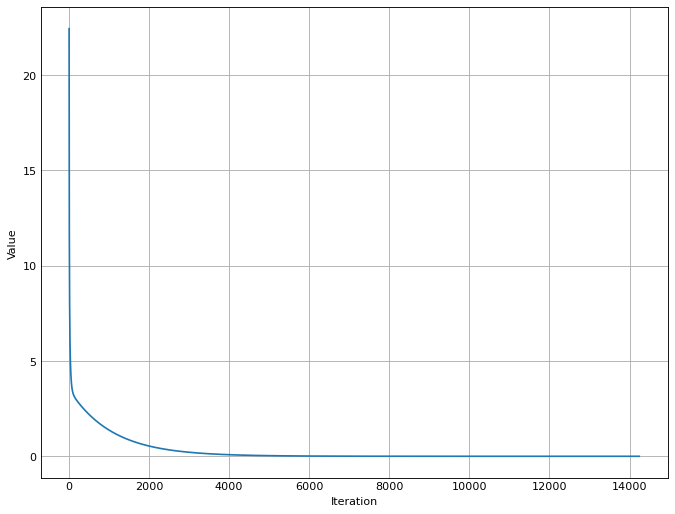

Soulution: 
[ 0.49703447 -0.19953648 -0.52881175]


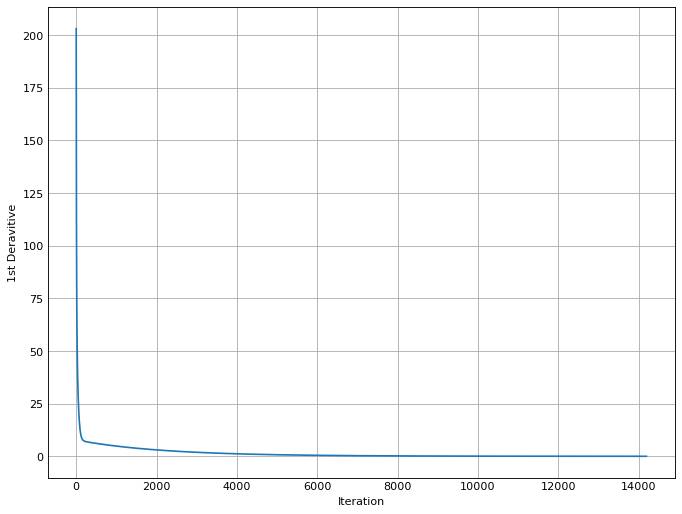

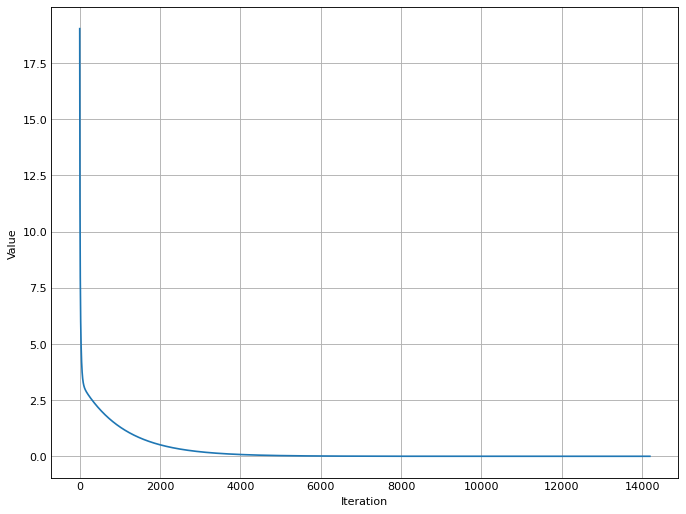

Soulution: 
[ 0.49703457 -0.19953648 -0.52881175]


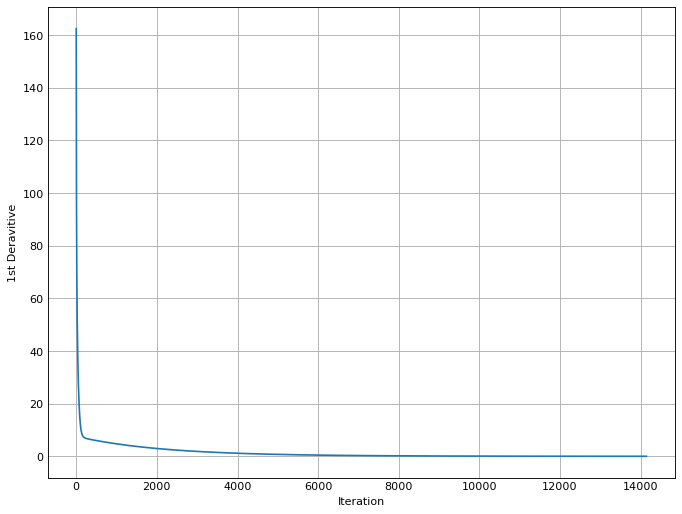

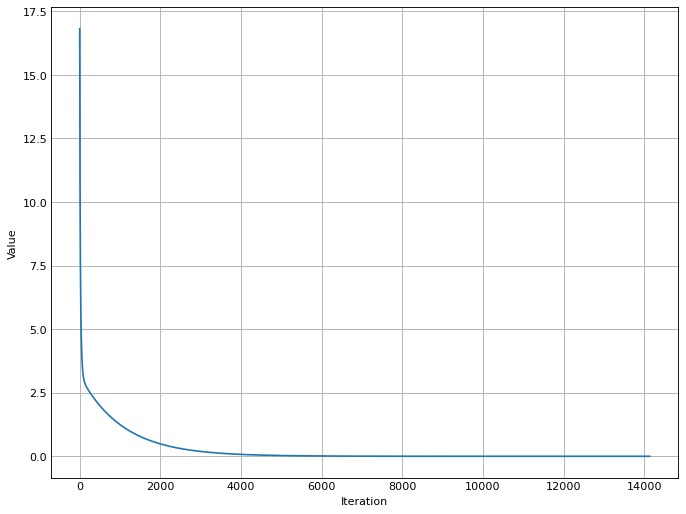

Soulution: 
[ 0.49703427 -0.19953646 -0.52881175]


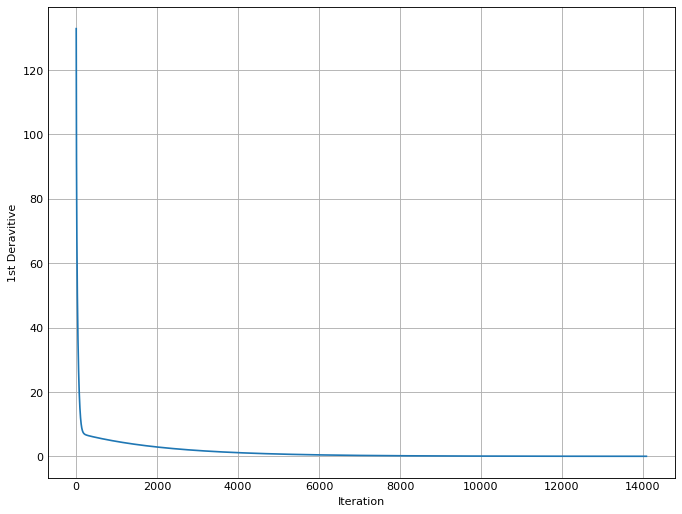

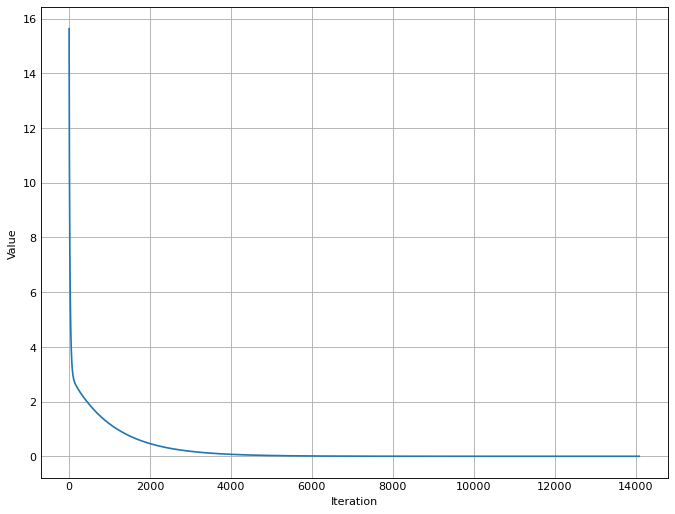

Soulution: 
[ 0.49703466 -0.19953649 -0.52881175]


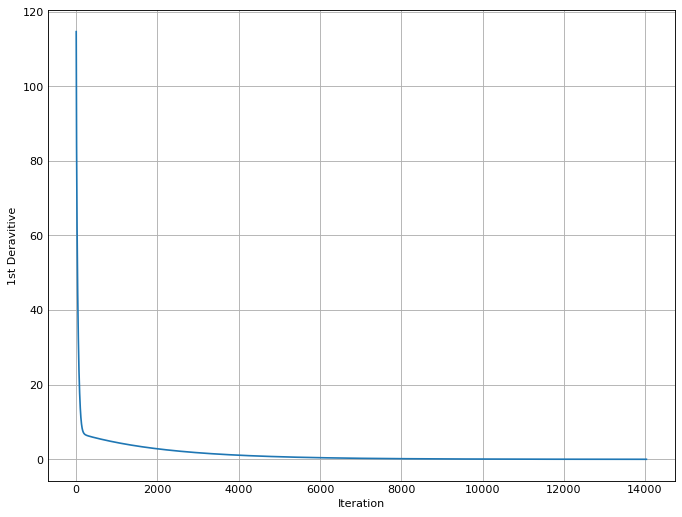

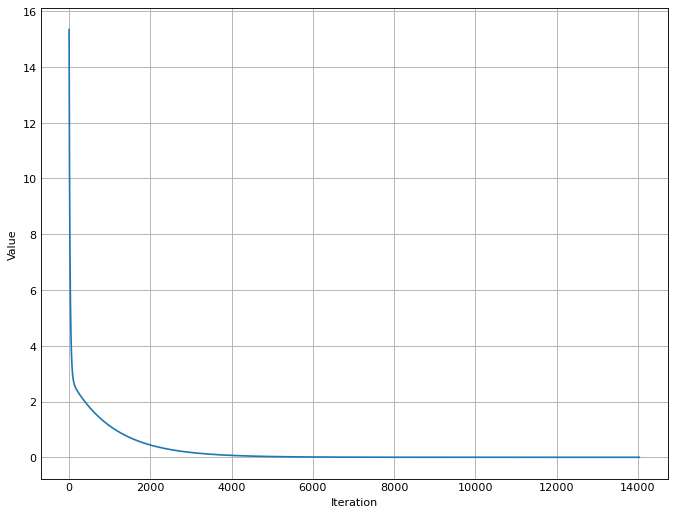

Soulution: 
[ 0.49703471 -0.19953649 -0.52881175]


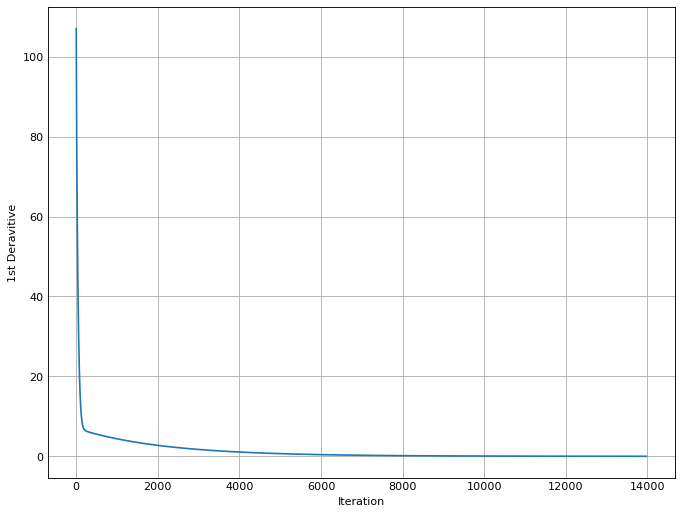

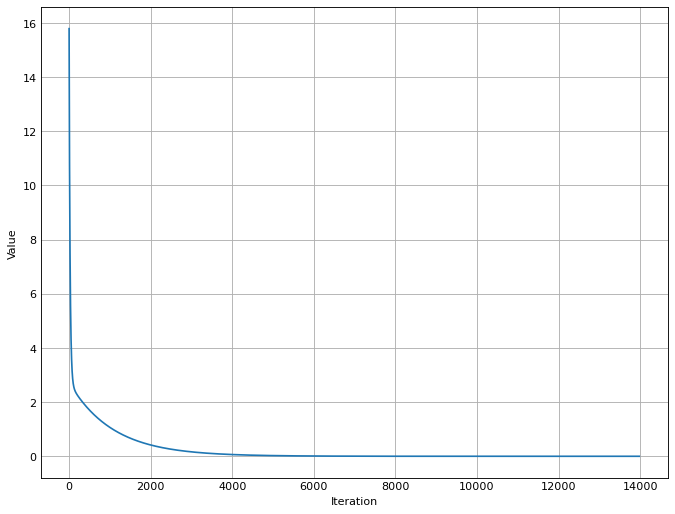

Soulution: 
[ 0.49703446 -0.19953647 -0.52881175]


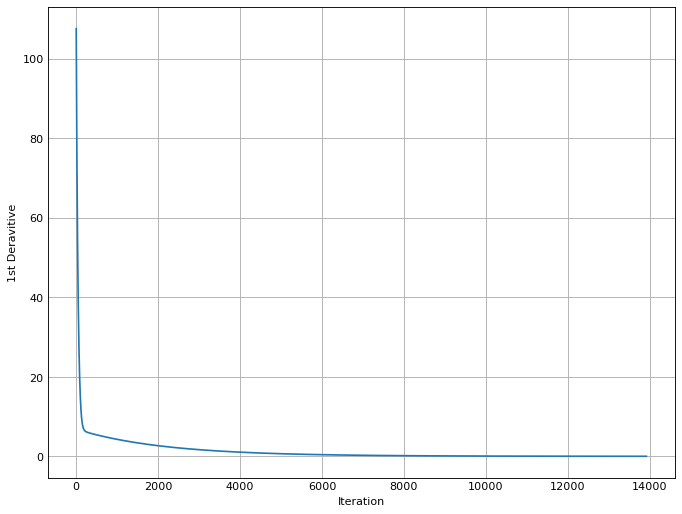

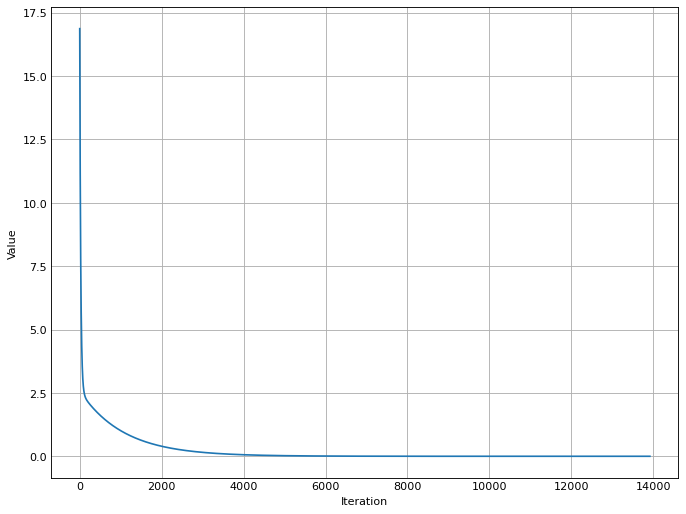

Soulution: 
[ 0.49703445 -0.19953647 -0.52881175]


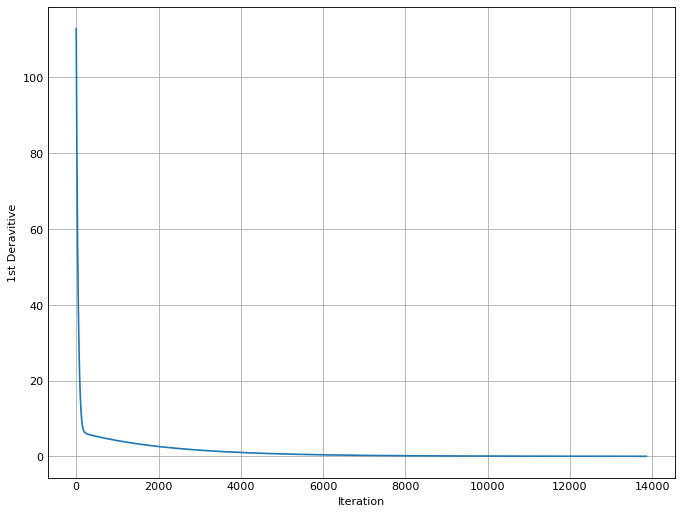

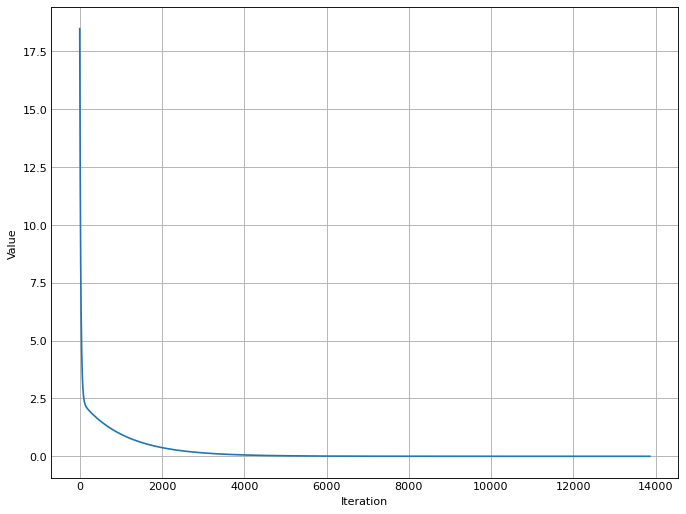

Soulution: 
[ 0.49703471 -0.19953649 -0.52881175]


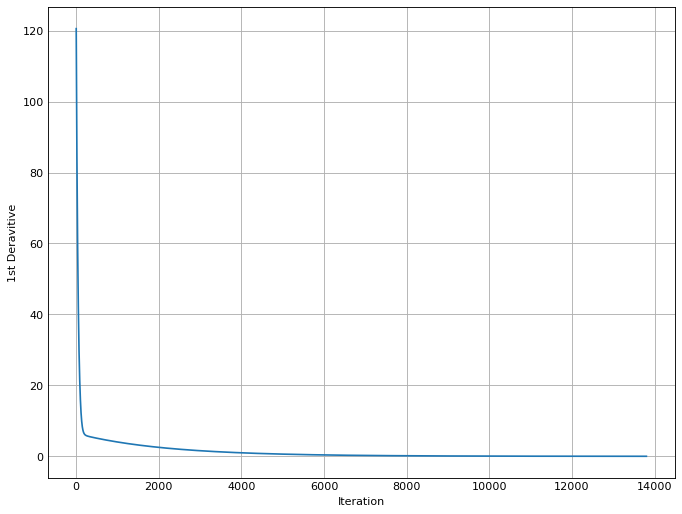

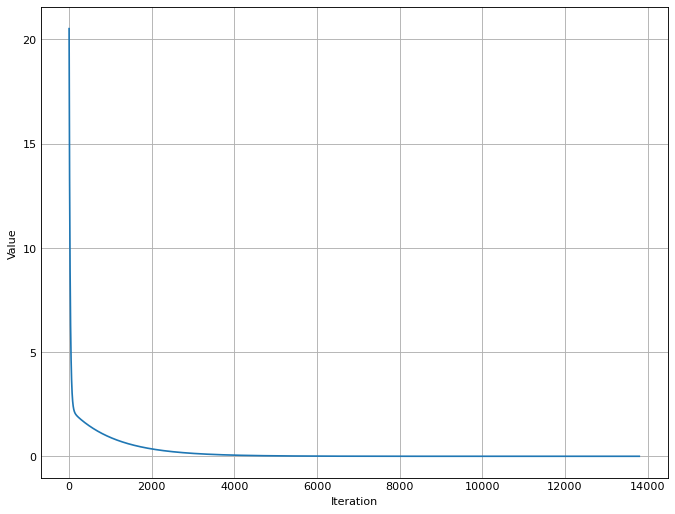

Soulution: 
[ 0.49703475 -0.19953649 -0.52881175]


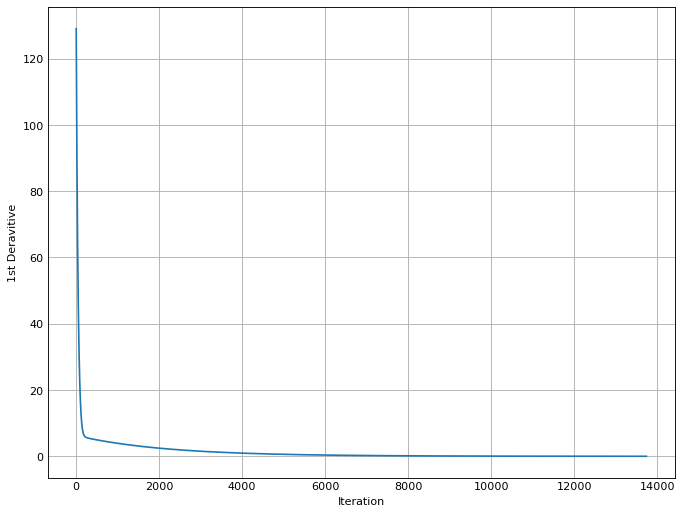

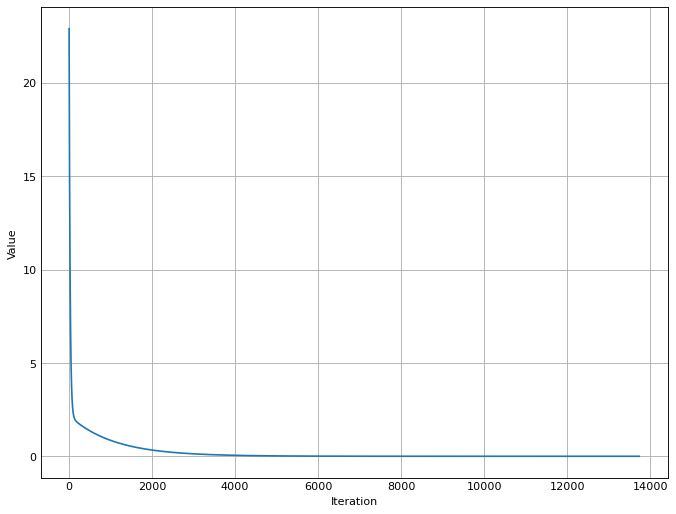

Soulution: 
[ 0.49703458 -0.19953648 -0.52881175]


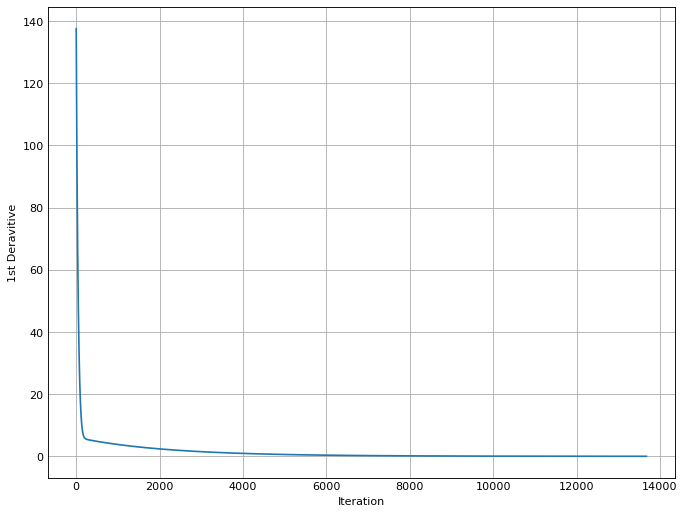

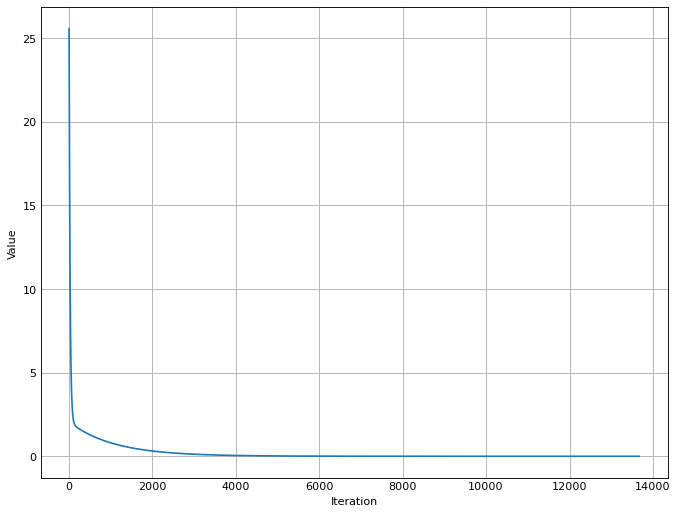

Soulution: 
[ 0.49703476 -0.19953649 -0.52881175]


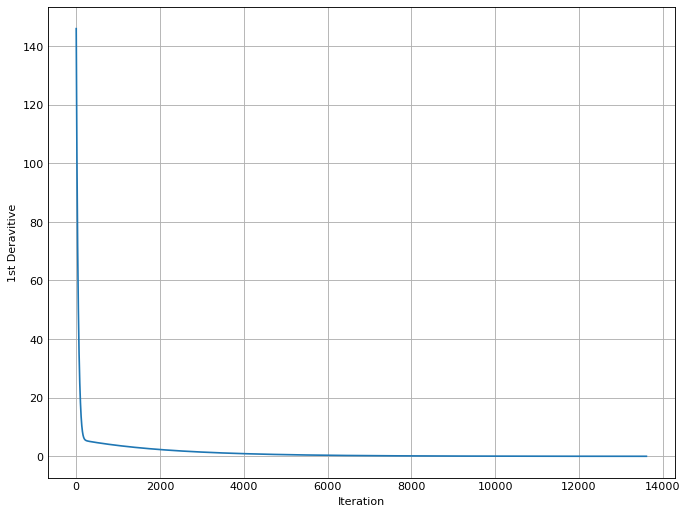

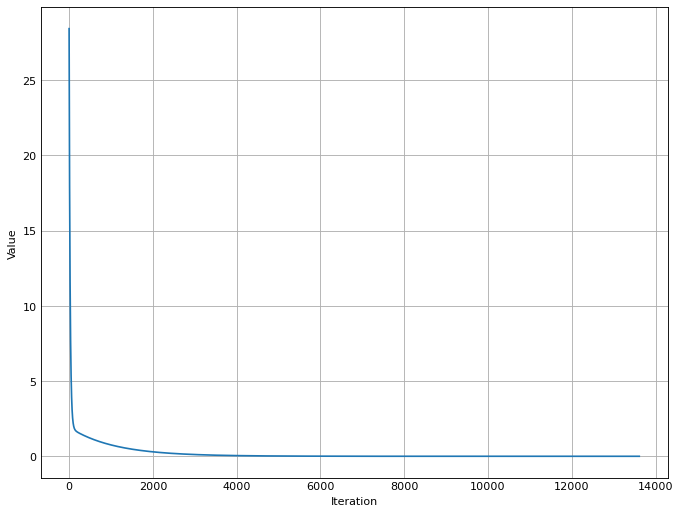

Soulution: 
[ 0.49703474 -0.19953649 -0.52881175]


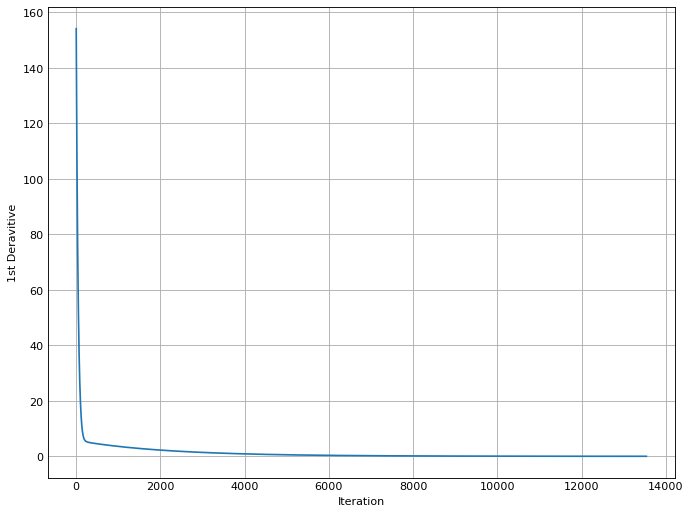

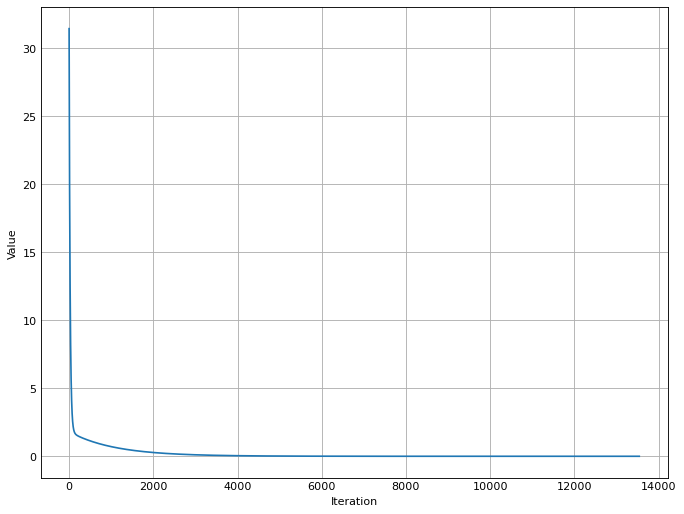

Soulution: 
[ 0.49703444 -0.19953647 -0.52881175]


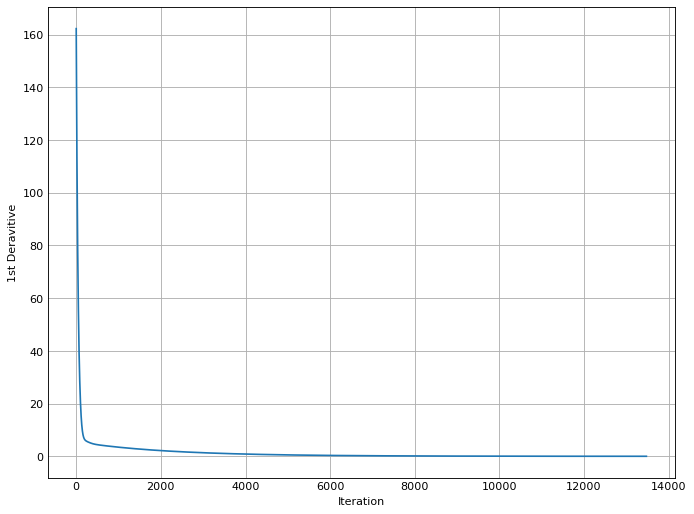

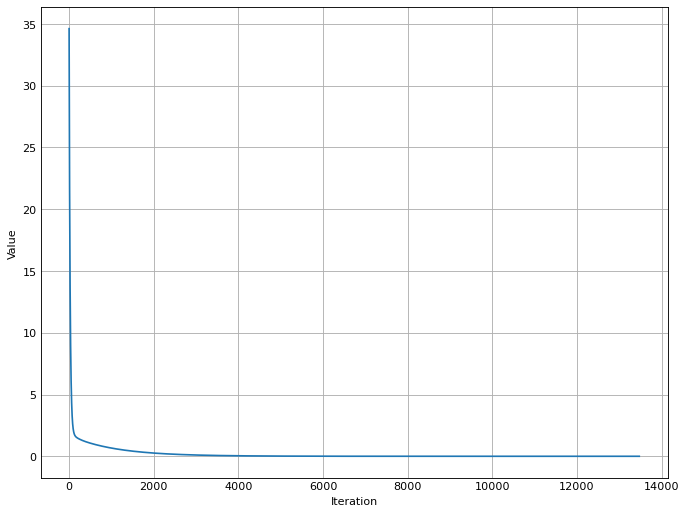

Soulution: 
[ 0.49703461 -0.19953648 -0.52881175]


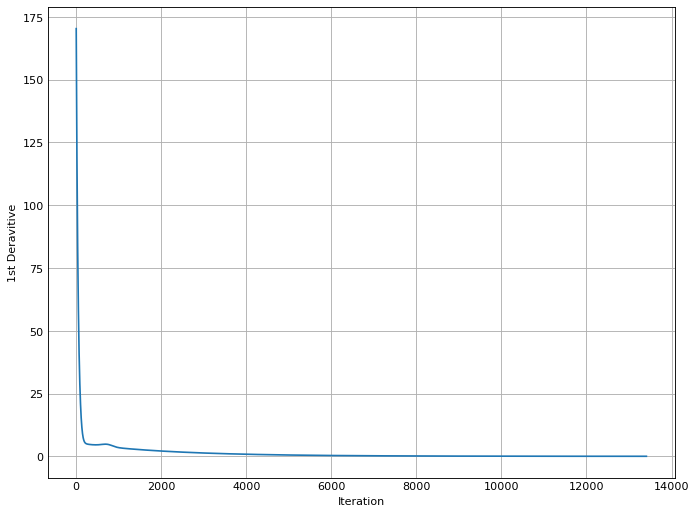

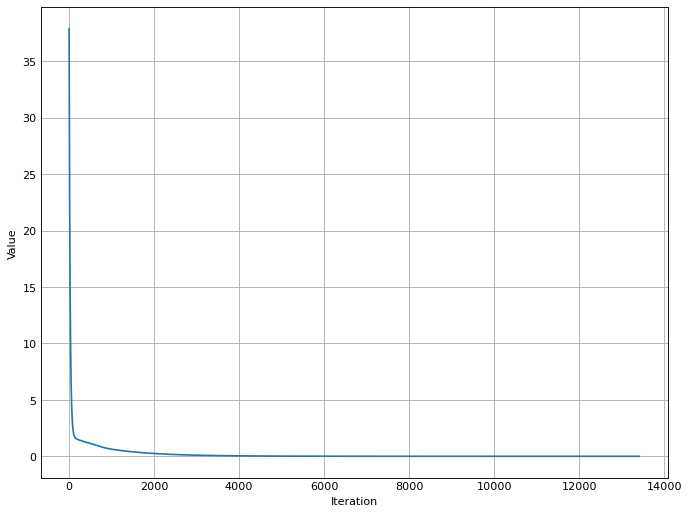

Soulution: 
[ 4.98886891e-01 -7.11981645e-05 -5.23600680e-01]


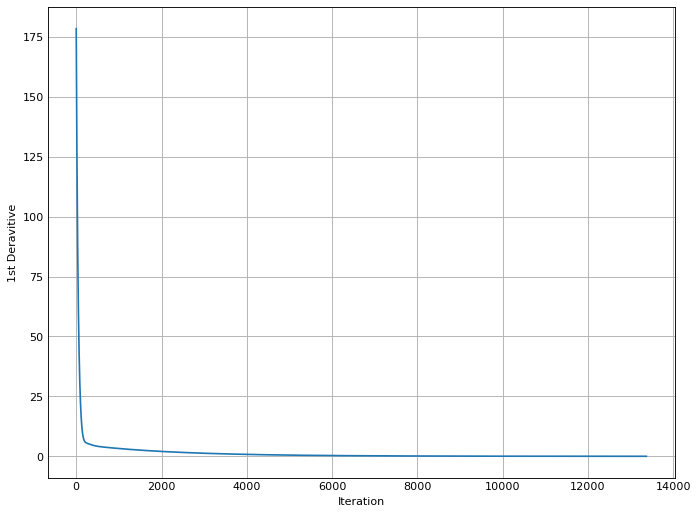

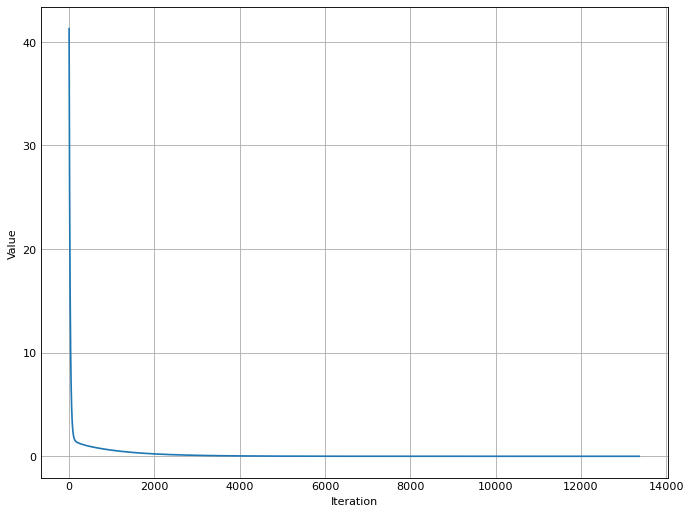

Soulution: 
[ 4.98886942e-01 -7.11949159e-05 -5.23600680e-01]


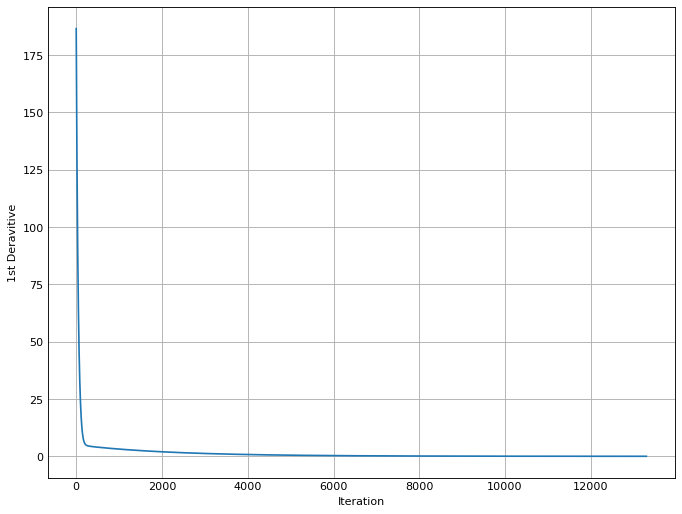

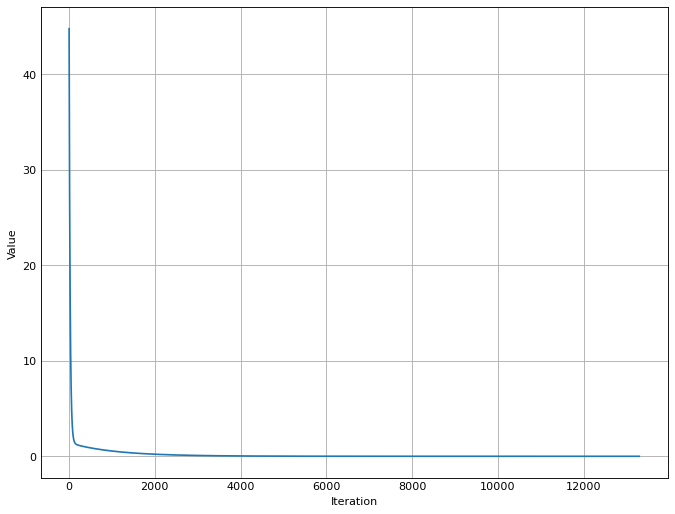

Soulution: 
[ 4.98887105e-01 -7.11844647e-05 -5.23600679e-01]


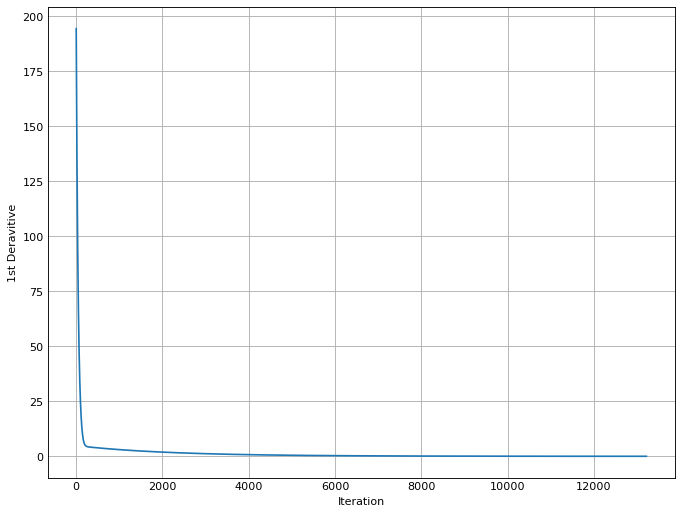

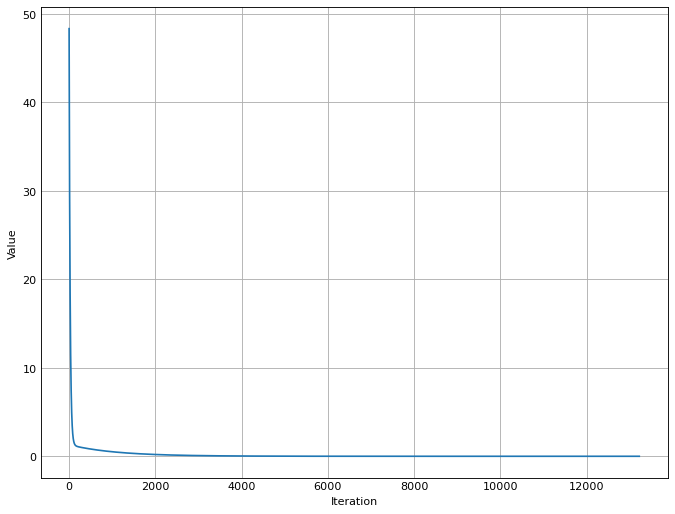

Soulution: 
[ 4.98886992e-01 -7.11917223e-05 -5.23600679e-01]


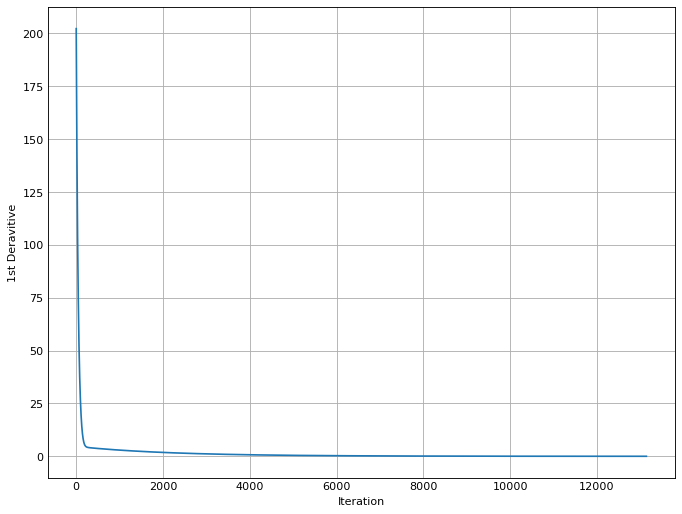

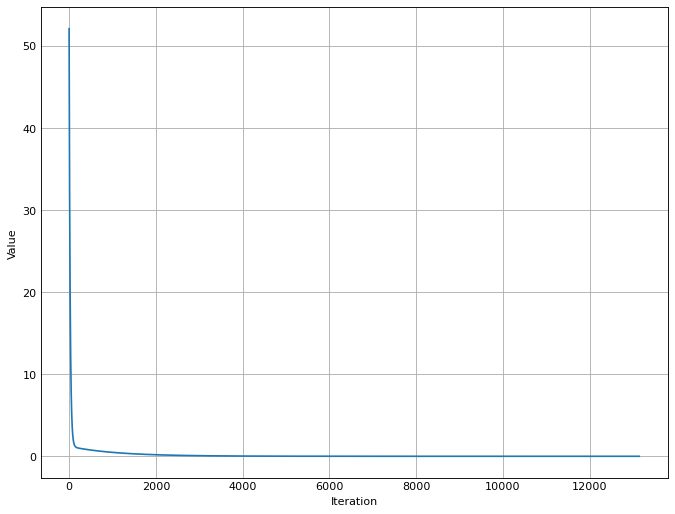

Soulution: 
[ 4.98887196e-01 -7.11786899e-05 -5.23600679e-01]


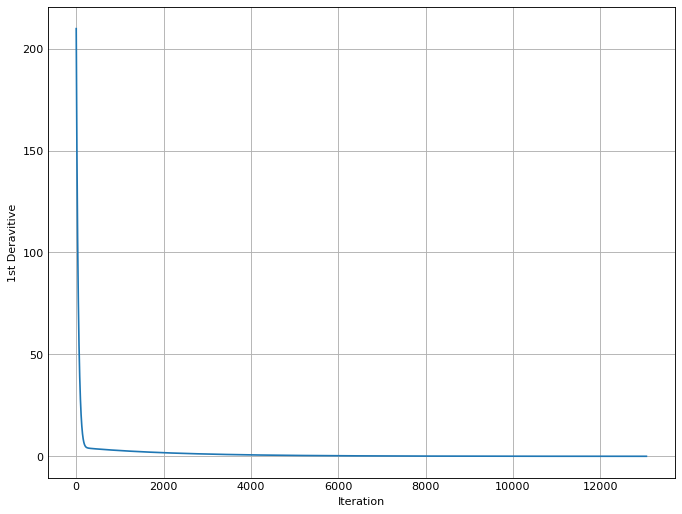

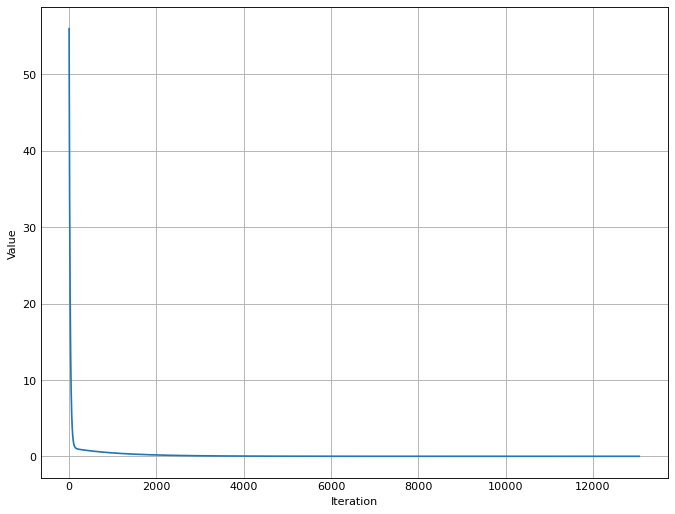

Soulution: 
[ 4.98886776e-01 -7.12055091e-05 -5.23600680e-01]


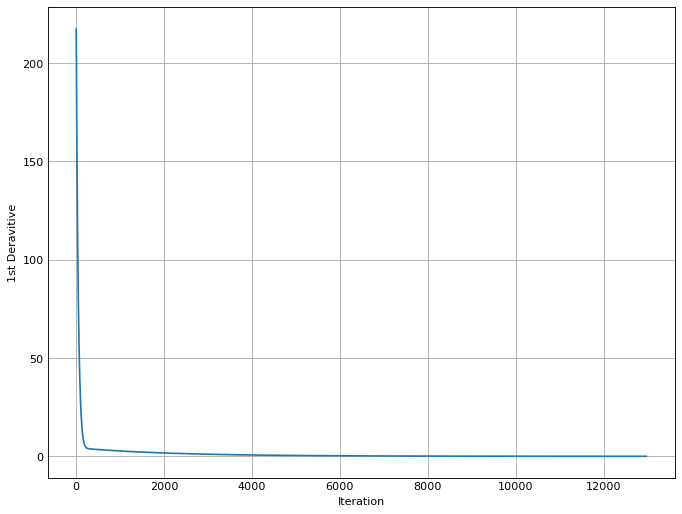

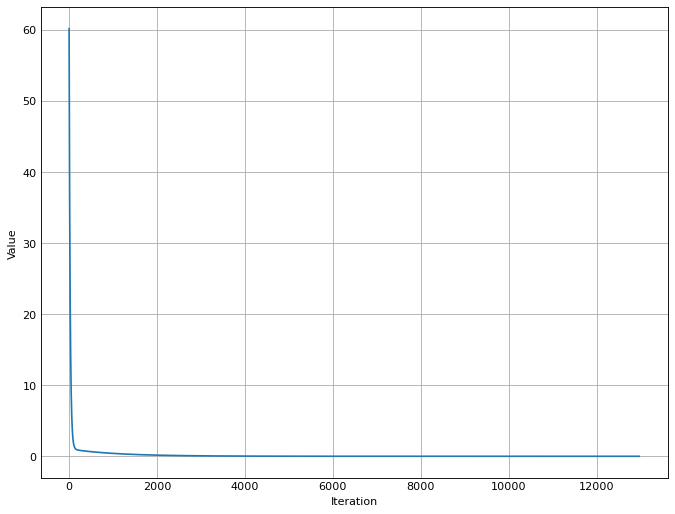

Soulution: 
[ 4.98886902e-01 -7.11974784e-05 -5.23600680e-01]


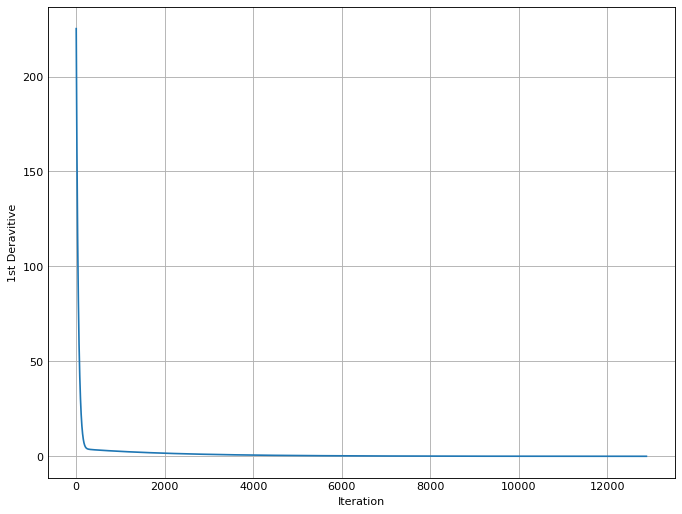

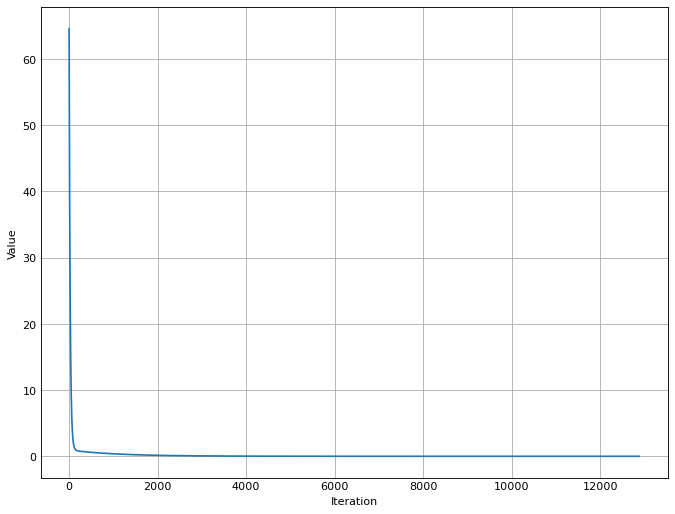

Soulution: 
[ 4.98887210e-01 -7.11777612e-05 -5.23600679e-01]


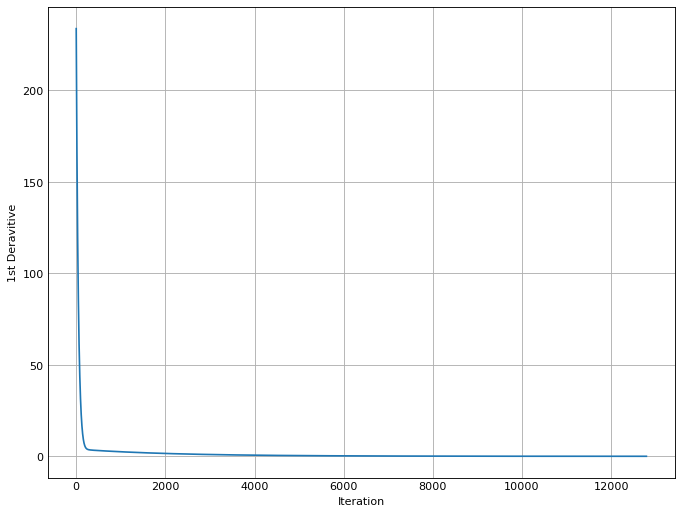

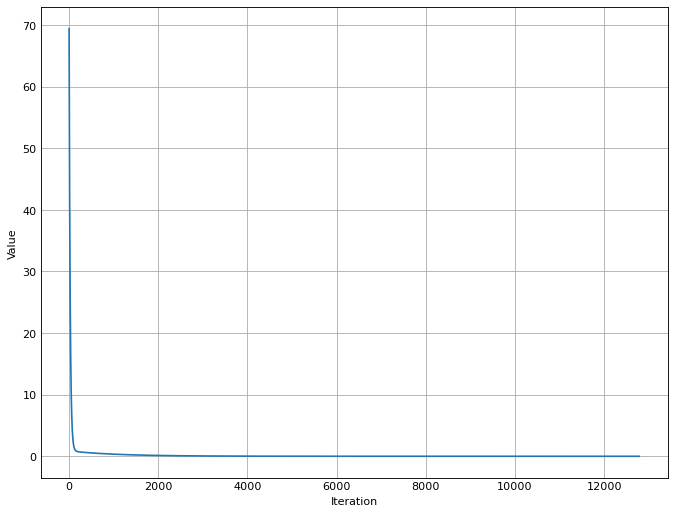

Soulution: 
[ 4.9888685e-01 -7.1200778e-05 -5.2360068e-01]


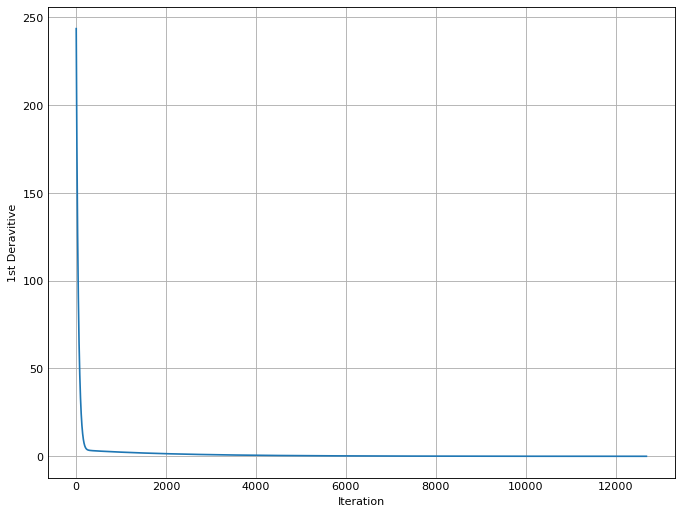

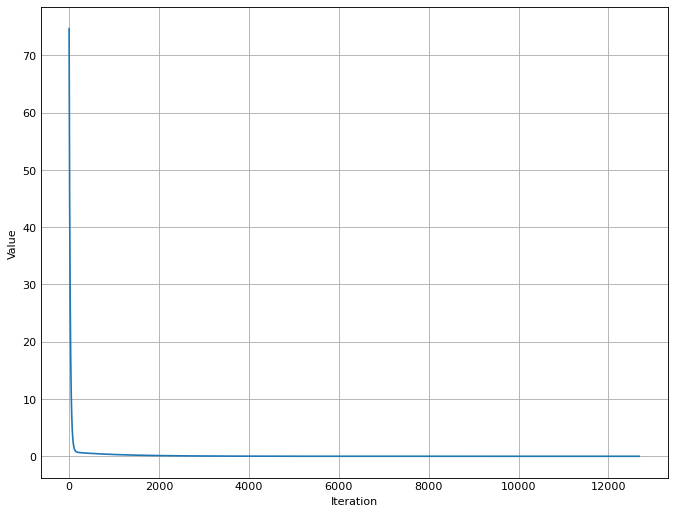

Soulution: 
[ 4.98887085e-01 -7.11857712e-05 -5.23600679e-01]


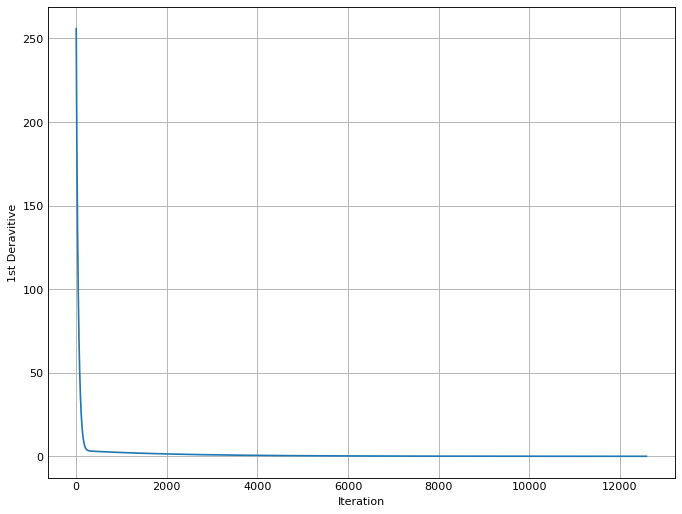

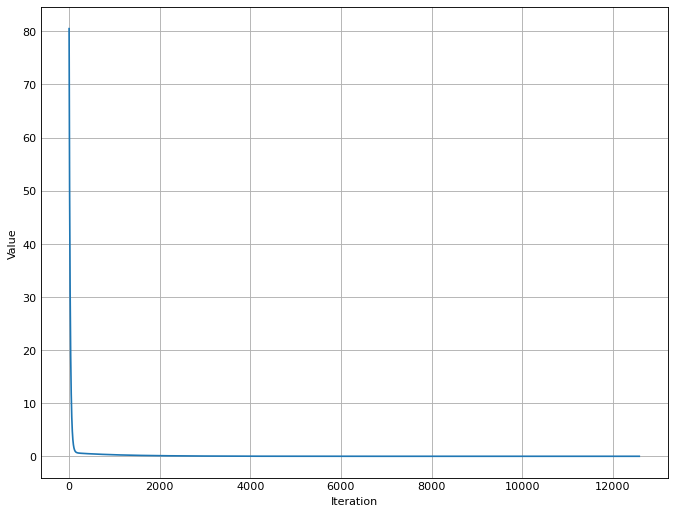

Soulution: 
[ 4.98887137e-01 -7.11824313e-05 -5.23600679e-01]


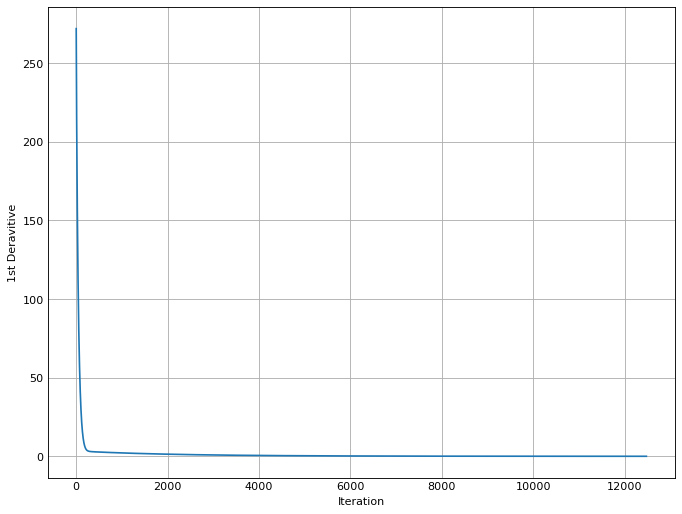

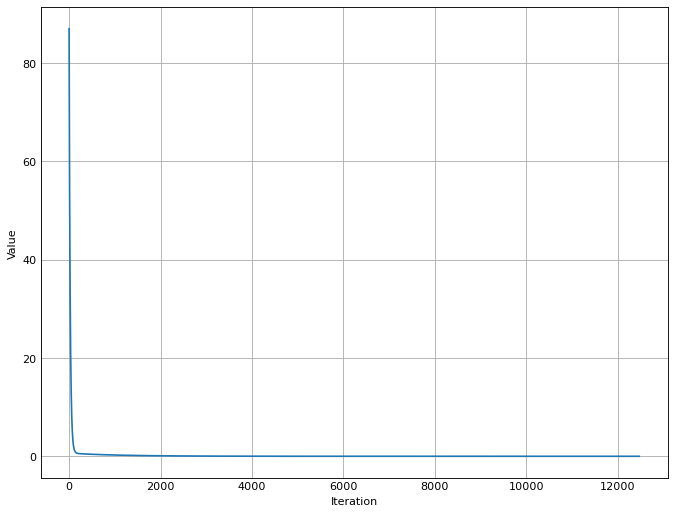

Soulution: 
[ 4.98886797e-01 -7.12041939e-05 -5.23600680e-01]


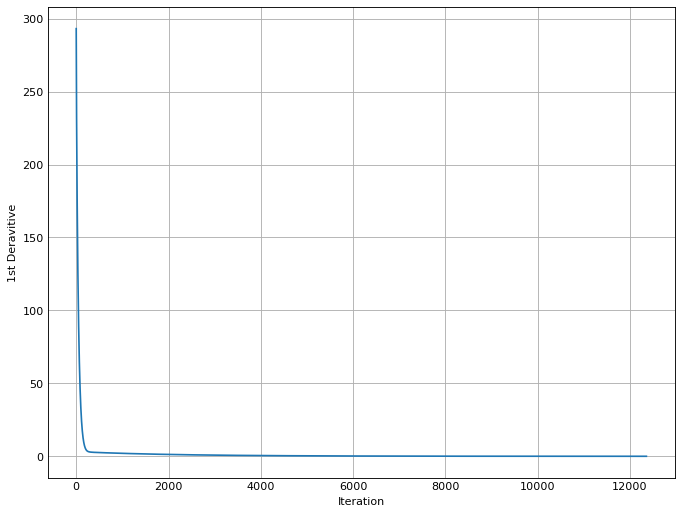

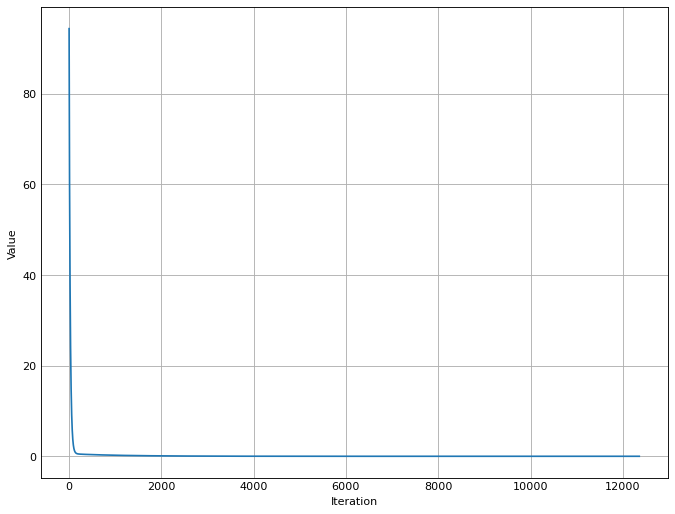

Soulution: 
[ 4.98886950e-01 -7.11943553e-05 -5.23600680e-01]


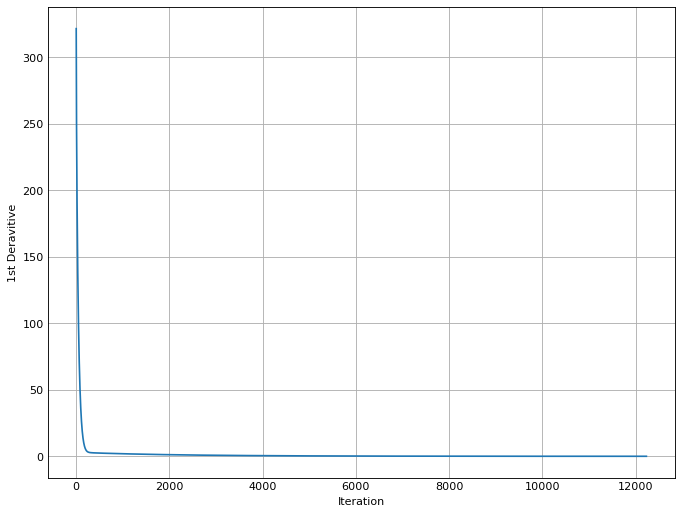

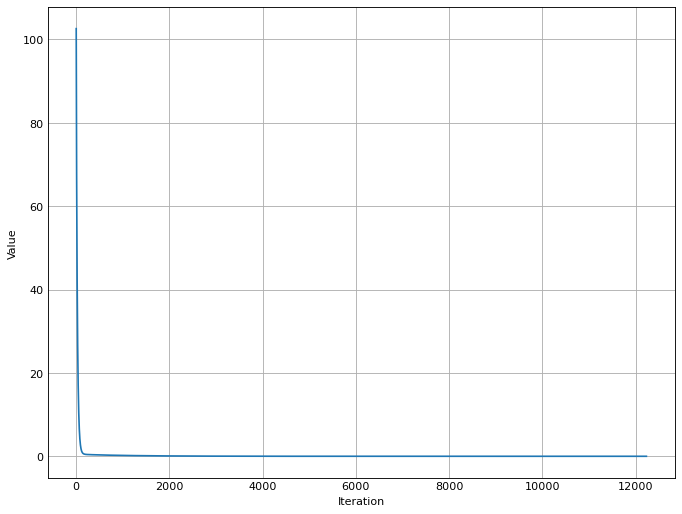

Soulution: 
[ 4.98886996e-01 -7.11914536e-05 -5.23600679e-01]


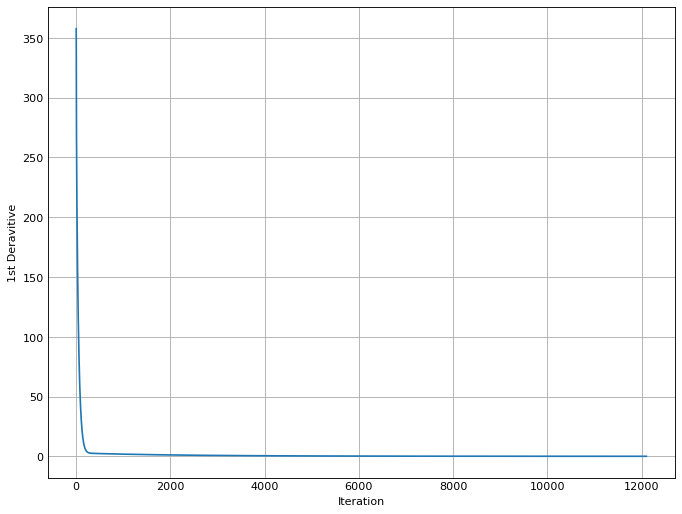

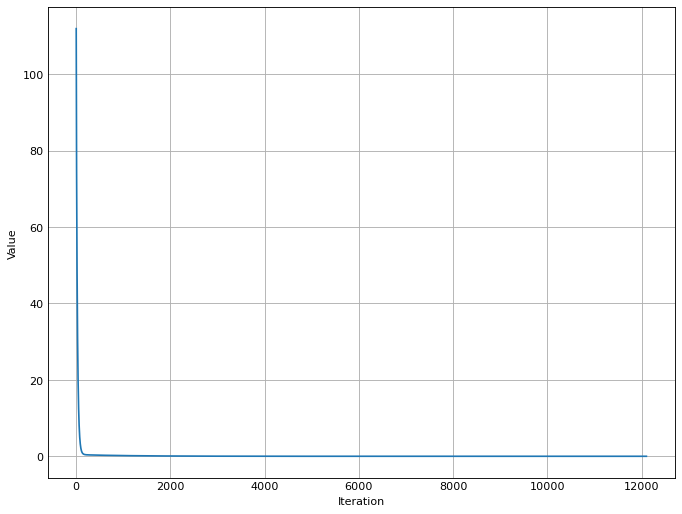

Soulution: 
[ 4.98886938e-01 -7.11951224e-05 -5.23600680e-01]


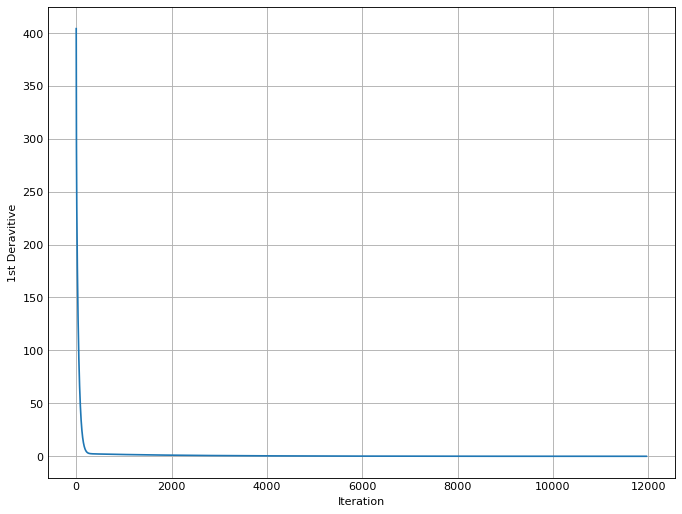

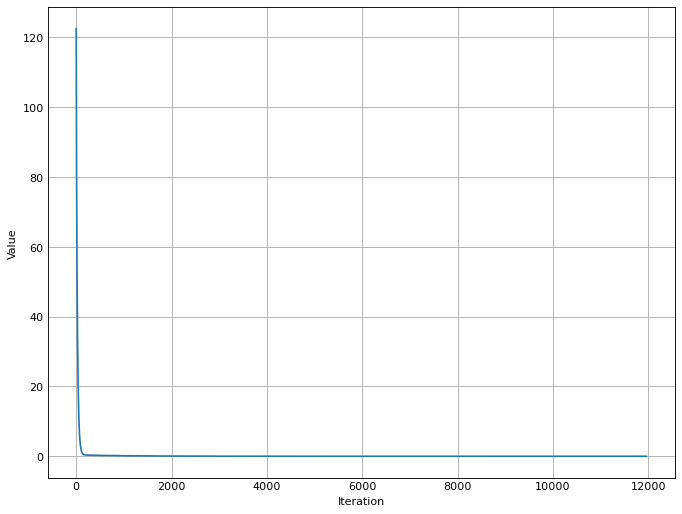

Soulution: 
[ 4.98886897e-01 -7.11977704e-05 -5.23600680e-01]


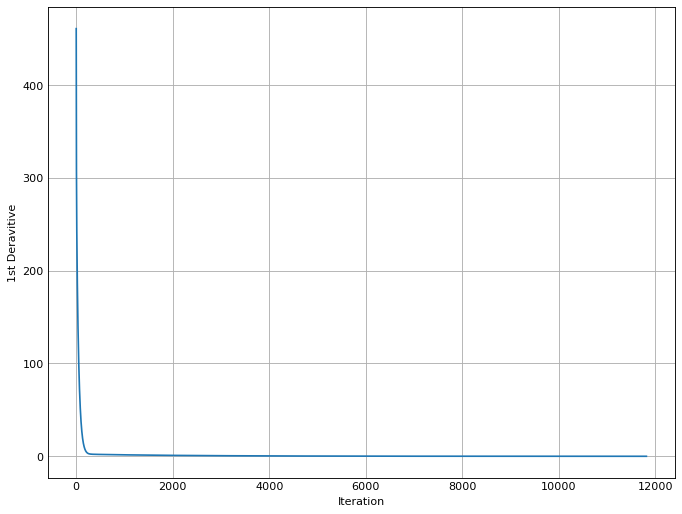

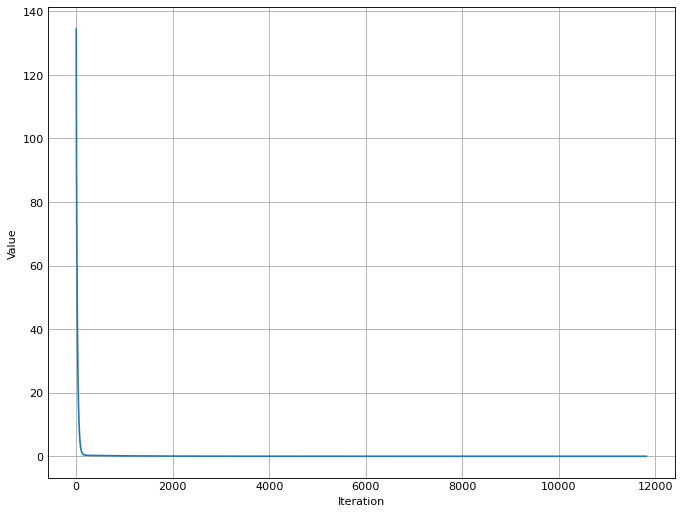

Soulution: 
[ 4.98887137e-01 -7.11824039e-05 -5.23600679e-01]


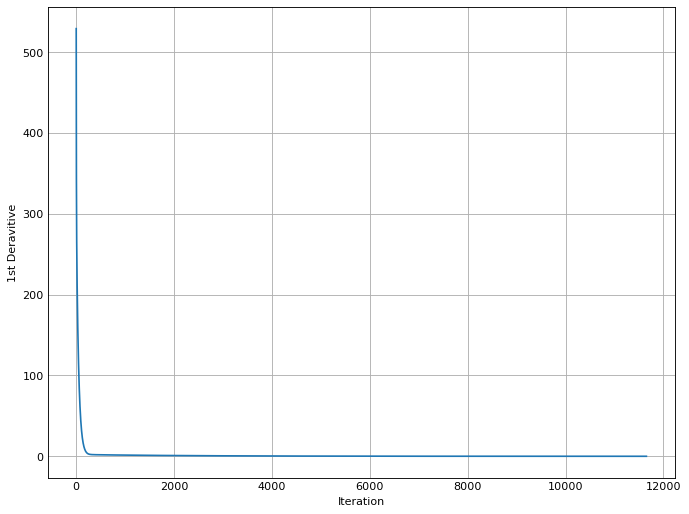

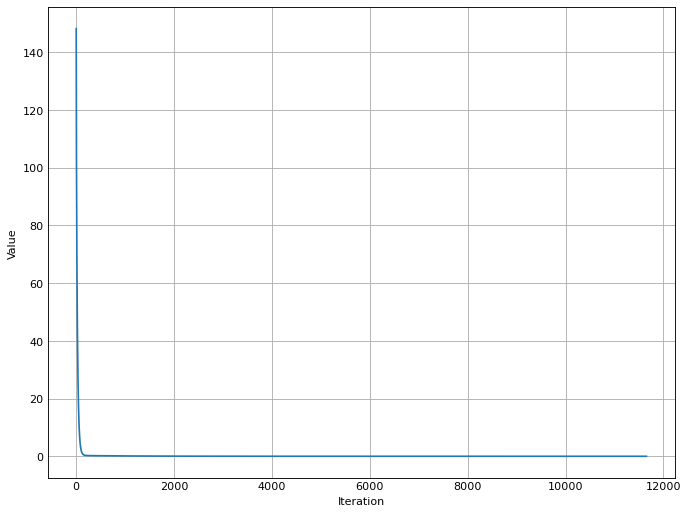

Soulution: 
[ 4.98887081e-01 -7.11860379e-05 -5.23600679e-01]


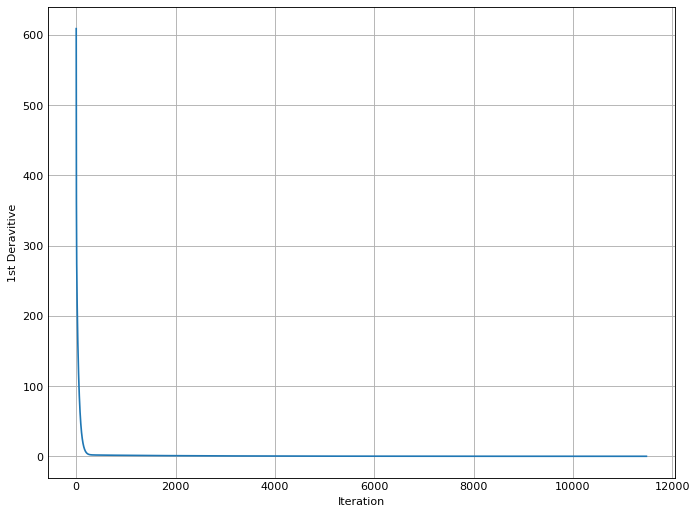

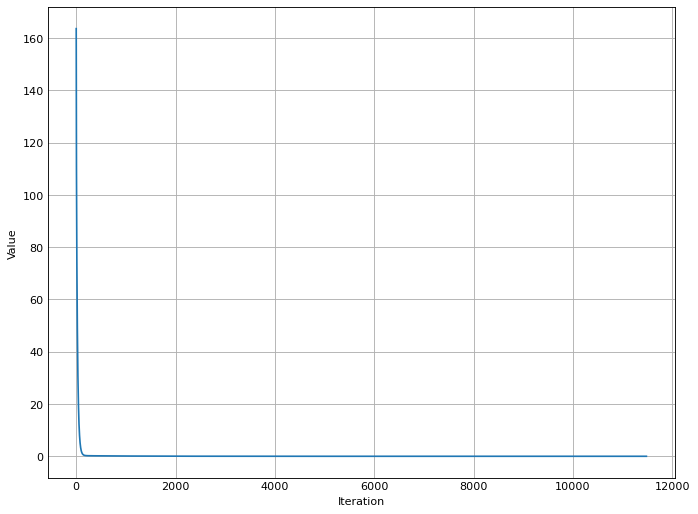

Soulution: 
[ 4.98886933e-01 -7.11954914e-05 -5.23600680e-01]


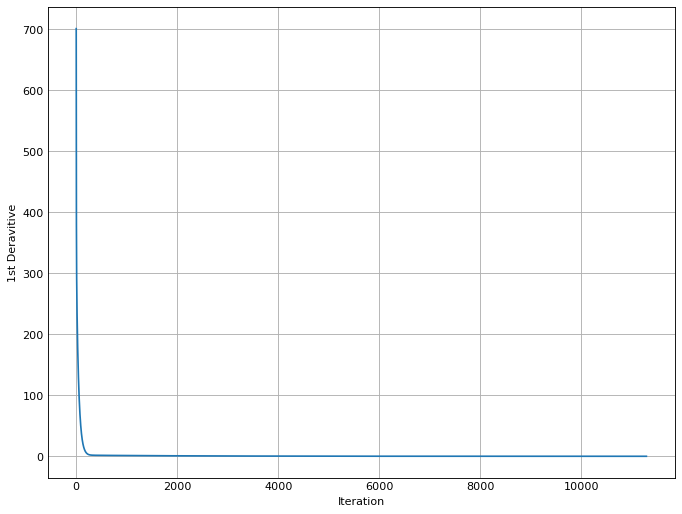

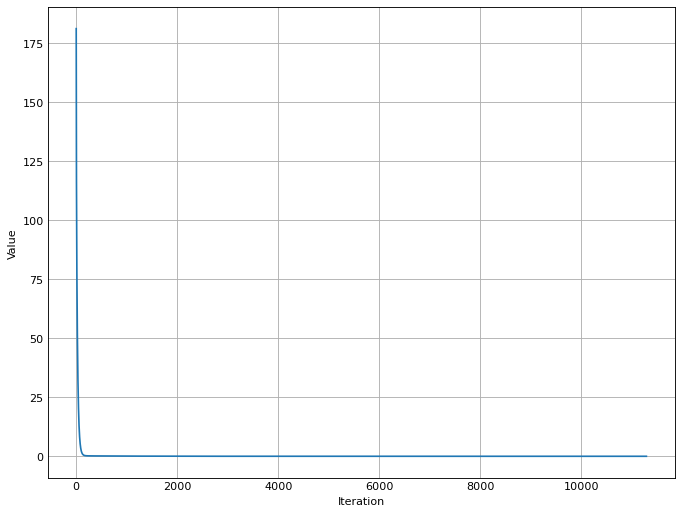

Soulution: 
[ 4.98887270e-01 -7.11739550e-05 -5.23600679e-01]


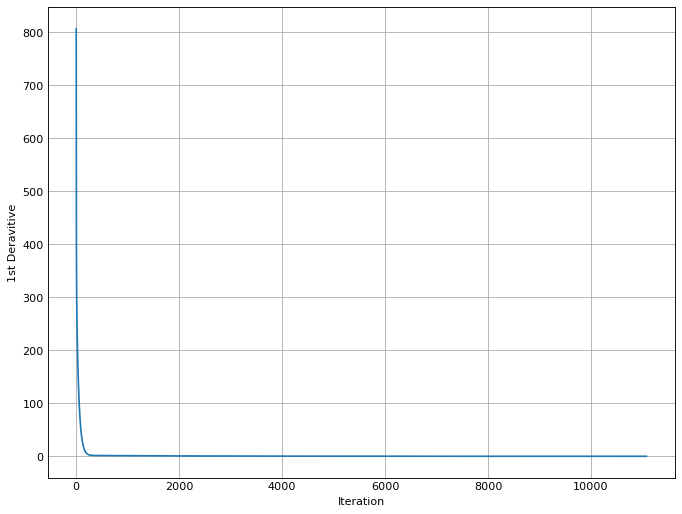

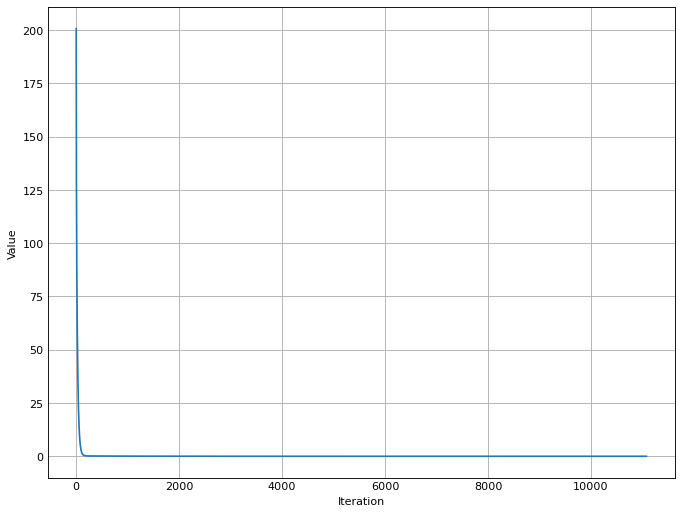

Soulution: 
[ 4.98887118e-01 -7.11836256e-05 -5.23600679e-01]


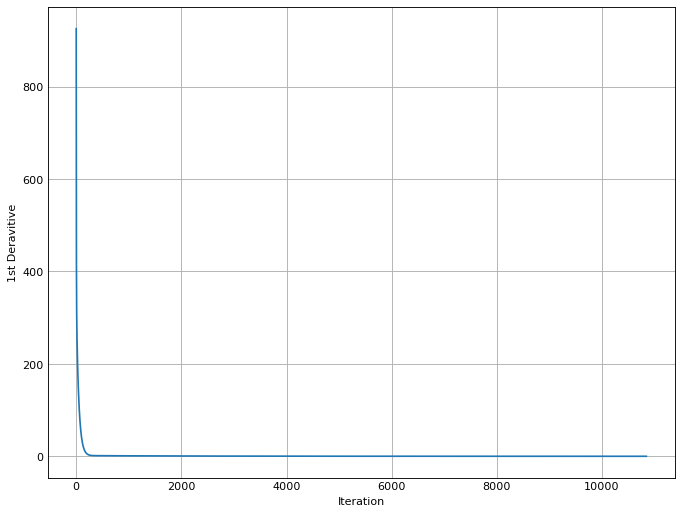

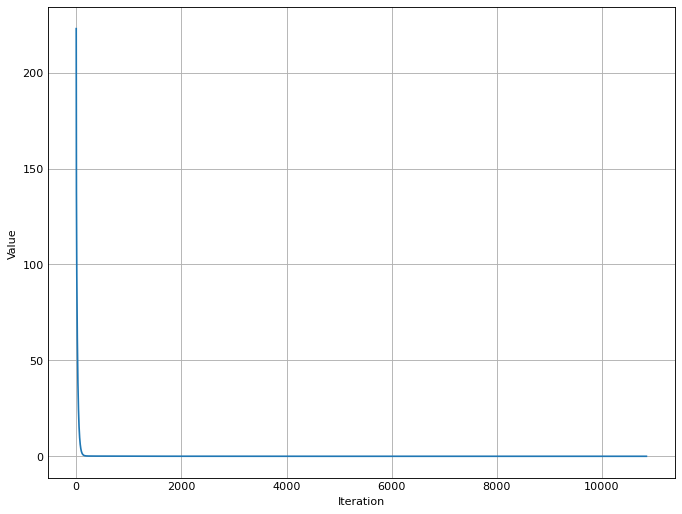

Soulution: 
[ 4.98886819e-01 -7.12027826e-05 -5.23600680e-01]


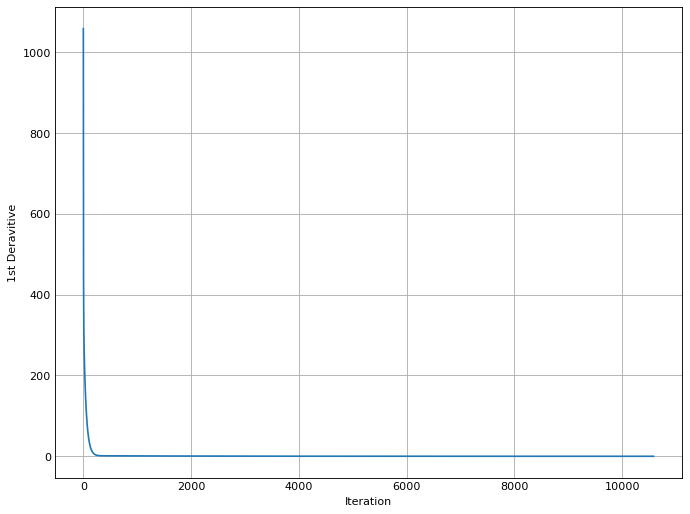

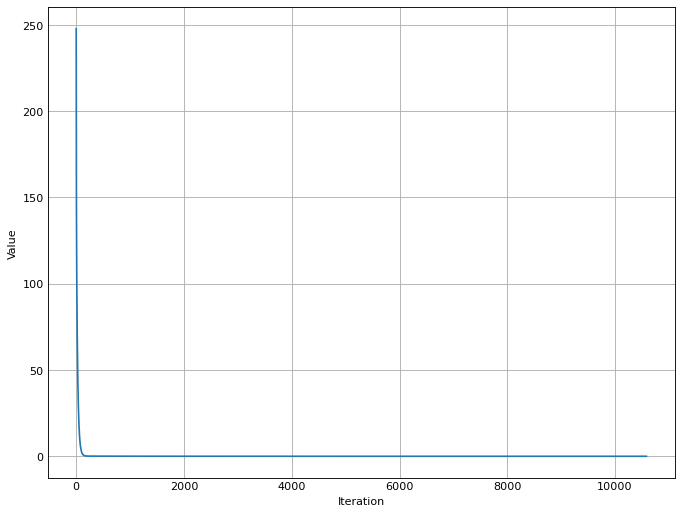

Soulution: 
[ 4.98886908e-01 -7.11970471e-05 -5.23600680e-01]


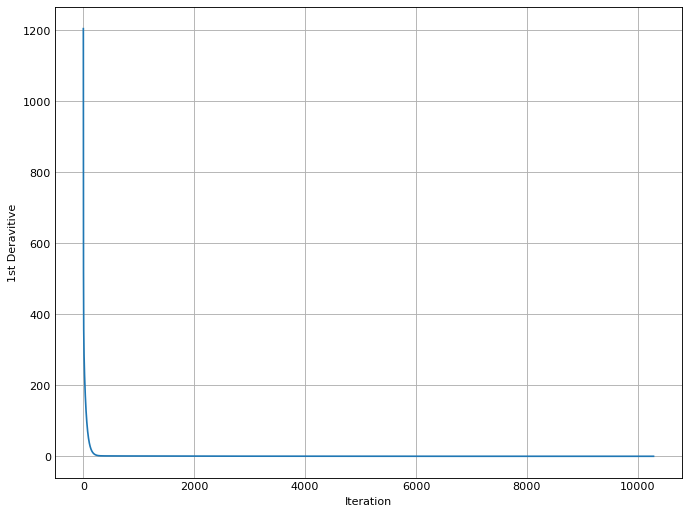

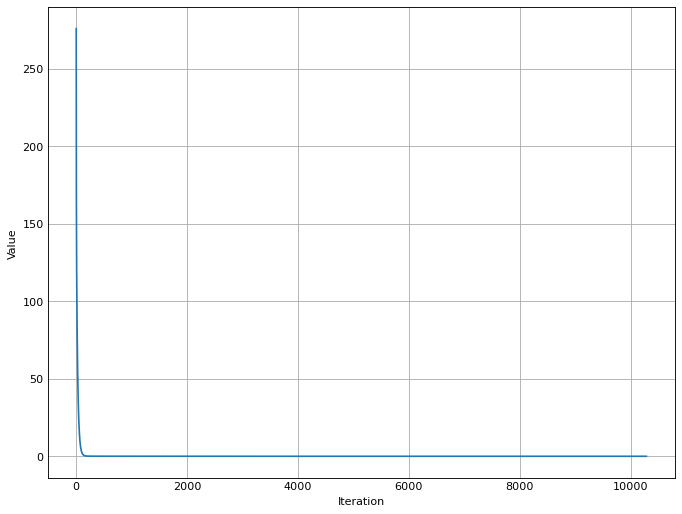

Soulution: 
[ 4.98886852e-01 -7.12006224e-05 -5.23600680e-01]


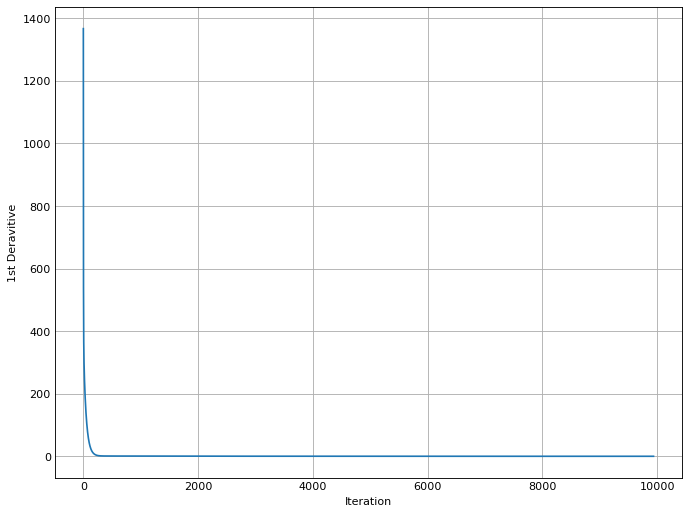

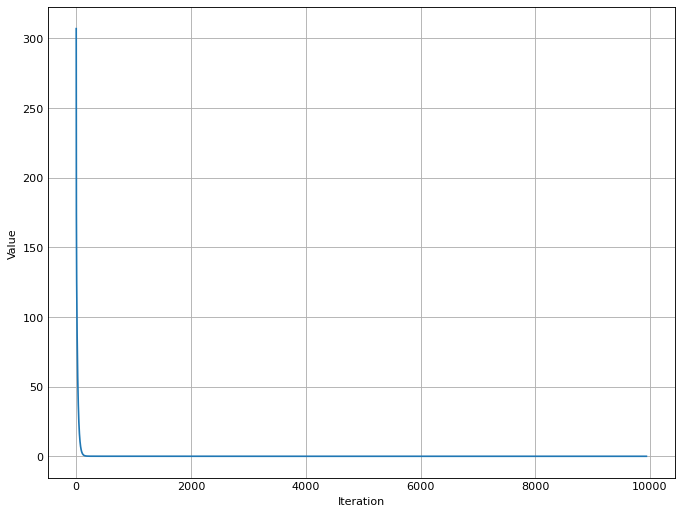

Soulution: 
[ 4.98887167e-01 -7.11805271e-05 -5.23600679e-01]


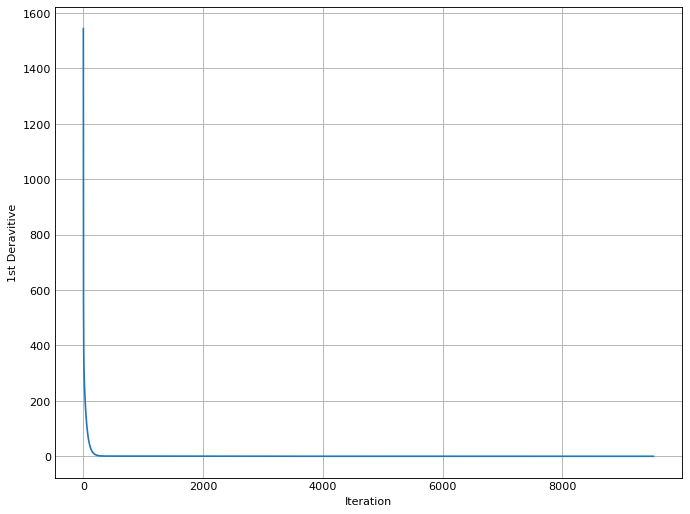

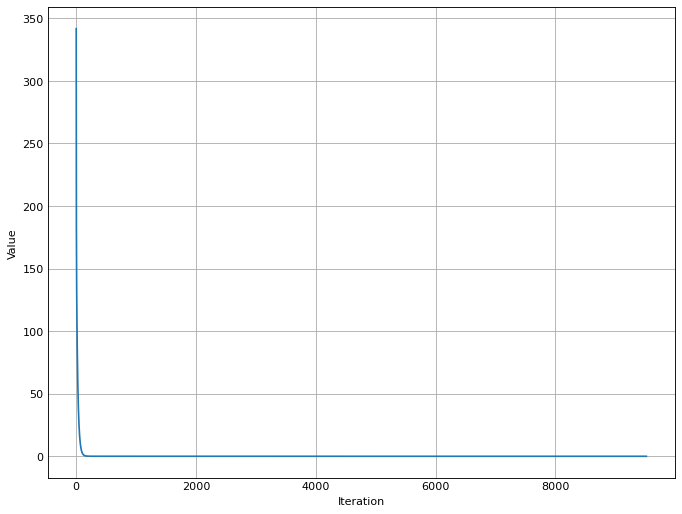

Soulution: 
[ 4.98887263e-01 -7.11744047e-05 -5.23600679e-01]


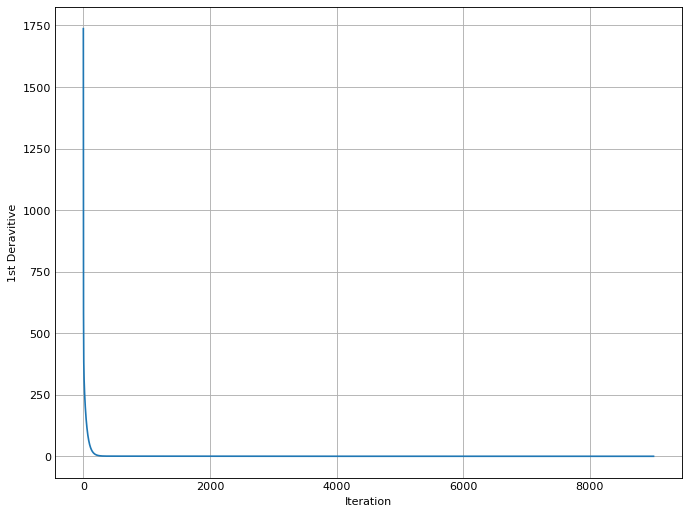

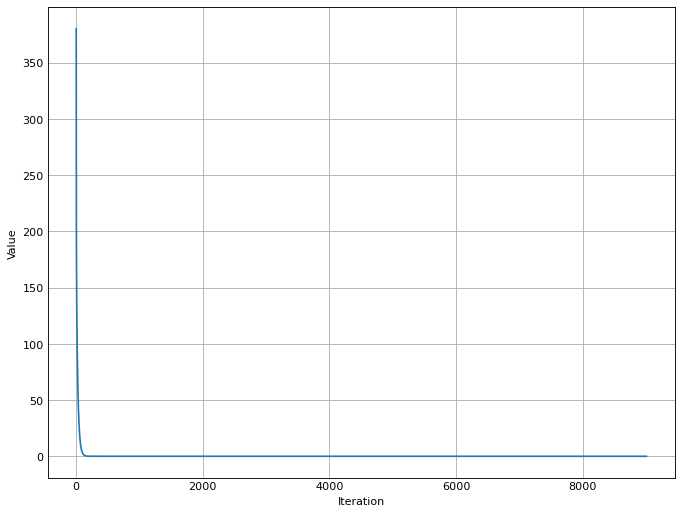

Soulution: 
[ 4.98887015e-01 -7.11902330e-05 -5.23600679e-01]


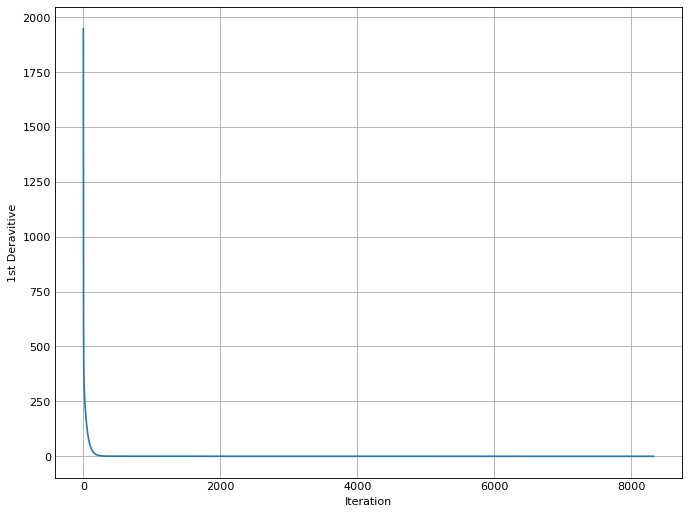

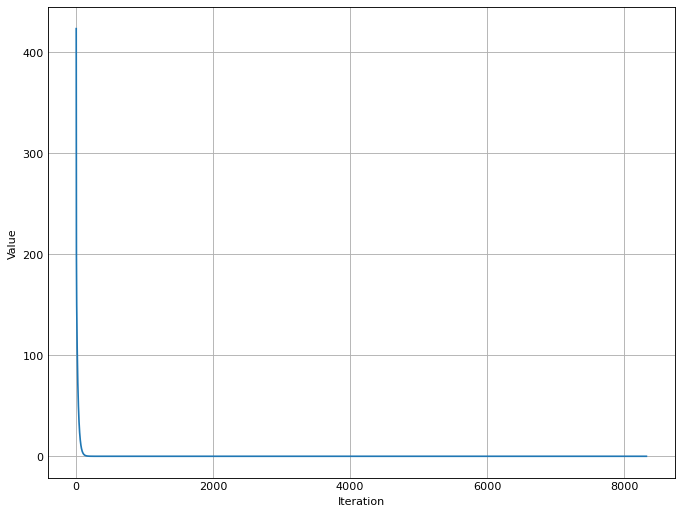

Soulution: 
[ 4.98886812e-01 -7.12032208e-05 -5.23600680e-01]


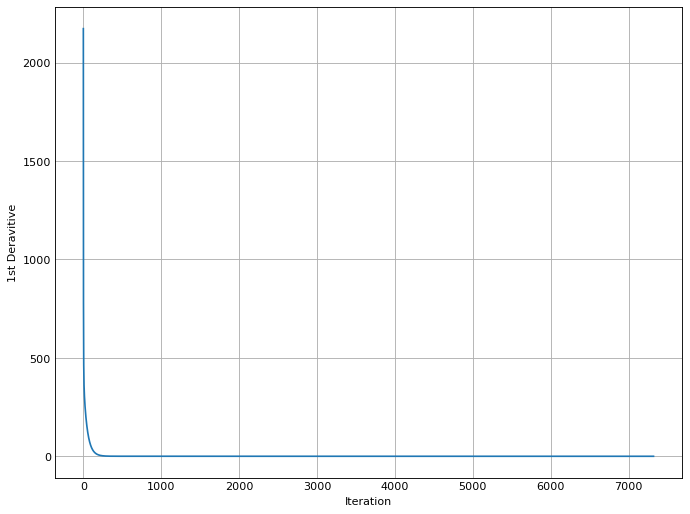

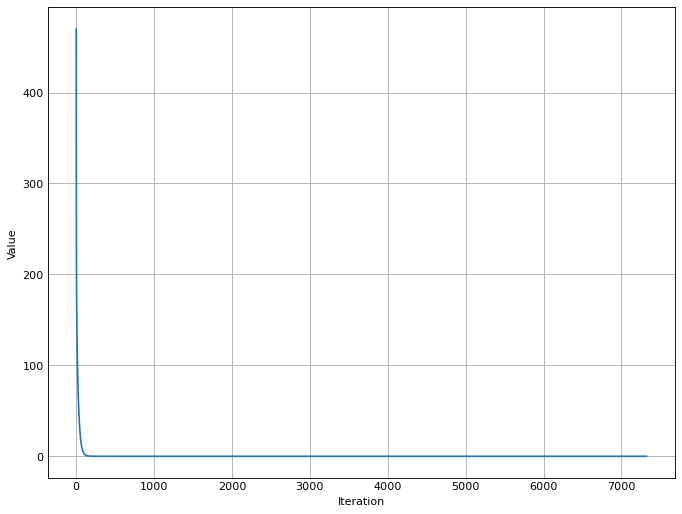

Soulution: 
[ 4.98886978e-01 -7.11925973e-05 -5.23600679e-01]


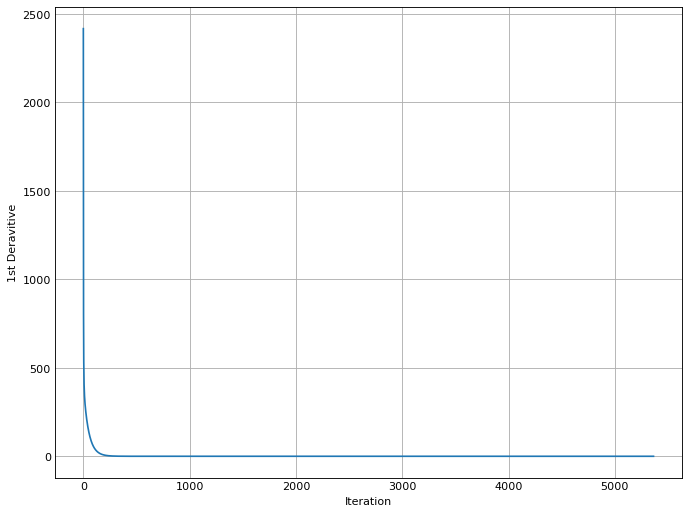

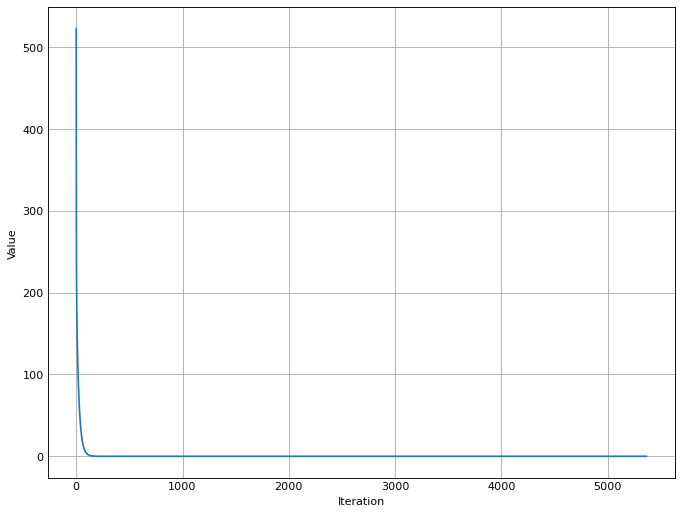

Soulution: 
[ 5.01112942e-01  7.12934853e-05 -5.23596861e-01]


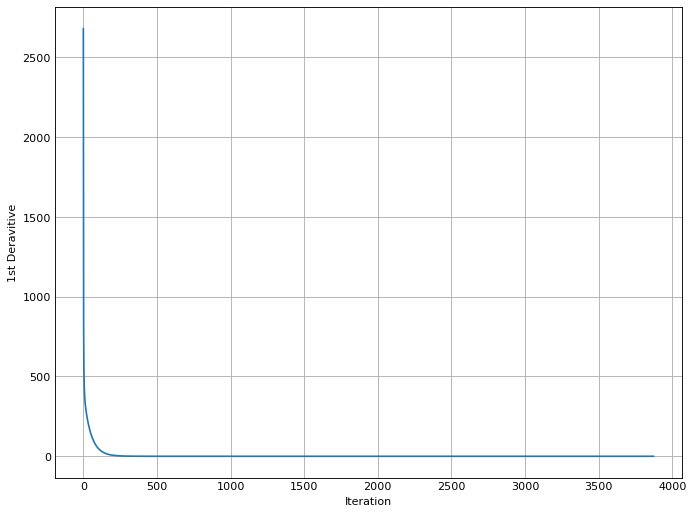

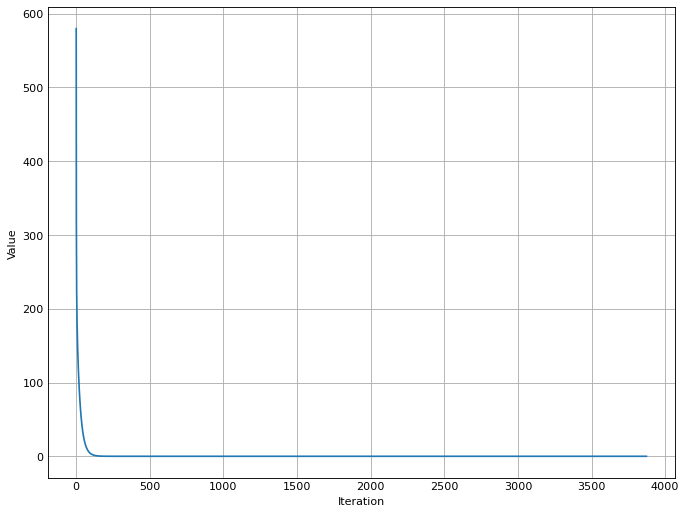

Soulution: 
[ 5.01113025e-01  7.12987964e-05 -5.23596861e-01]


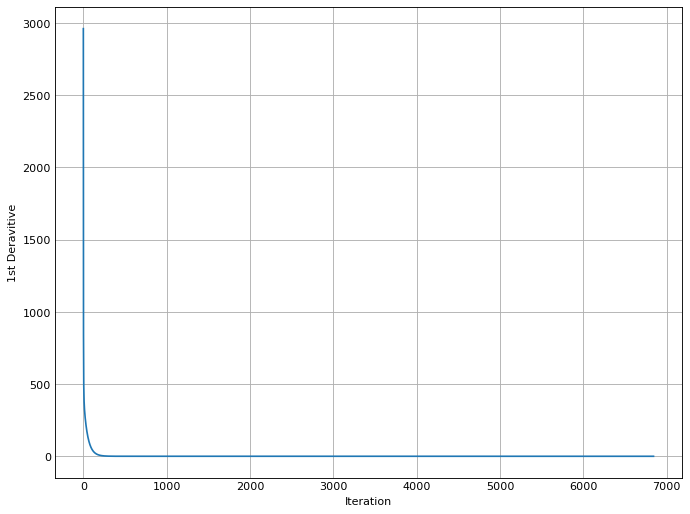

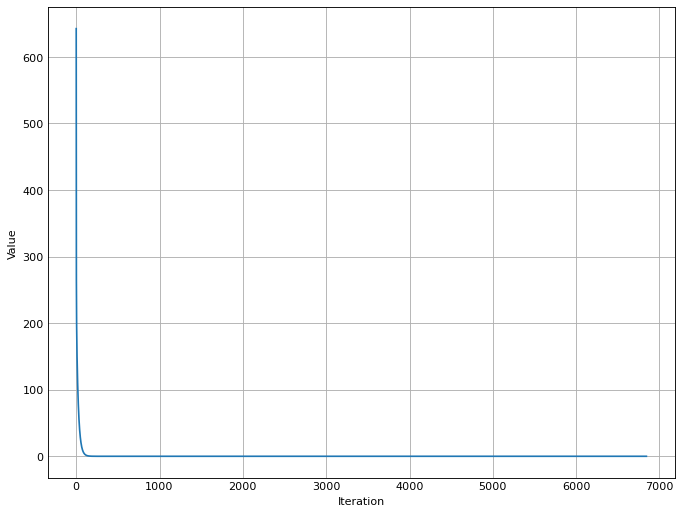

Soulution: 
[ 5.01112798e-01  7.12843012e-05 -5.23596861e-01]


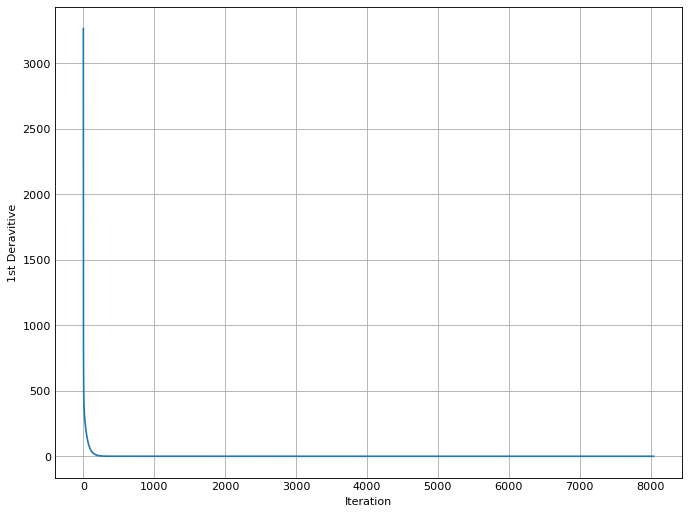

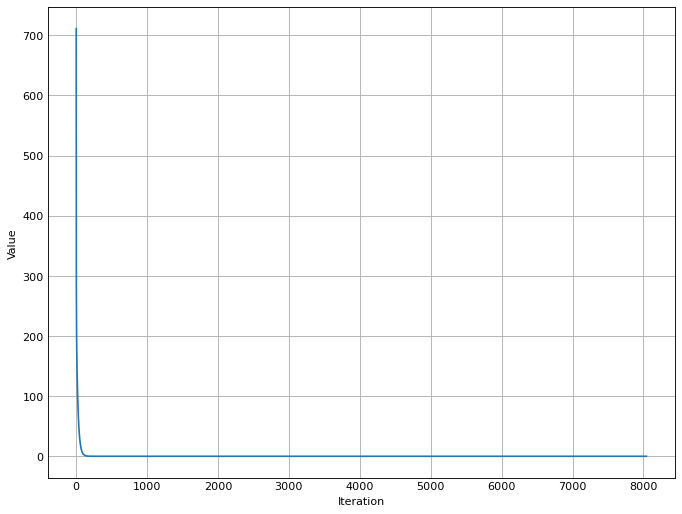

Soulution: 
[ 5.01112753e-01  7.12814100e-05 -5.23596861e-01]


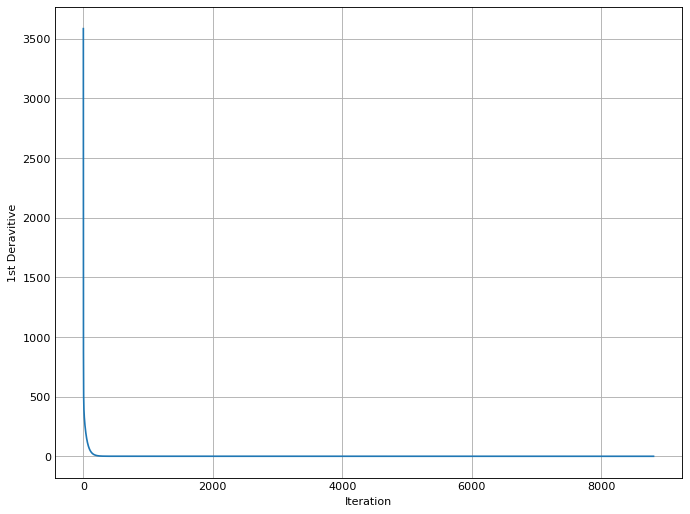

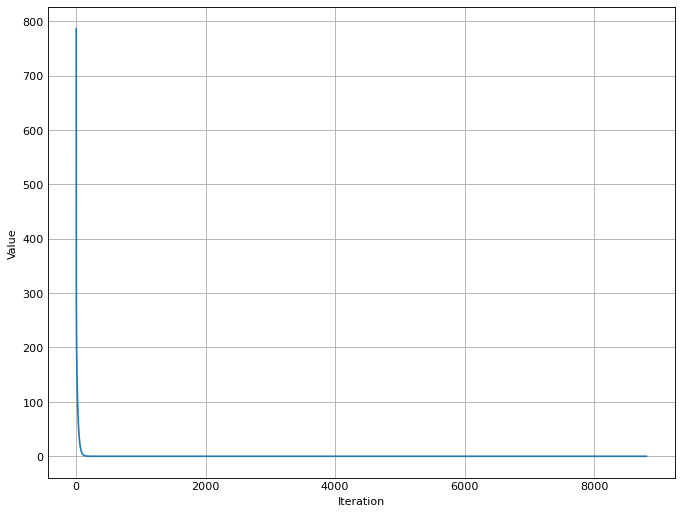

Soulution: 
[ 5.01112730e-01  7.12799170e-05 -5.23596861e-01]


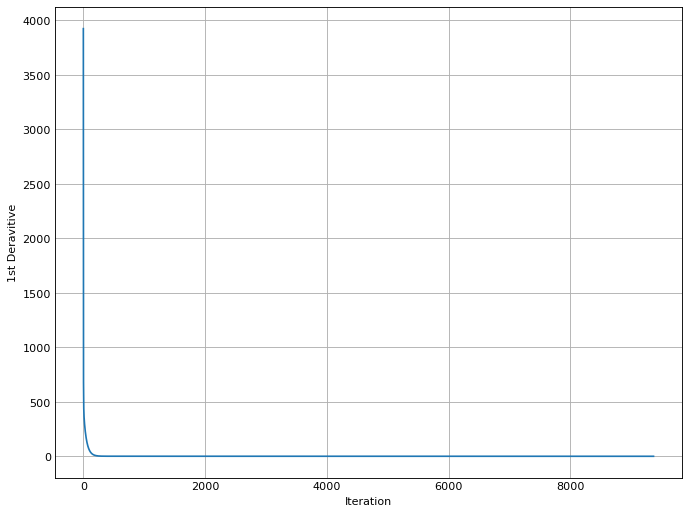

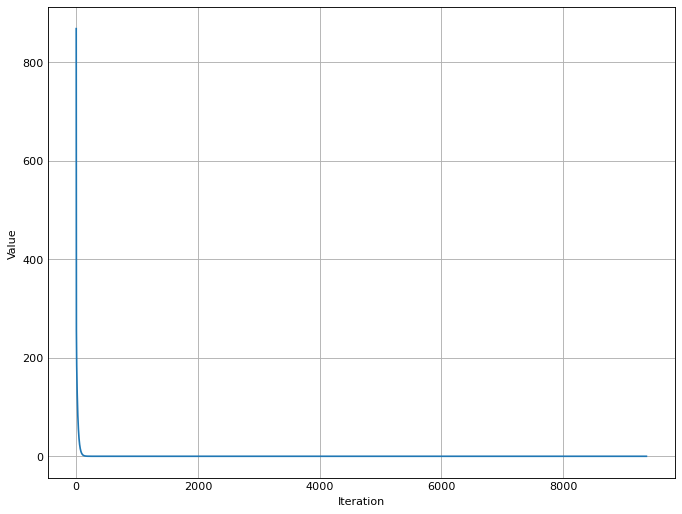

Soulution: 
[ 5.01113126e-01  7.13053306e-05 -5.23596860e-01]


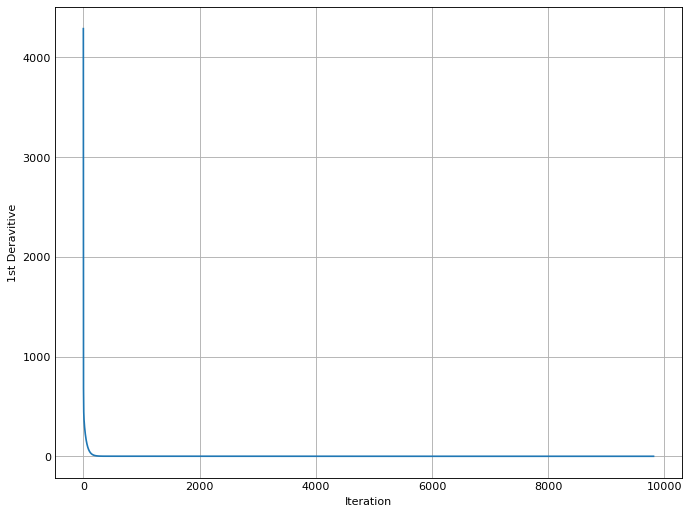

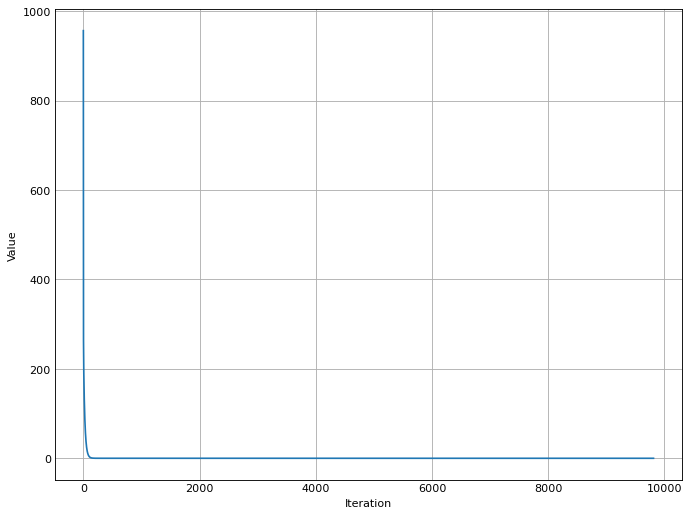

Soulution: 
[ 5.01113183e-01  7.13089232e-05 -5.23596860e-01]


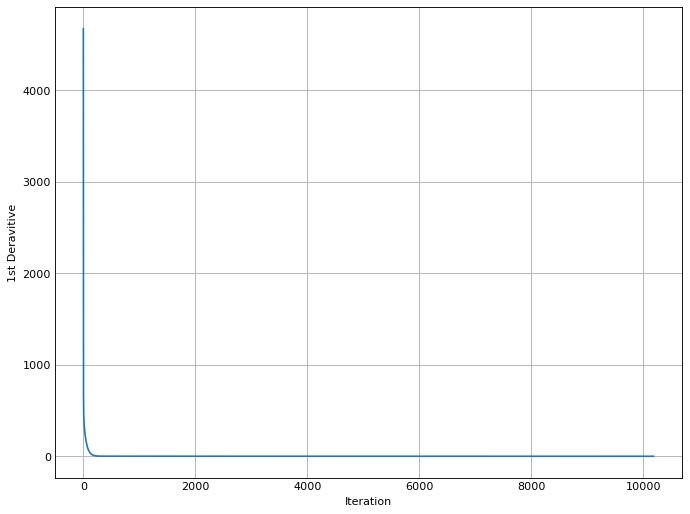

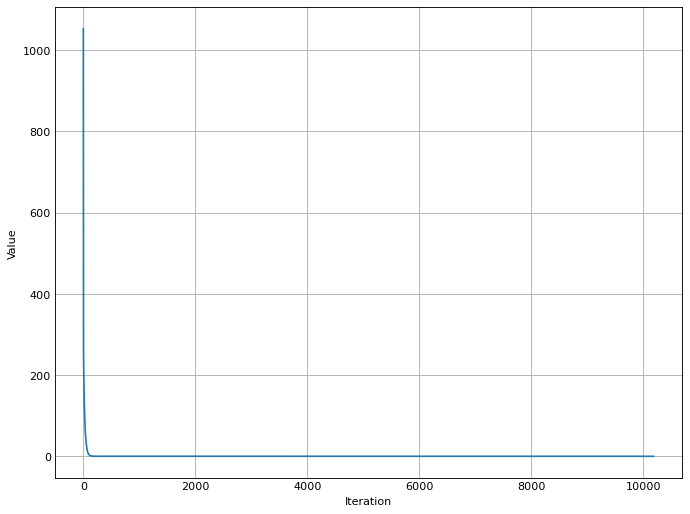

Soulution: 
[ 5.01113192e-01  7.13095410e-05 -5.23596860e-01]


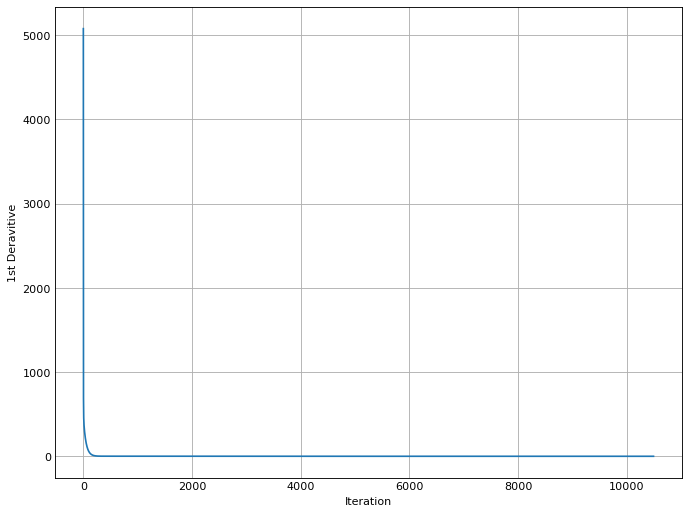

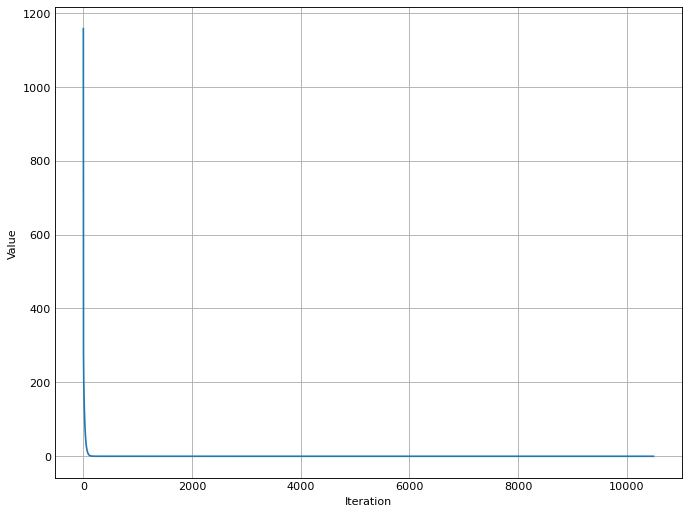

Soulution: 
[ 5.01113083e-01  7.13025181e-05 -5.23596860e-01]


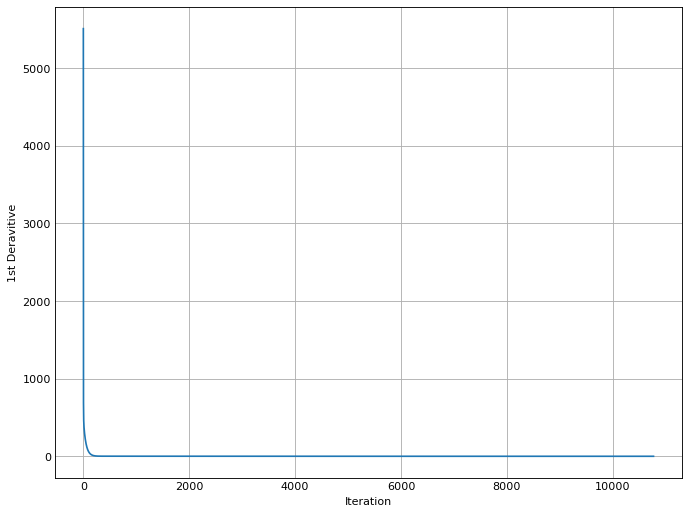

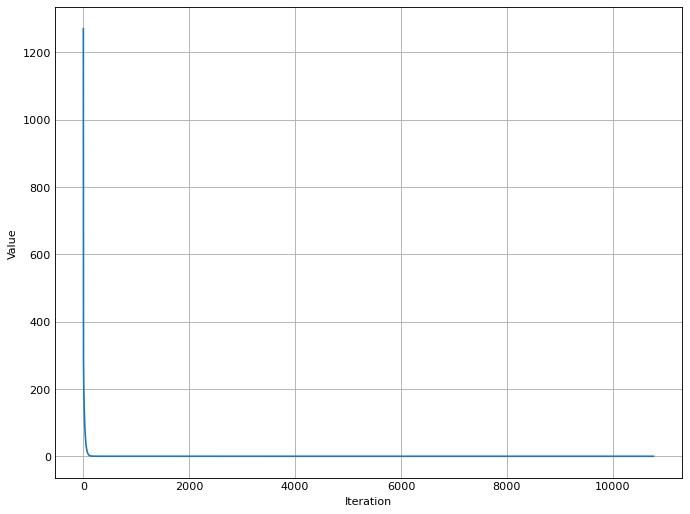

Soulution: 
[ 5.01112919e-01  7.12920412e-05 -5.23596861e-01]


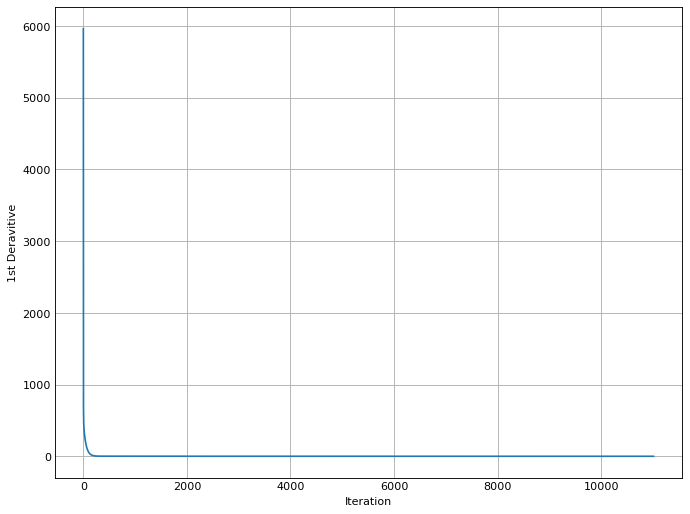

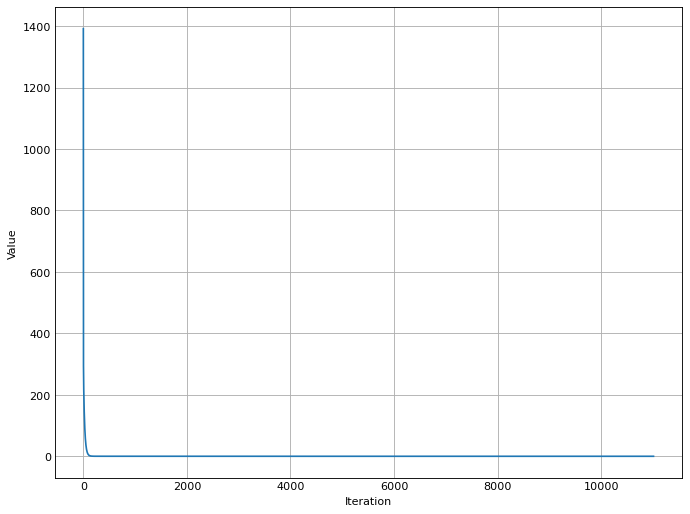

Soulution: 
[ 5.01112872e-01  7.12890296e-05 -5.23596861e-01]


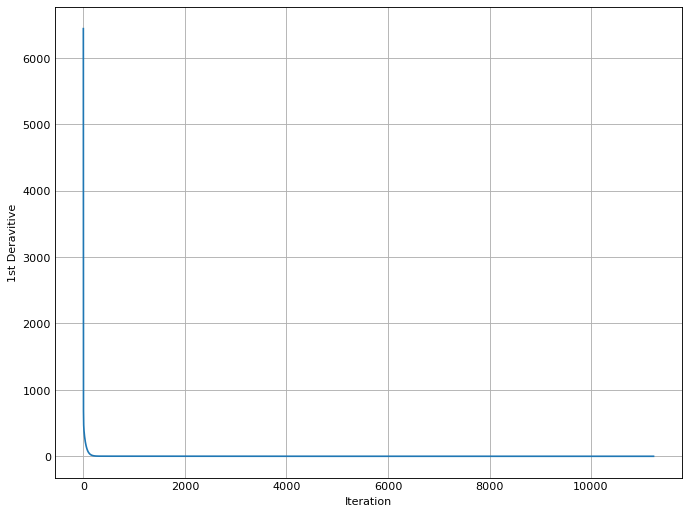

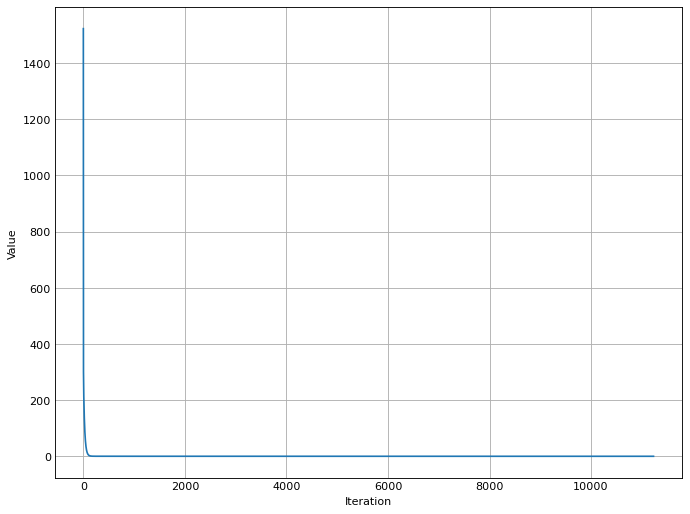

Soulution: 
[ 5.01112716e-01  7.12790441e-05 -5.23596861e-01]


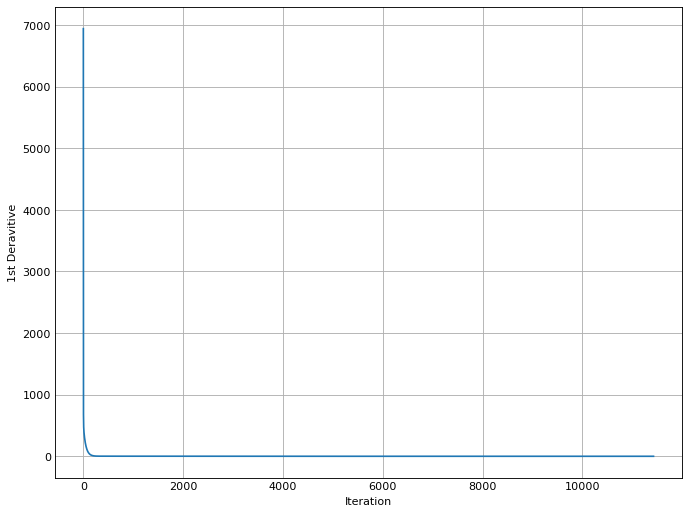

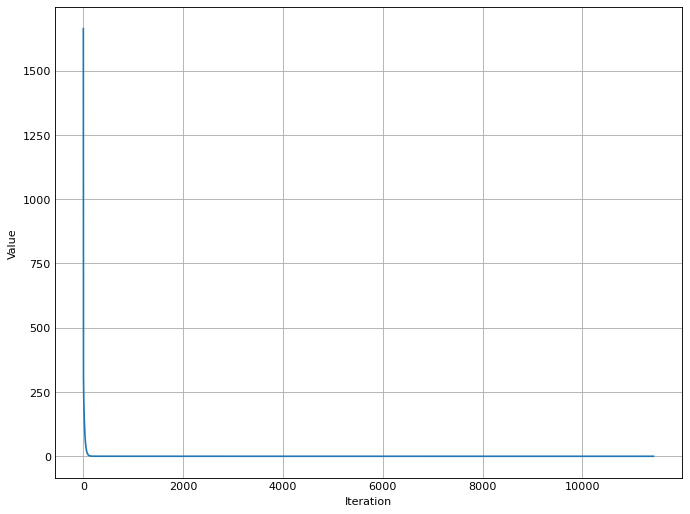

Soulution: 
[ 5.01113182e-01  7.13088732e-05 -5.23596860e-01]


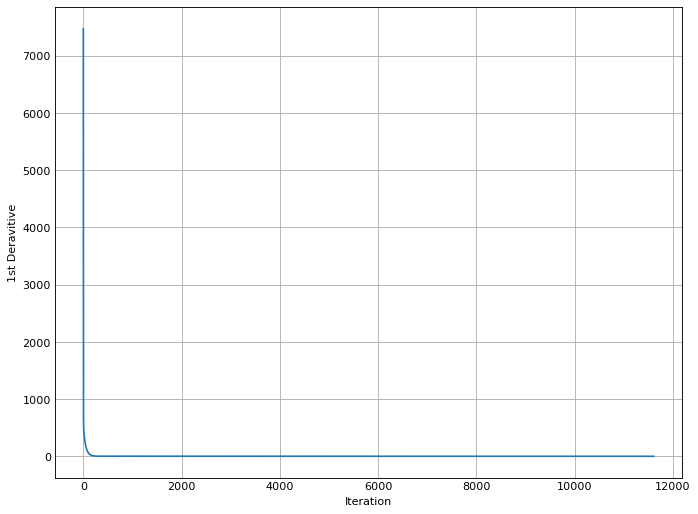

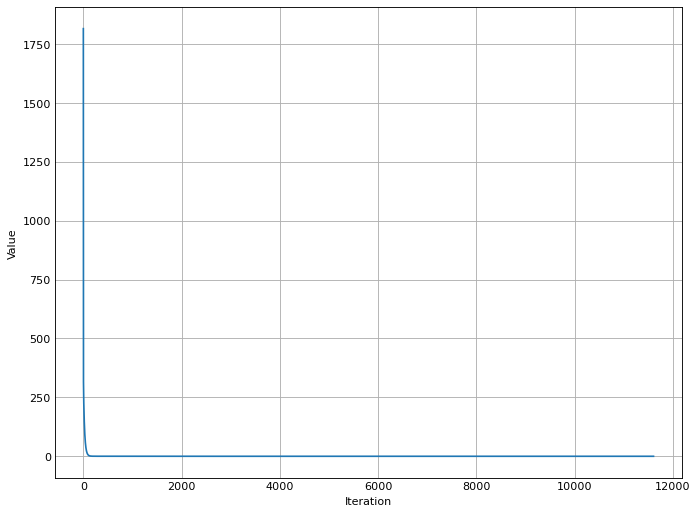

Soulution: 
[ 5.01113021e-01  7.12985973e-05 -5.23596861e-01]


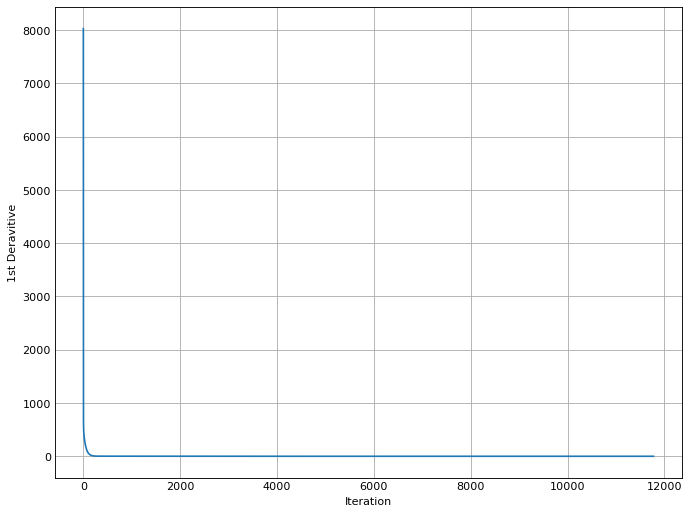

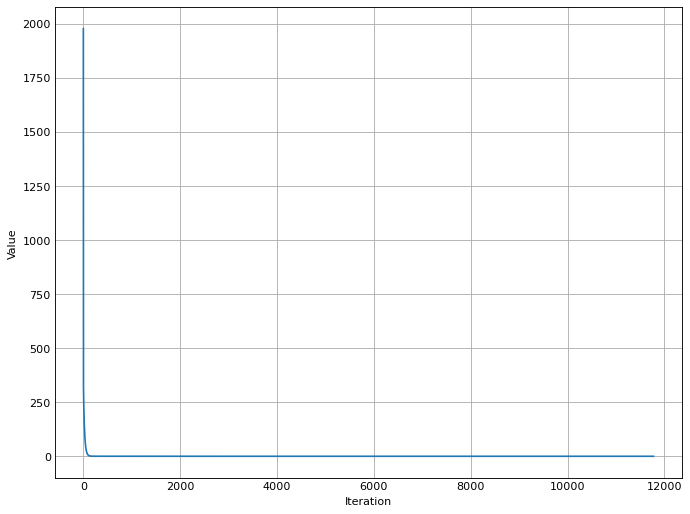

Soulution: 
[ 5.01112774e-01  7.12827092e-05 -5.23596861e-01]


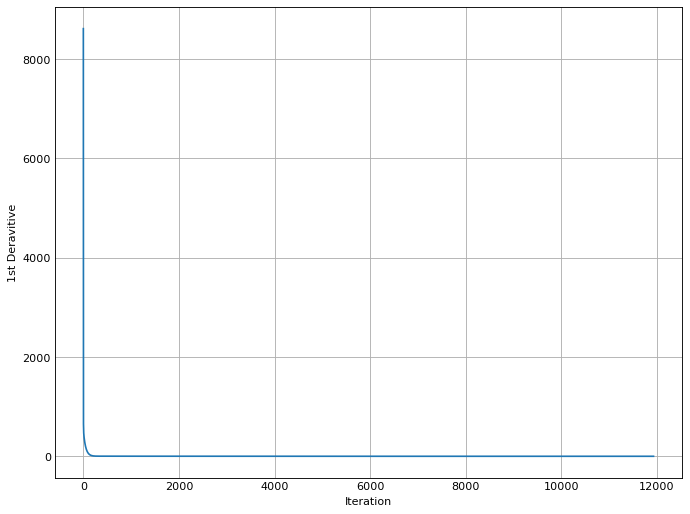

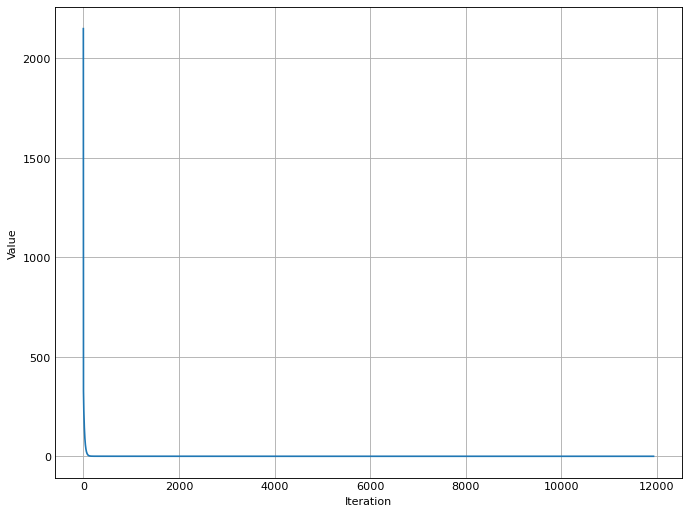

Soulution: 
[ 5.01112760e-01  7.12818392e-05 -5.23596861e-01]


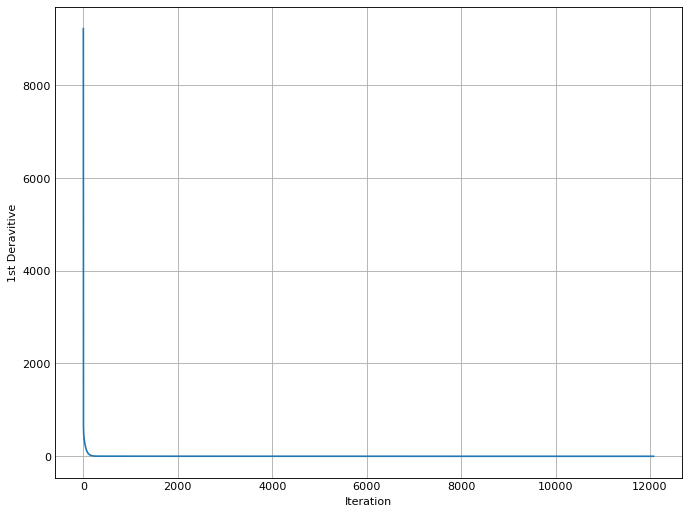

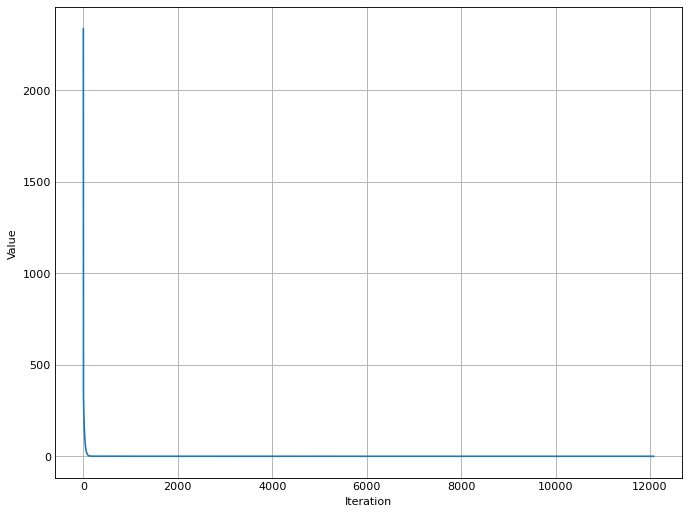

Soulution: 
[ 5.01113141e-01  7.13062491e-05 -5.23596860e-01]


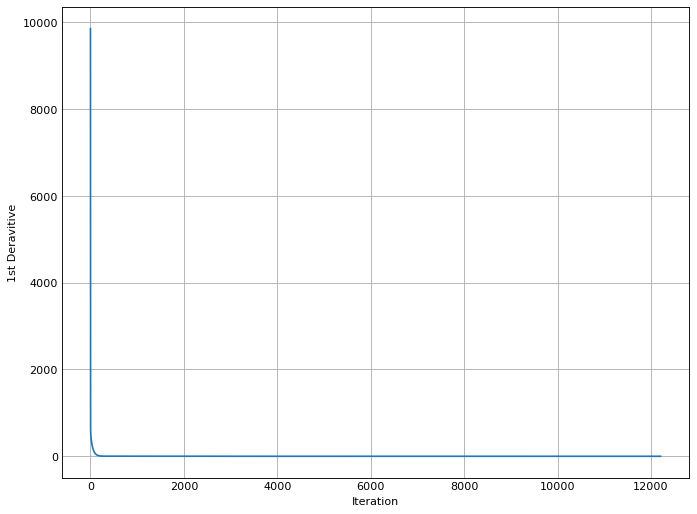

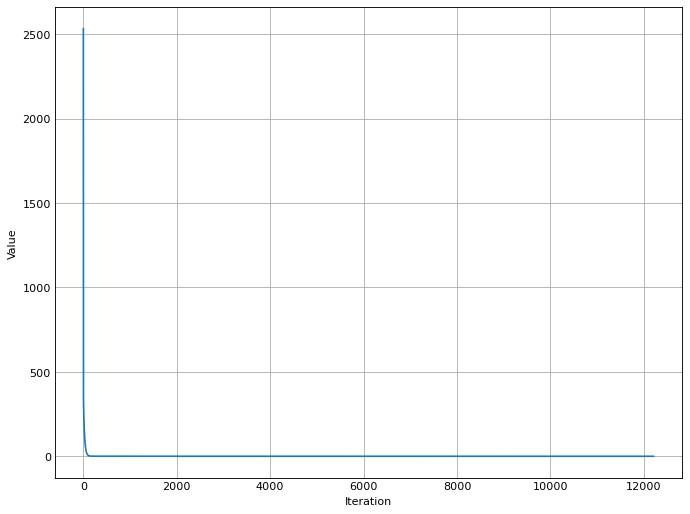

Soulution: 
[ 5.01112912e-01  7.12915838e-05 -5.23596861e-01]


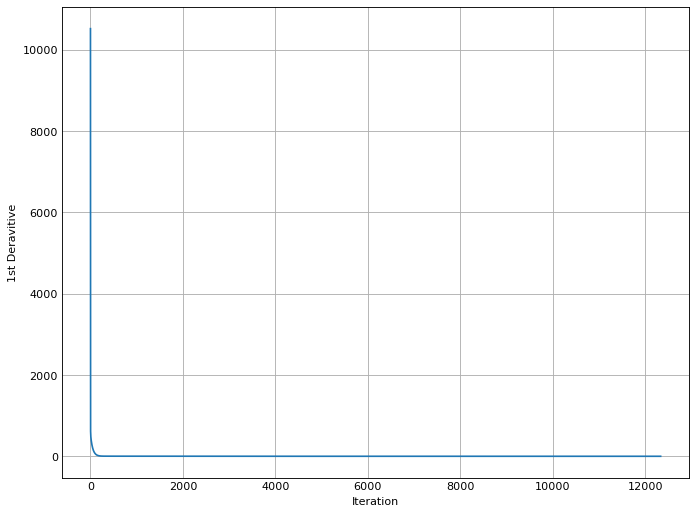

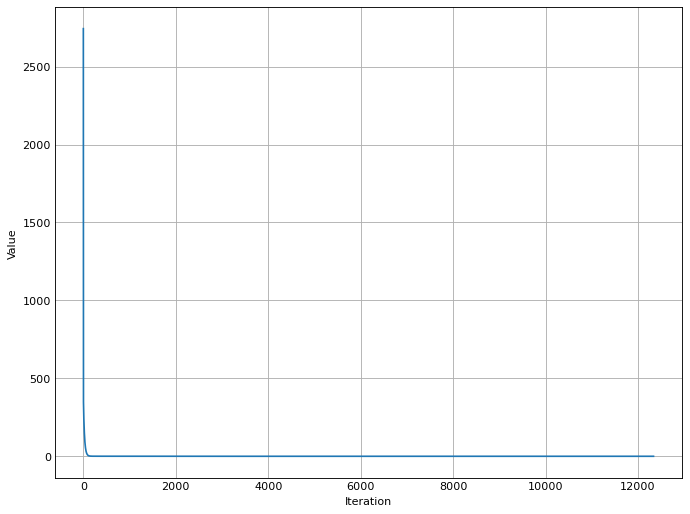

Soulution: 
[ 5.01113054e-01  7.13006814e-05 -5.23596861e-01]


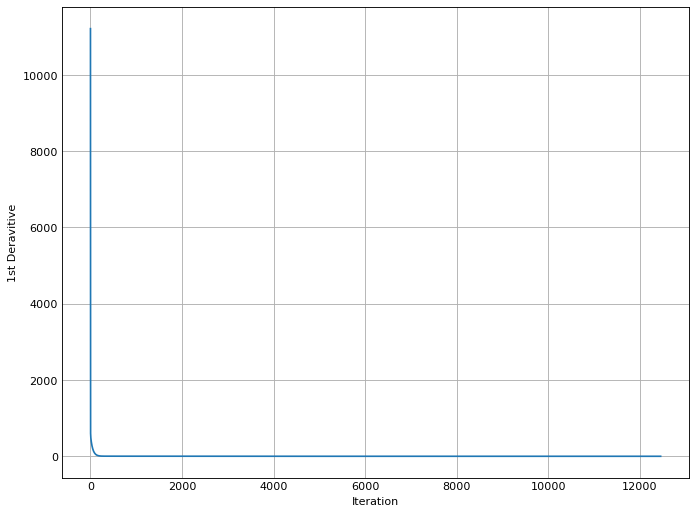

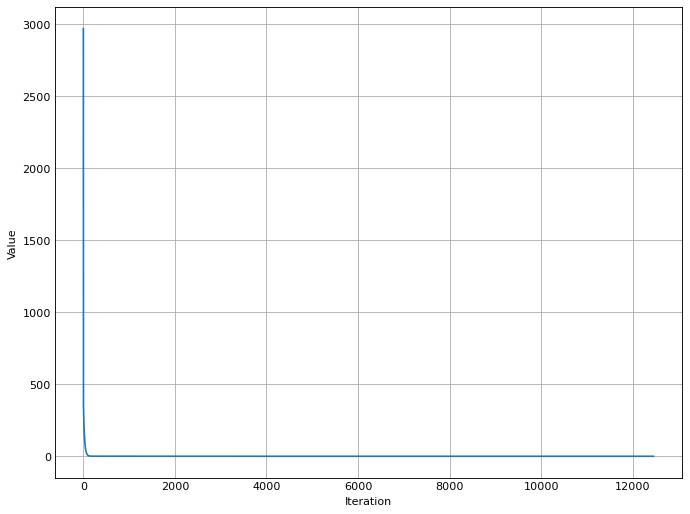

Soulution: 
[ 5.01112910e-01  7.12914384e-05 -5.23596861e-01]


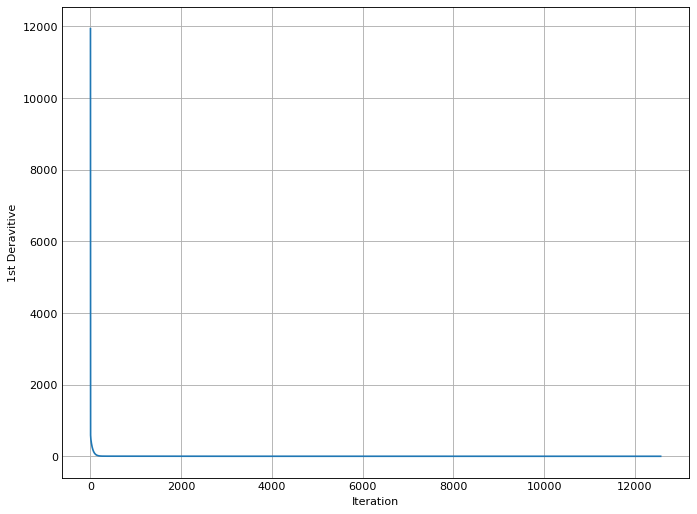

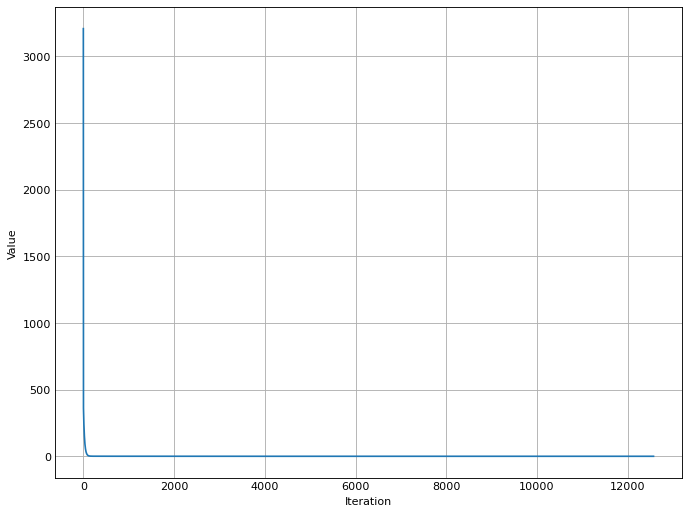

Soulution: 
[ 5.01112801e-01  7.12844689e-05 -5.23596861e-01]


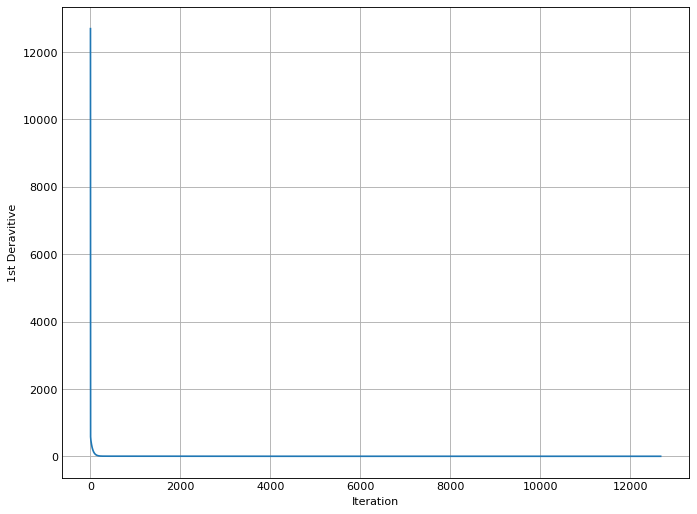

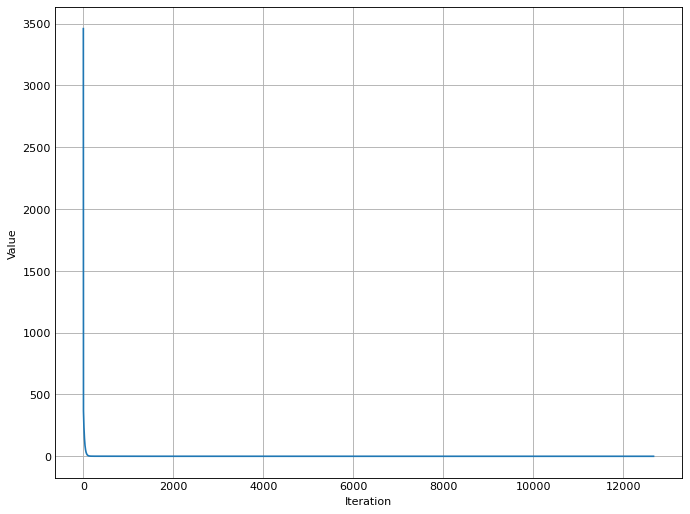

Soulution: 
[ 5.01112998e-01  7.12971044e-05 -5.23596861e-01]


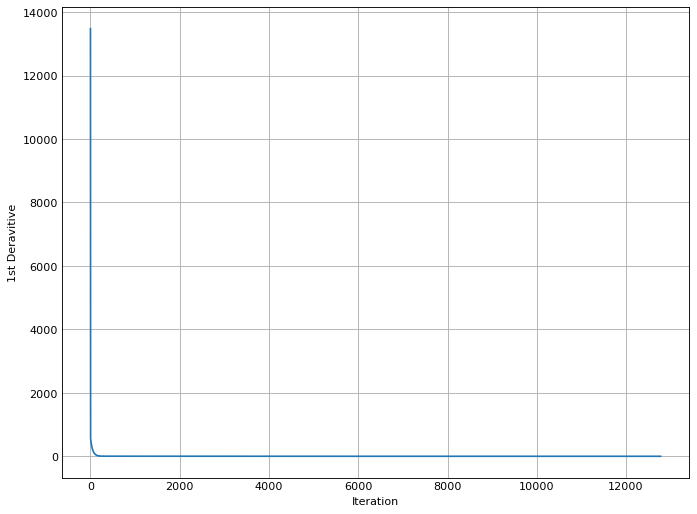

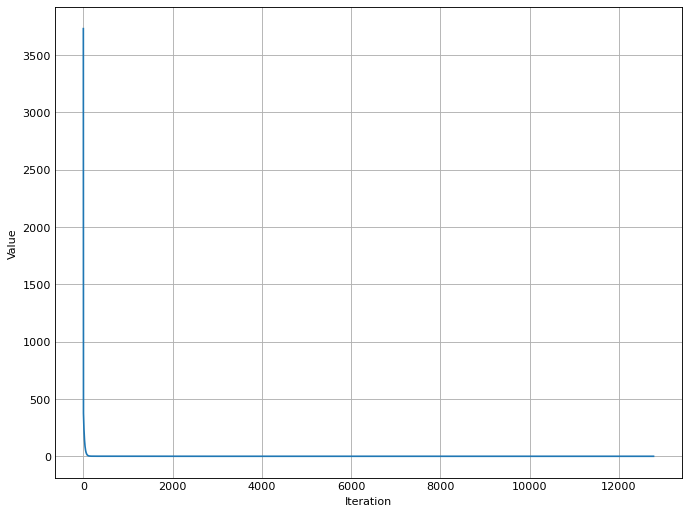

Soulution: 
[ 5.01113208e-01  7.13105643e-05 -5.23596860e-01]


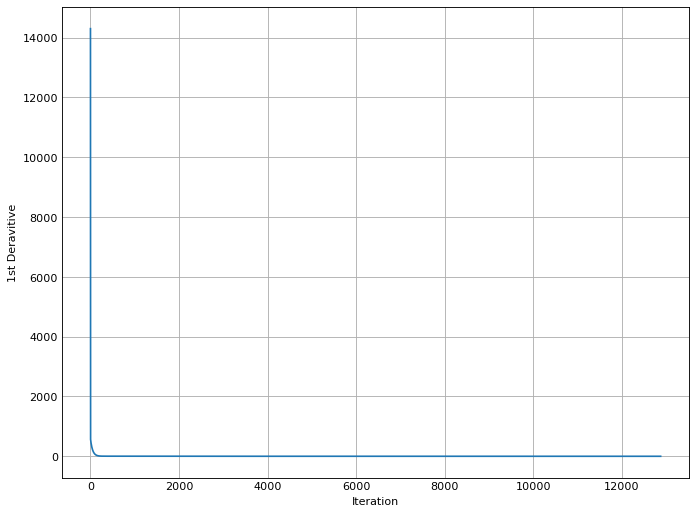

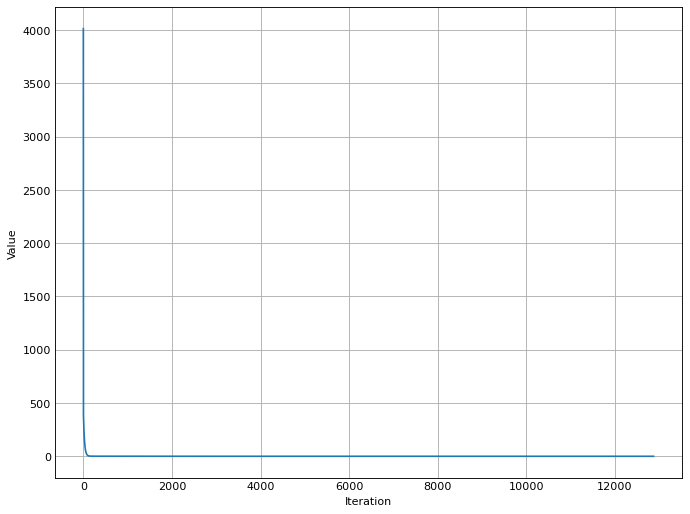

Soulution: 
[ 5.01113100e-01  7.13036347e-05 -5.23596860e-01]


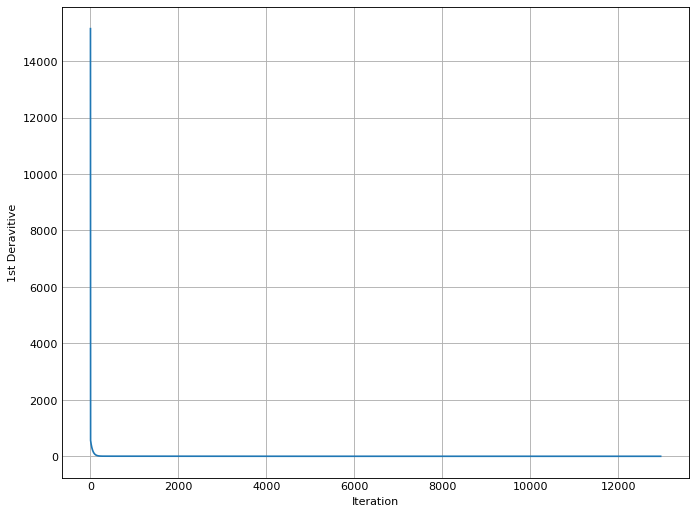

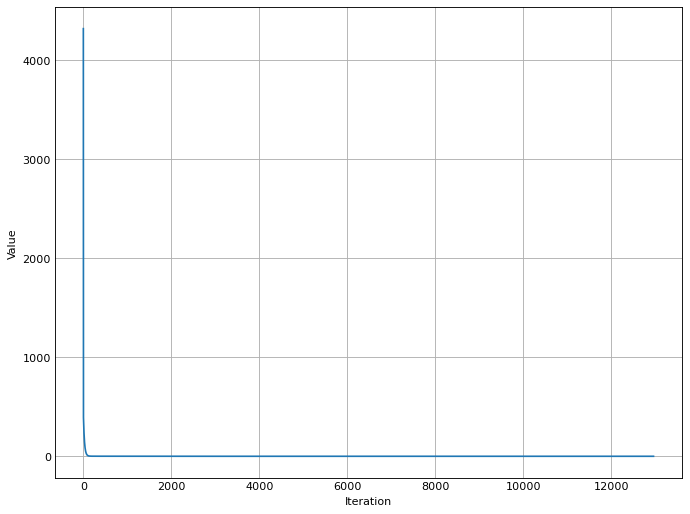

Soulution: 
[ 5.01112829e-01  7.12862369e-05 -5.23596861e-01]


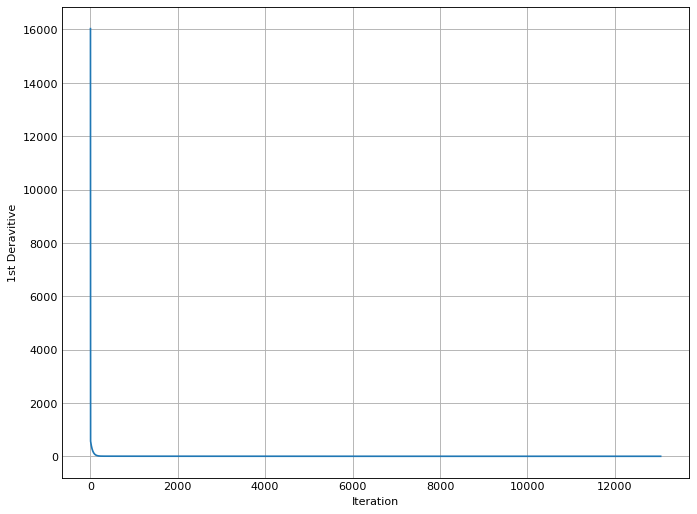

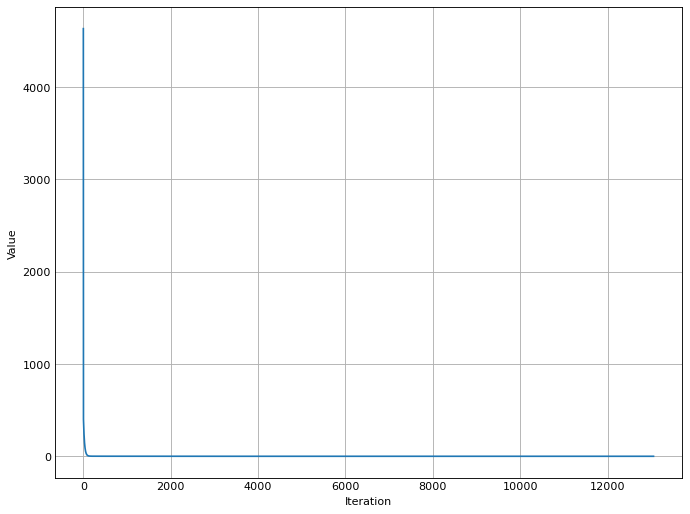

In [28]:
for i in np.arange(-1,1,0.02):
    sol=np.append(sol,[optimize((i,i,i),0.01)], axis=0)

In [29]:
print(sol)

[[ 4.99998887e-01 -7.12299503e-08 -5.23598778e-01]
 [ 4.97034658e-01 -1.99536487e-01 -5.28811752e-01]
 [ 4.97034624e-01 -1.99536485e-01 -5.28811752e-01]
 [ 4.97034316e-01 -1.99536466e-01 -5.28811748e-01]
 [ 4.97034254e-01 -1.99536462e-01 -5.28811747e-01]
 [ 4.97034442e-01 -1.99536474e-01 -5.28811749e-01]
 [ 4.97034362e-01 -1.99536469e-01 -5.28811748e-01]
 [ 4.97034540e-01 -1.99536480e-01 -5.28811750e-01]
 [ 4.97034458e-01 -1.99536475e-01 -5.28811749e-01]
 [ 4.97034644e-01 -1.99536487e-01 -5.28811752e-01]
 [ 4.97034583e-01 -1.99536483e-01 -5.28811751e-01]
 [ 4.97034282e-01 -1.99536464e-01 -5.28811747e-01]
 [ 4.97034269e-01 -1.99536463e-01 -5.28811747e-01]
 [ 4.97034550e-01 -1.99536481e-01 -5.28811751e-01]
 [ 4.97034614e-01 -1.99536485e-01 -5.28811751e-01]
 [ 4.97034471e-01 -1.99536476e-01 -5.28811750e-01]
 [ 4.97034650e-01 -1.99536487e-01 -5.28811752e-01]
 [ 4.97034641e-01 -1.99536486e-01 -5.28811752e-01]
 [ 4.97034455e-01 -1.99536475e-01 -5.28811749e-01]
 [ 4.97034623e-01 -1.99536485e-